In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.model_selection import train_test_split
data = pd.read_csv("virus_data.csv")
# part of Q1
print("the data dim: ", data.shape)

the data dim:  (3000, 29)


In [ ]:
# part of Q2
num_of_siblings = data['num_of_siblings'].value_counts()
print("num of siblings value counts: ", num_of_siblings)

num of siblings value counts:  2.0    754
1.0    707
3.0    554
0.0    400
4.0    272
5.0    120
6.0     29
7.0      7
8.0      2
9.0      1
Name: num_of_siblings, dtype: int64


In [ ]:
# for our use
col = data['job'].value_counts()
print(col)

Television camera operator      5
Loss adjuster, chartered        5
Patent examiner                 5
Tax inspector                   5
IT technical support officer    4
                               ..
Legal secretary                 1
Firefighter                     1
Call centre manager             1
Housing manager/officer         1
Embryologist, clinical          1
Name: job, Length: 431, dtype: int64


In [ ]:
# !!! need to do this!!! and change all of the changes only to the training set
data, test = train_test_split(data, test_size=0.2, random_state=12)

Create OHE vector from blood_type feature

In [ ]:
# part of Q6, Q8: transform blood_type into a OHE vector
data = pd.concat([data, pd.get_dummies(data['blood_type'], prefix="blood_type")], axis=1)

Create OHE vedtor of the symptoms feature, note that we don't loose the information for the samples with more than one symptom since we create a different coulmn for every possible symptom.

In [ ]:
# part of Q7: create one hot vector of the symptoms (cough,fever,headache,low_appetite, shortness_of_breath)
cough, fever, headache, low_appetite, shortness_of_breath,nan = [0] * data.shape[0], [0] * data.shape[0], [0] * data.shape[
    0], [0] * data.shape[0], [0] * data.shape[0],[0] * data.shape[0]
for i, row in enumerate(data['symptoms']):
    if row == np.NaN:  # in case that it is None
        continue
    if 'cough' in str(row):
        cough[i] = 1
    if 'fever' in str(row):
        fever[i] = 1
    if 'headache' in str(row):
        headache[i] = 1
    if 'low_appetite' in str(row):
        low_appetite[i] = 1
    if 'shortness_of_breath' in str(row):
        shortness_of_breath[i] = 1
    if 'nan' in str(row):
        nan[i] = 1

# add the one hot vector of symptoms to the data set
data['symptoms_cough'] = cough
data['symptoms_fever'] = fever
data['symptoms_headache'] = headache
data['symptoms_low_appetite'] = low_appetite
data['symptoms_shortness_of_breath'] = shortness_of_breath
data['symptoms_nan'] = nan

Extracting new feature out of the address feature. We beleive that there is a significance to sperate the samples by the states, and anlayze the data according to that. Firsty, we find out which states do we have, than we go over every sample and extract the matching state. We create the state feature as a OHE vector.

In [ ]:
# part of Q8: collect the city names to create the one hot vector of the city feature
states = {}
for i, row in enumerate(data['address']):
    if row == np.NaN:
        continue
    states[str(row)[-8:-6]] = 0

# part of Q8: convert city names to a list of city names
states_list = []
for s in states:
    states_list.append(s)
states_list.remove('')  # avoid bugs

# part of Q8: create the one hot vector of a city for every patient
city_mat = np.zeros((data.shape[0], len(states_list)), dtype=int)
for i, row in enumerate(data['address']):
    if row == np.NaN:
        continue
    city_name = str(row)[-8:-6]  # extract the name of the city
    if city_name != '':
        index = states_list.index(city_name)  # get the index of the city by its name
        city_mat[i, index] = 1
prefix_ADD = 'city_'
states_list_with_prefix = [prefix_ADD + x for x in states_list]
df1 = pd.DataFrame(data=city_mat, columns=states_list_with_prefix)  # transform the matrix to a dataframe
data = pd.concat([data, df1], axis=1)  # append the hot vec to to the data


Since corrent location is a string of two coordinates, we decided to split the data into two numerical coulmns - X and Y

In [ ]:
# part of Q8: transform current_location into vector of x coordinate and y coordinate
coordinate_mat = np.zeros((data.shape[0], 2), dtype=float)
for i, row in enumerate(data['current_location']):
    if row == np.NaN or row is np.nan:
        continue
    start_parn_idx = row.find("(")
    comma_idx = row.find(",")
    end_parn_idx = row.find(")")
    first_num = row[start_parn_idx + 2: comma_idx - 1]  # remove 'first_num'
    second_num = row[comma_idx + 3:end_parn_idx - 1]  # remove 'second_num'
    coordinate_mat[i, 0] = float(first_num)
    coordinate_mat[i, 1] = float(second_num)
df1 = pd.DataFrame(data=coordinate_mat, columns=['X', 'Y'])  # transform the matrix to a dataframe
data = pd.concat([data, df1], axis=1)  # append the hot vec to to the data

We thought that the information whether the patient lives in an aprtment or a private house can be related to the risk, spread, and covid (the traget variables). We assumes that patients with no "Apt." in the address feature lives in a private house.

In [ ]:
# part of Q8: create a new feature checking whether the patient lives in an apartment or private house as one hot vector
housing_is_apt = [0] * (data["address"].shape[0])
for i, row in enumerate(data['address']):
    if row == np.NaN or row is np.nan:
        continue
    if "Apt" in str(row):
        housing_is_apt[i] = 1
data['housing_is_apt'] = housing_is_apt

We sperated out feature to several groups: Traget features, unseful features, contuinous features and categorial features.

In [ ]:
# our data types
COL_NAME = data.columns
TARGET_NAME = ['covid', 'spread', 'risk']
dont_plot = ['address', 'current_location', 'covid', 'spread', 'risk', "pcr_date", 'patient_id','symptoms','job']
continuous = ['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
              'household_income', 'sugar_levels', 'age', 'weight','X','Y']
PCR = ['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']
categorial = ['num_of_siblings','sex', 'blood_type', 'happiness_score','sport_activity','conversation_per_day']

Here we decided to plot a histogram of every feature we found importent against the target features.

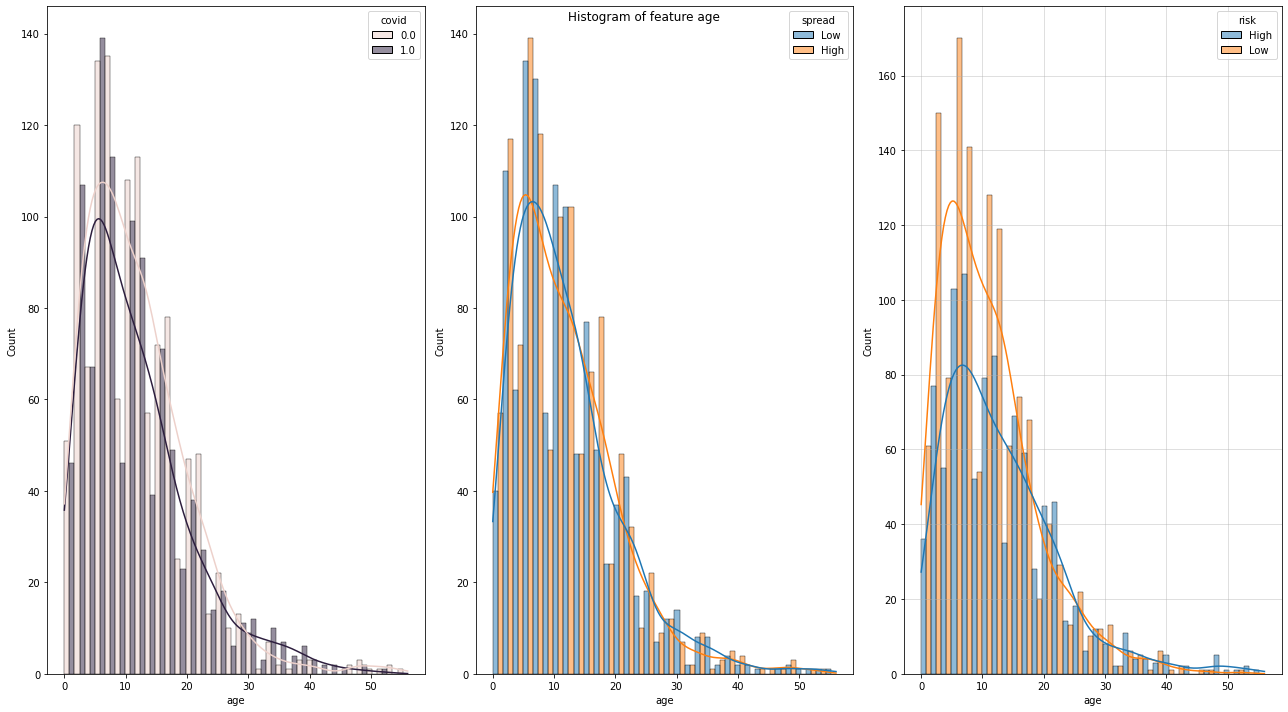

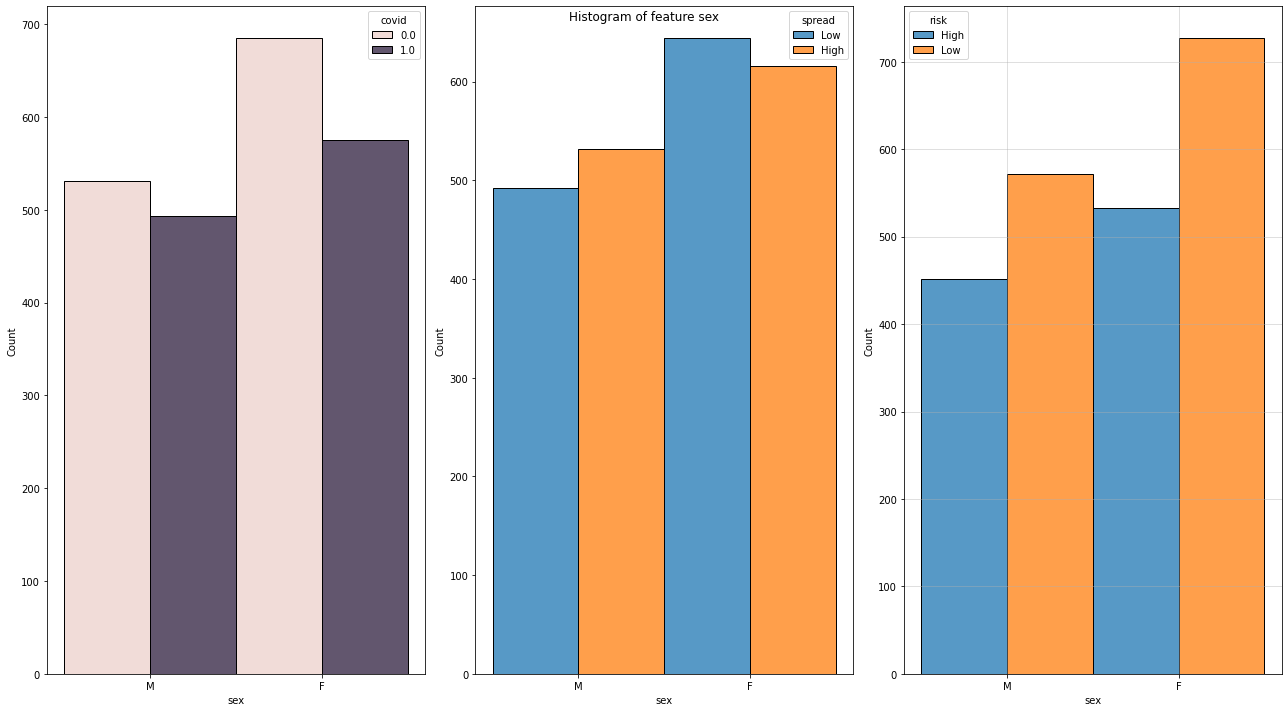

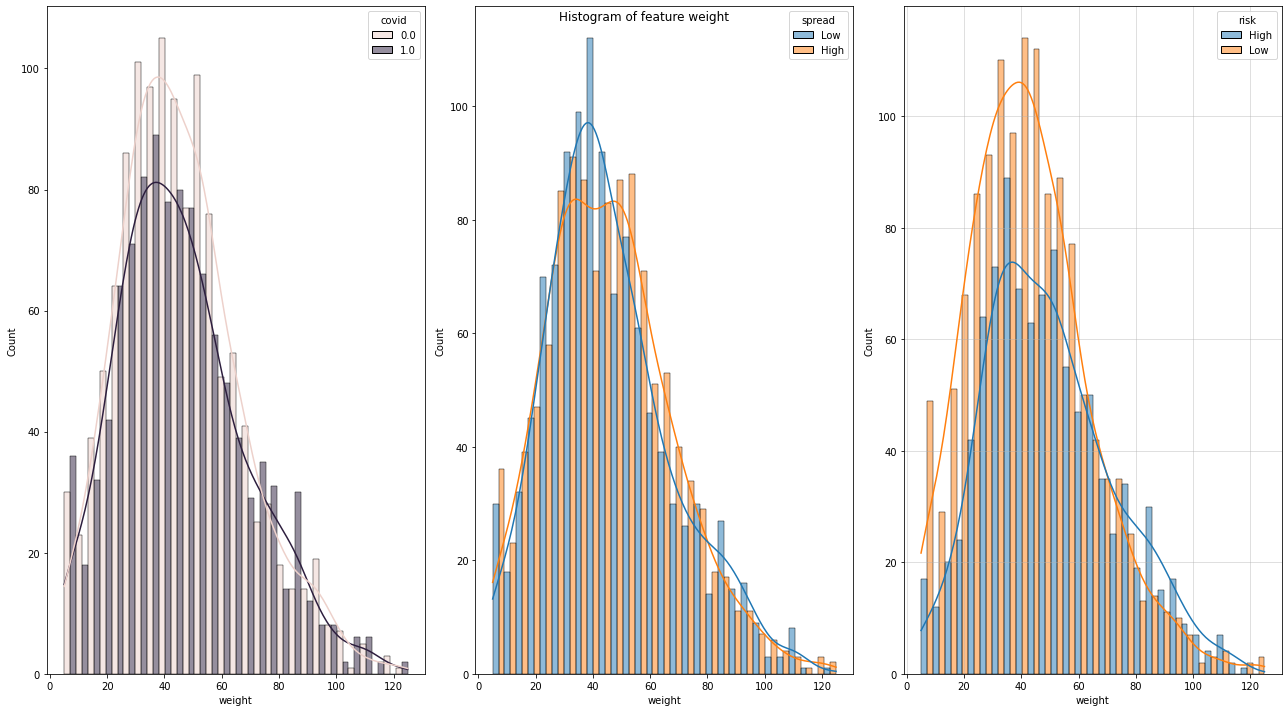

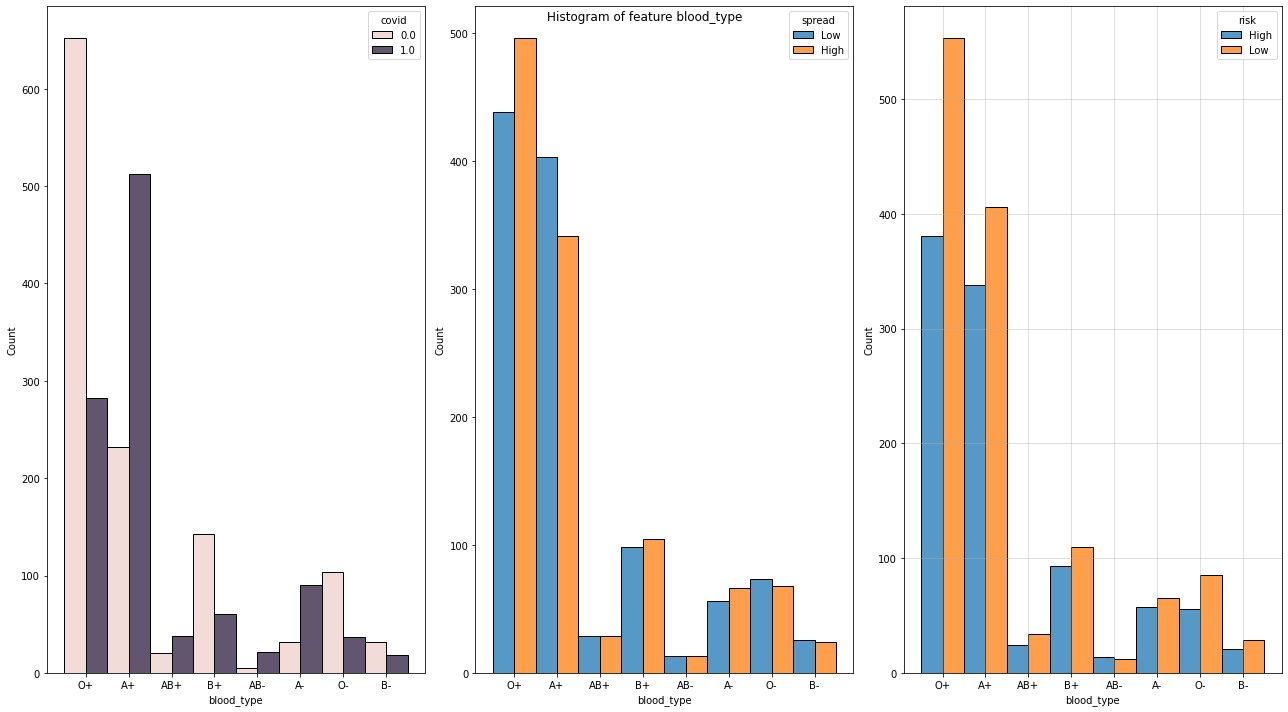

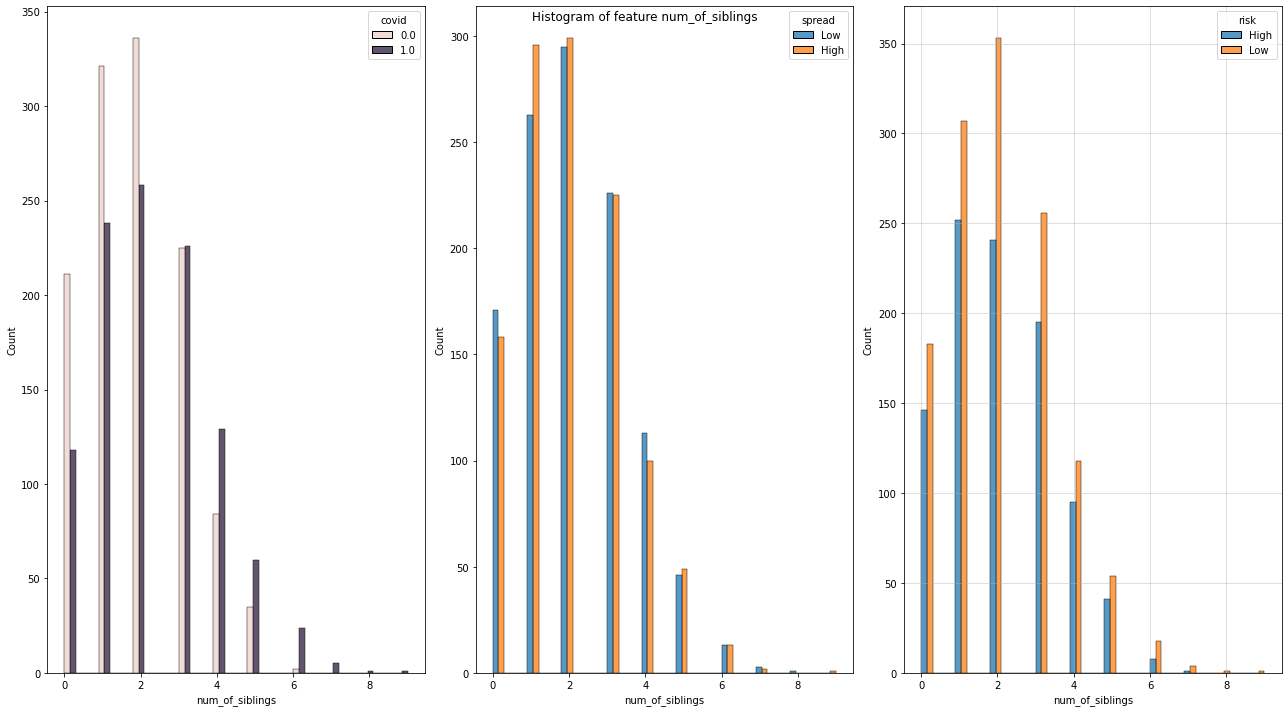

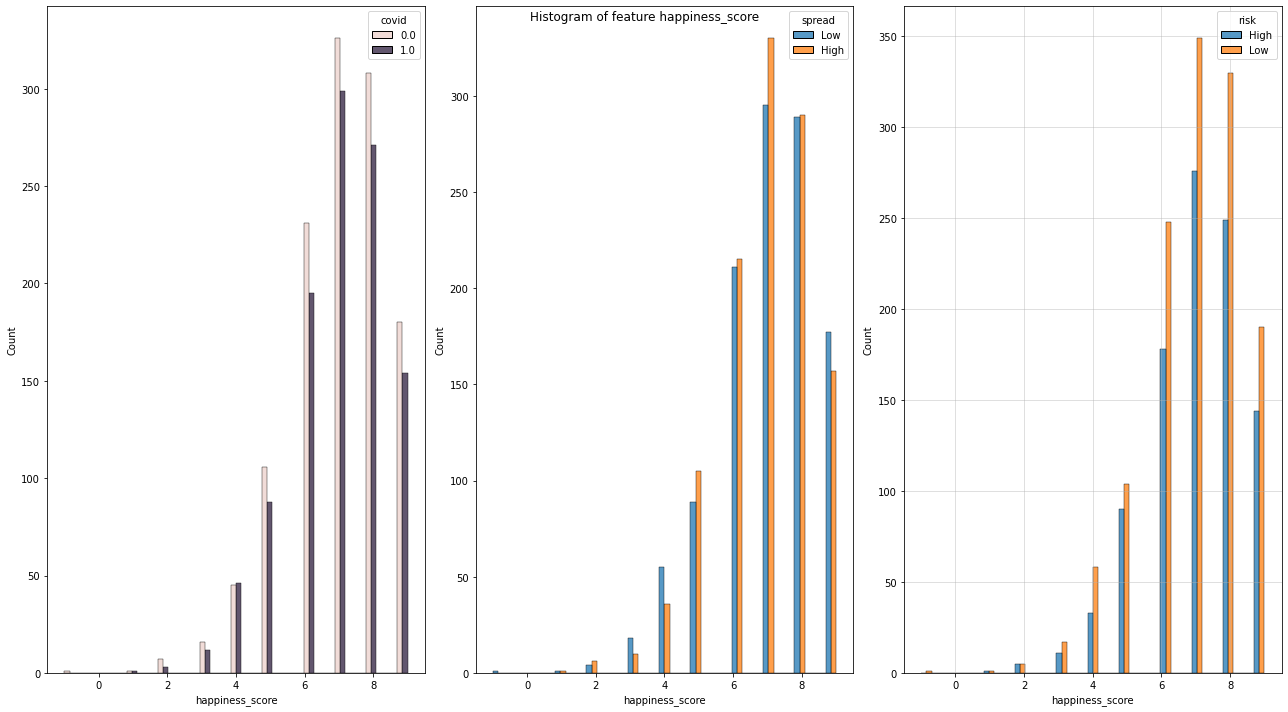

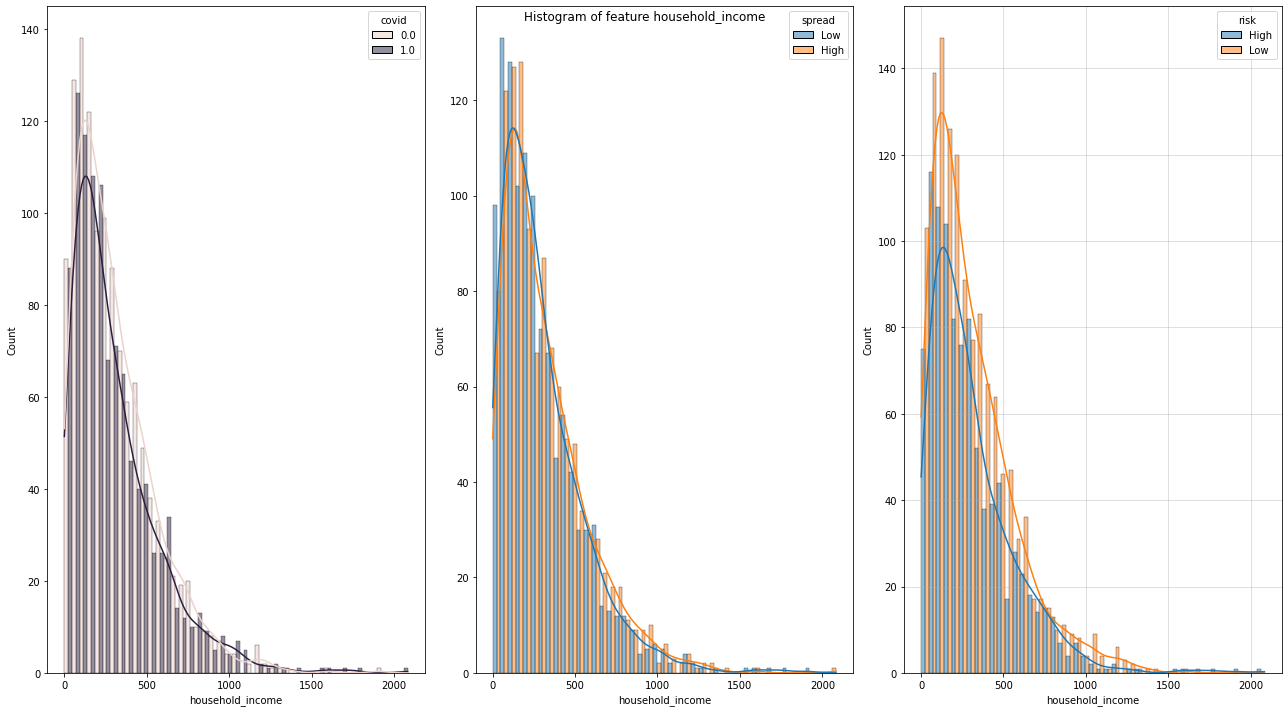

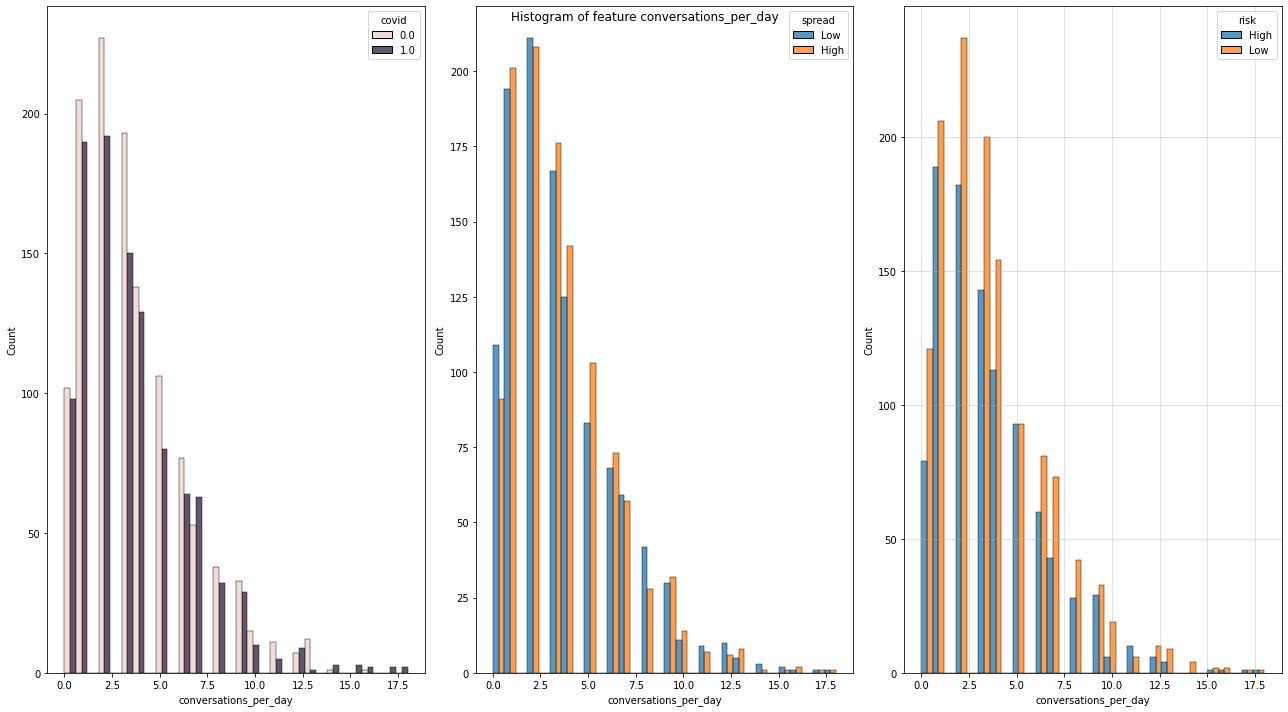

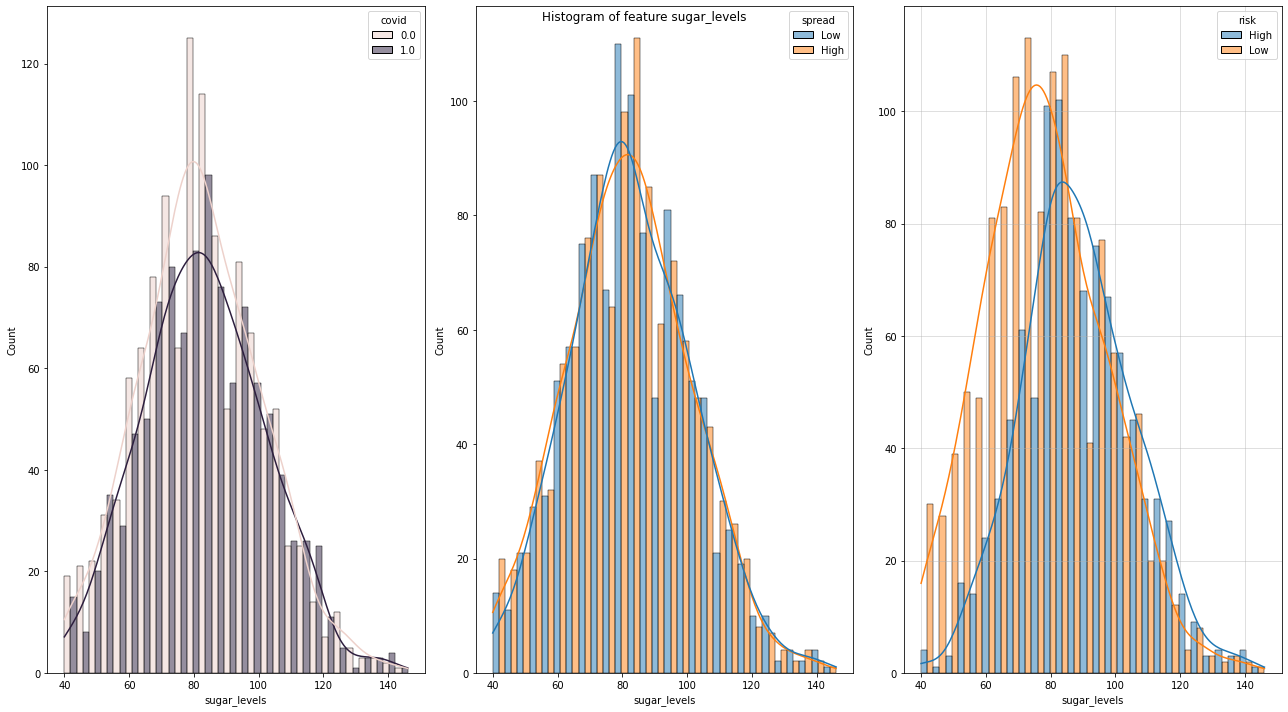

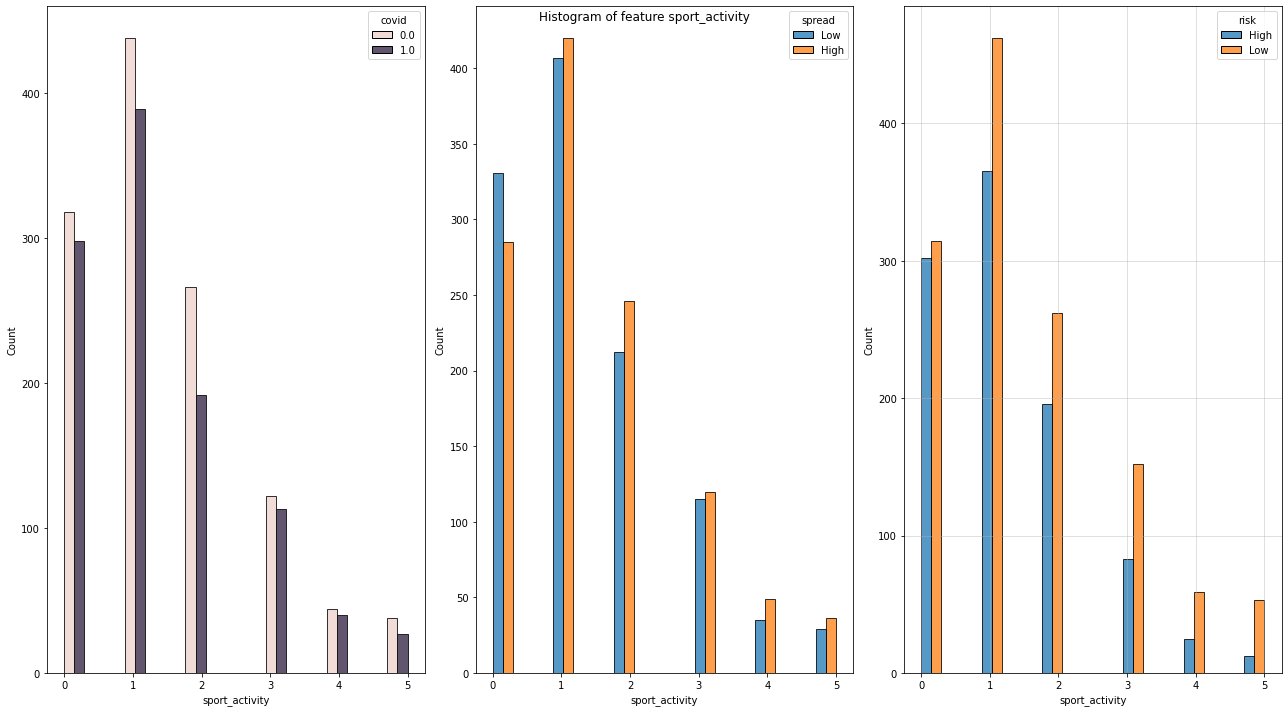

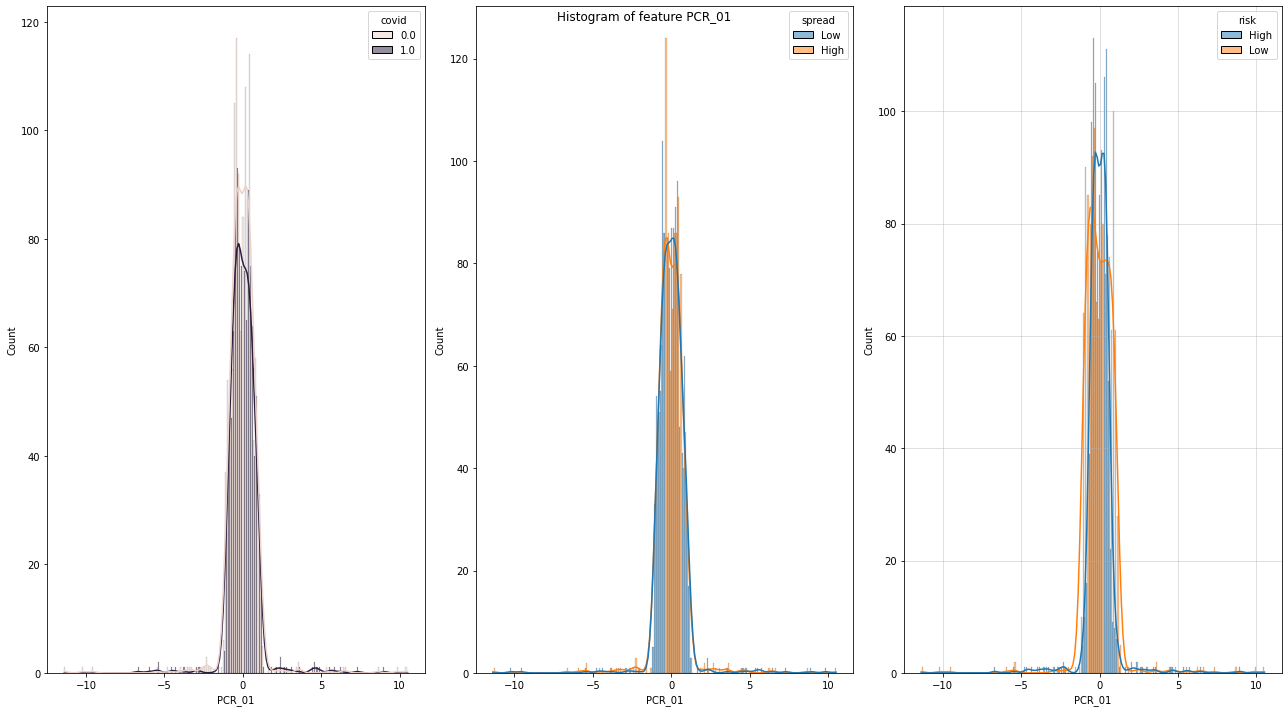

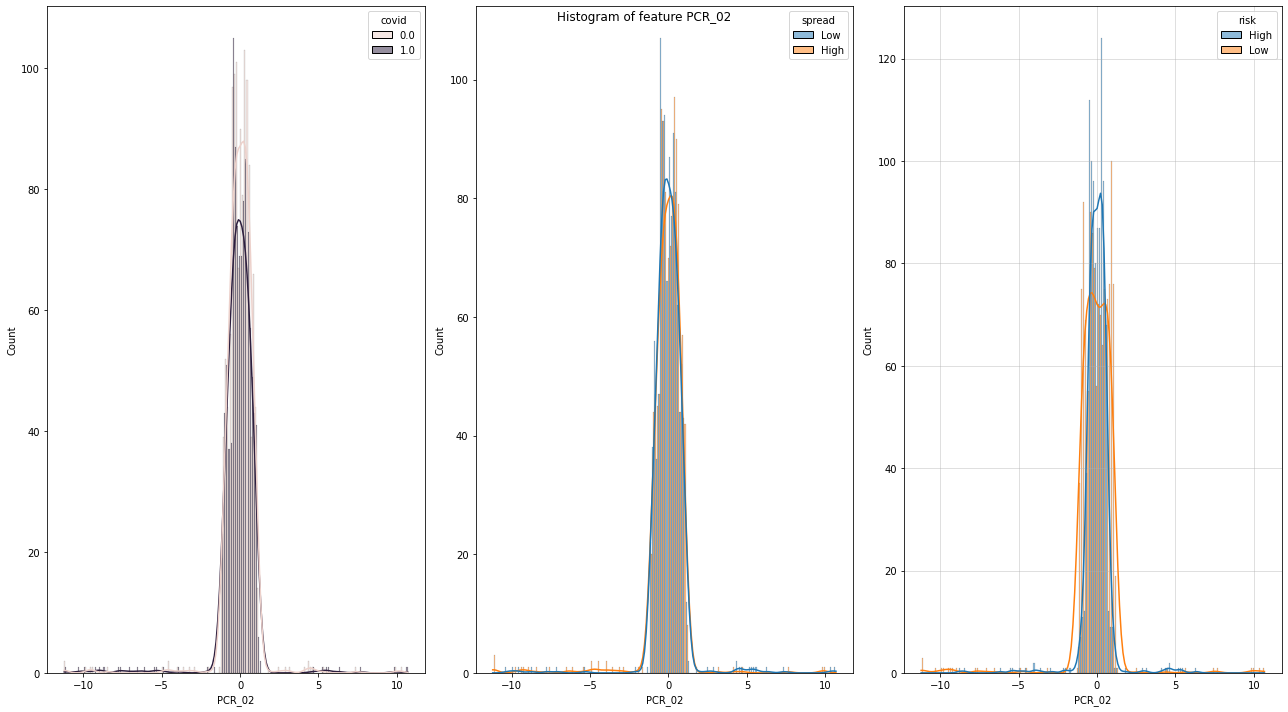

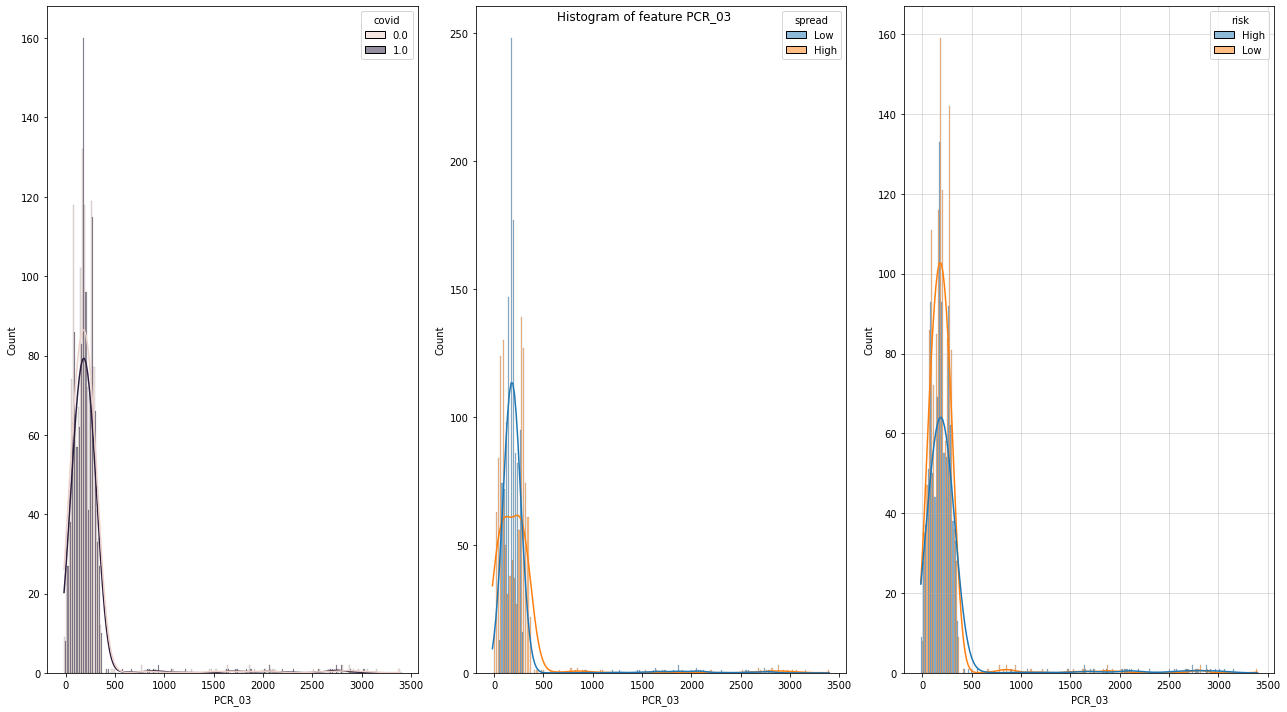

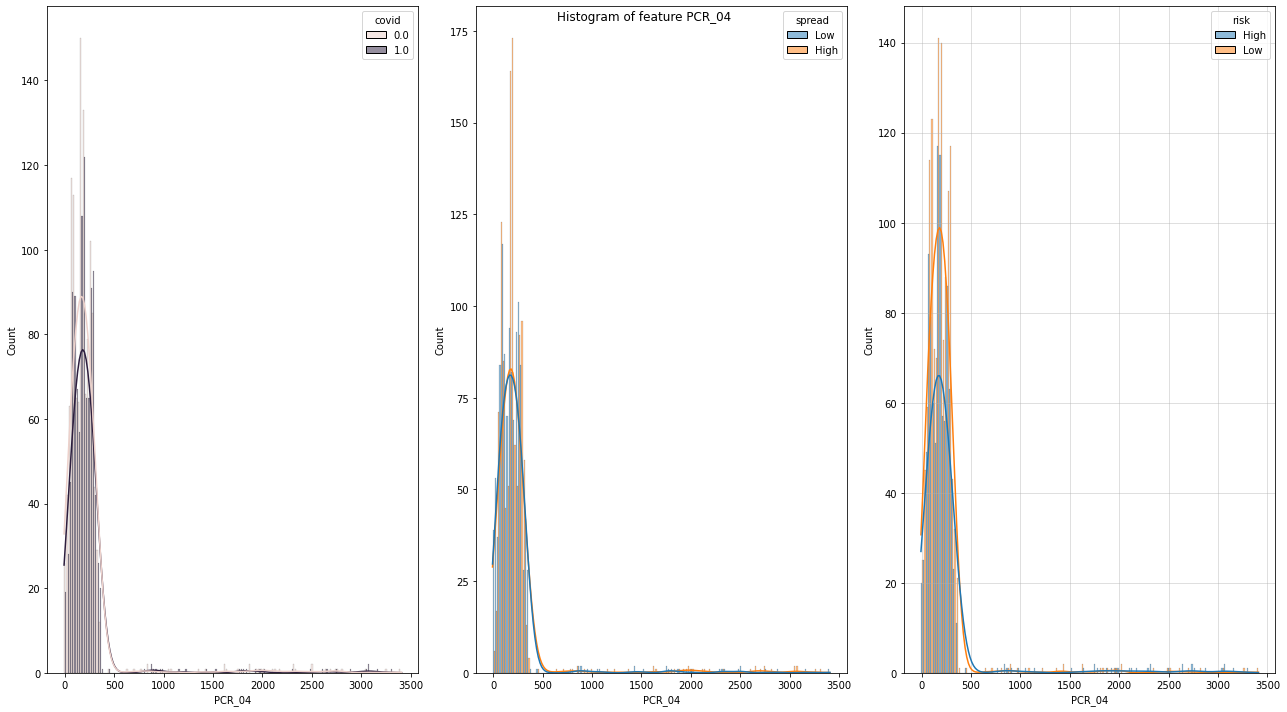

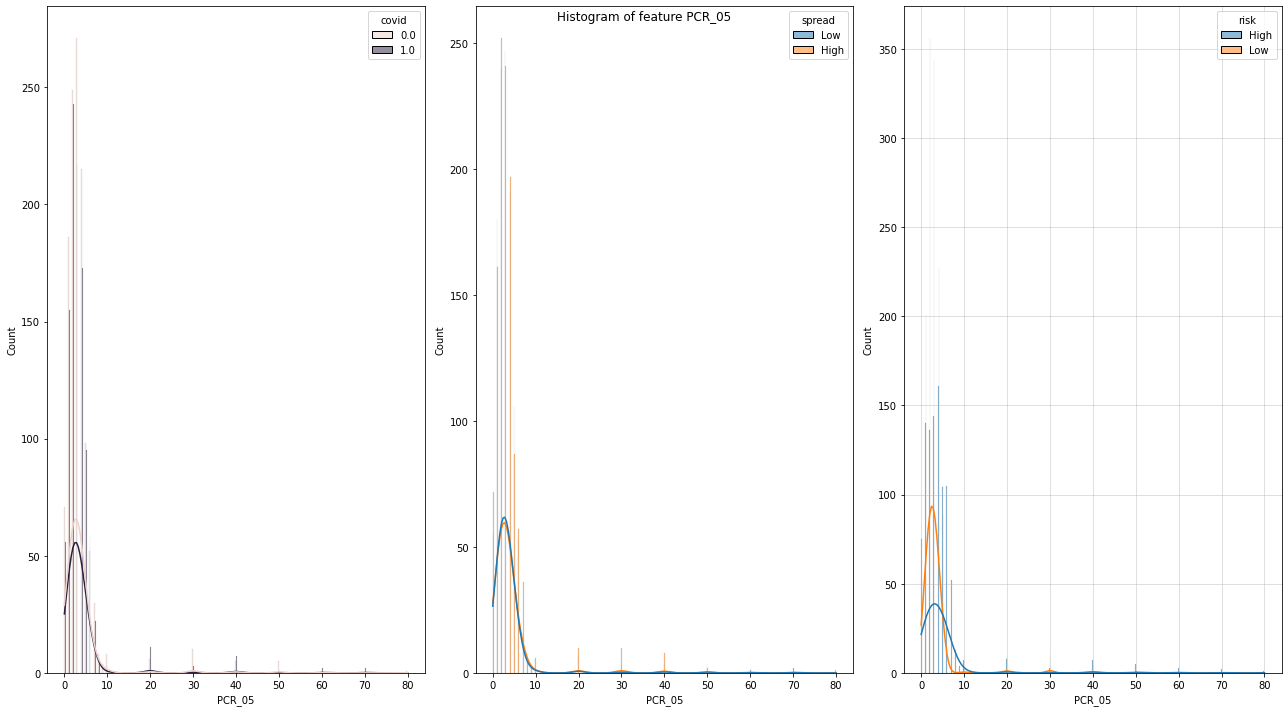

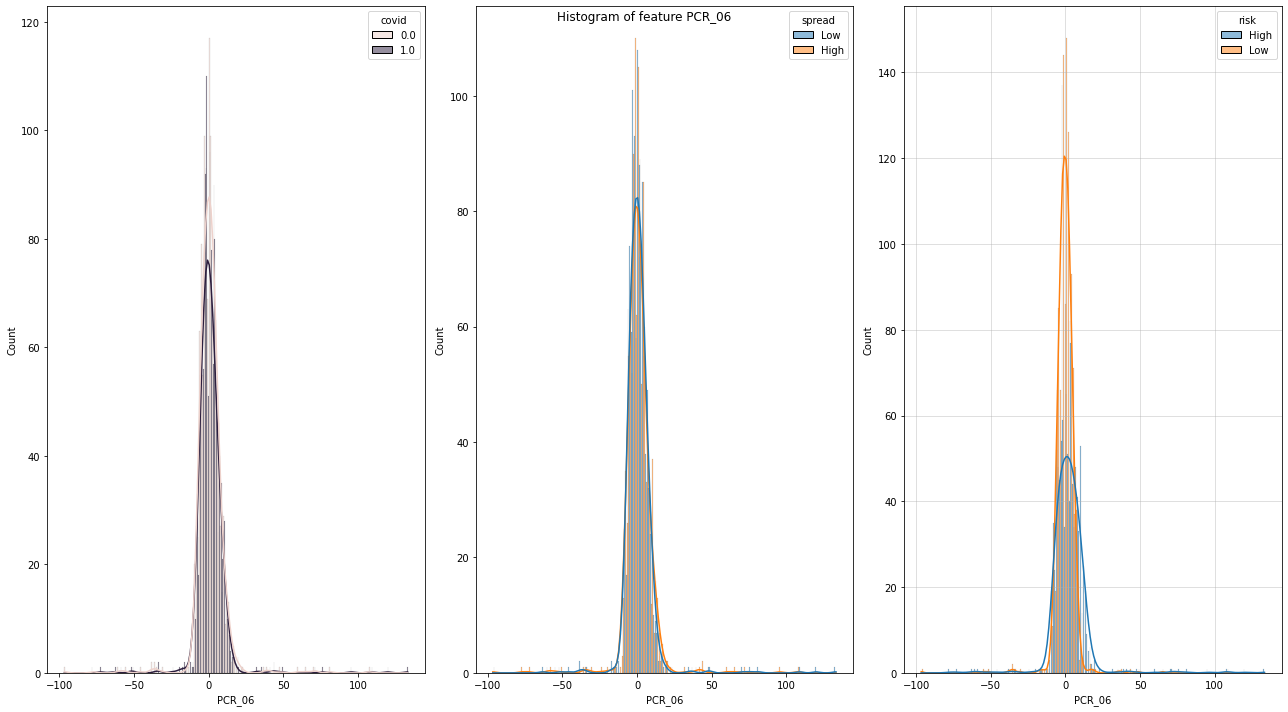

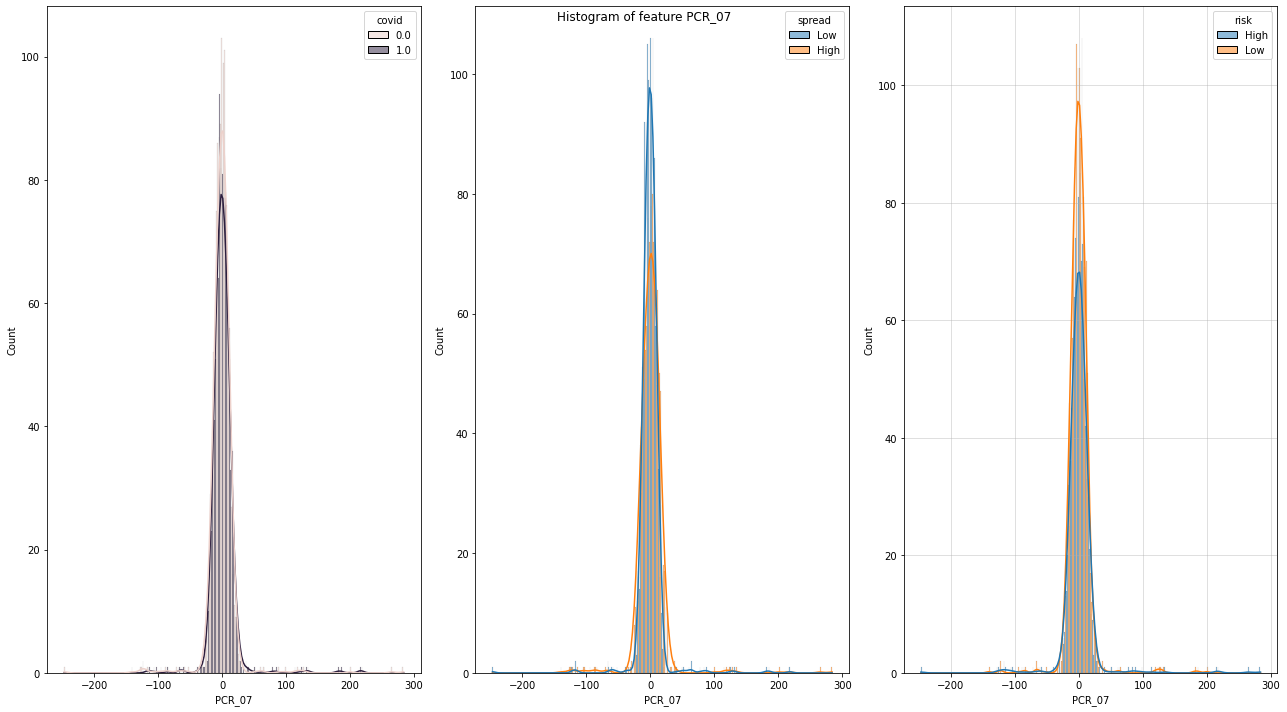

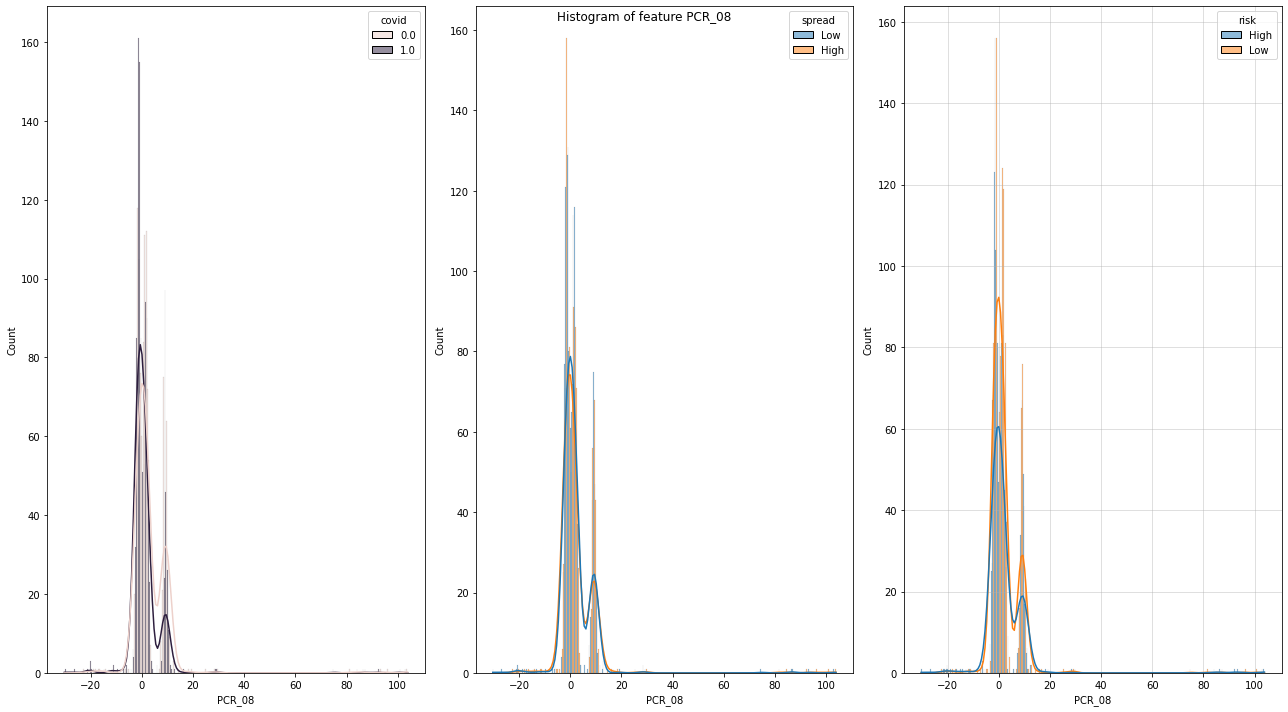

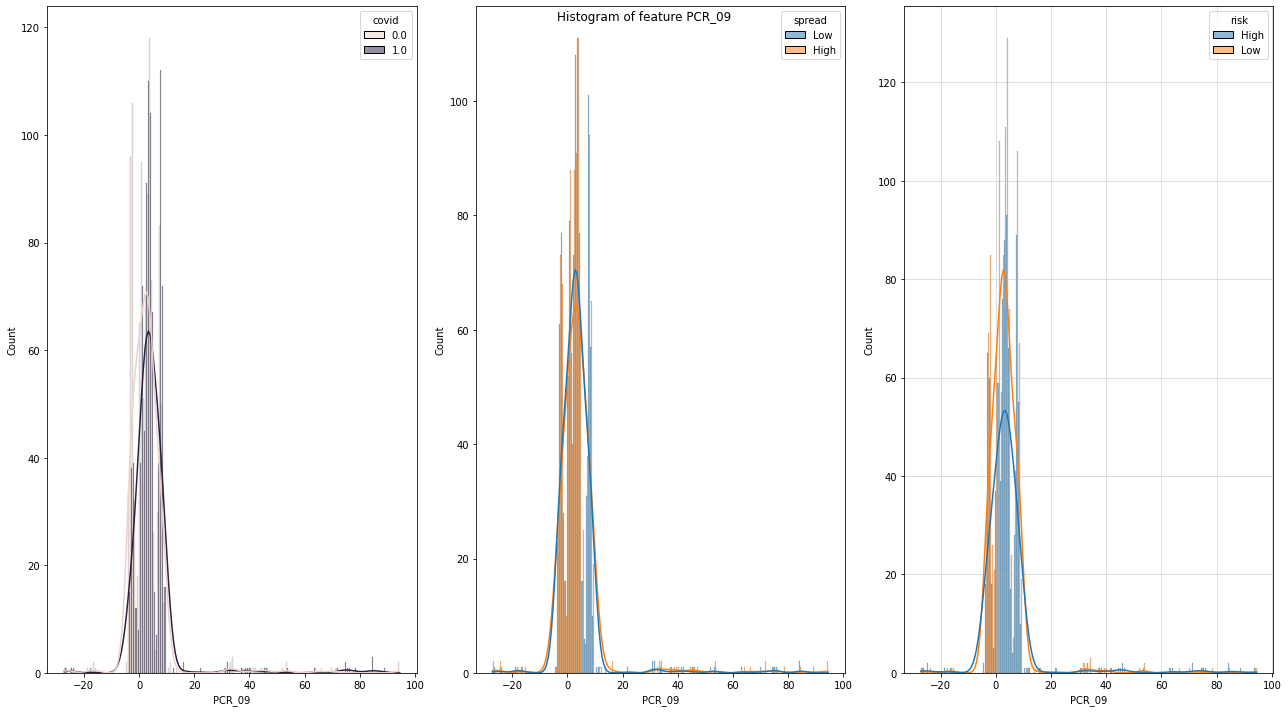

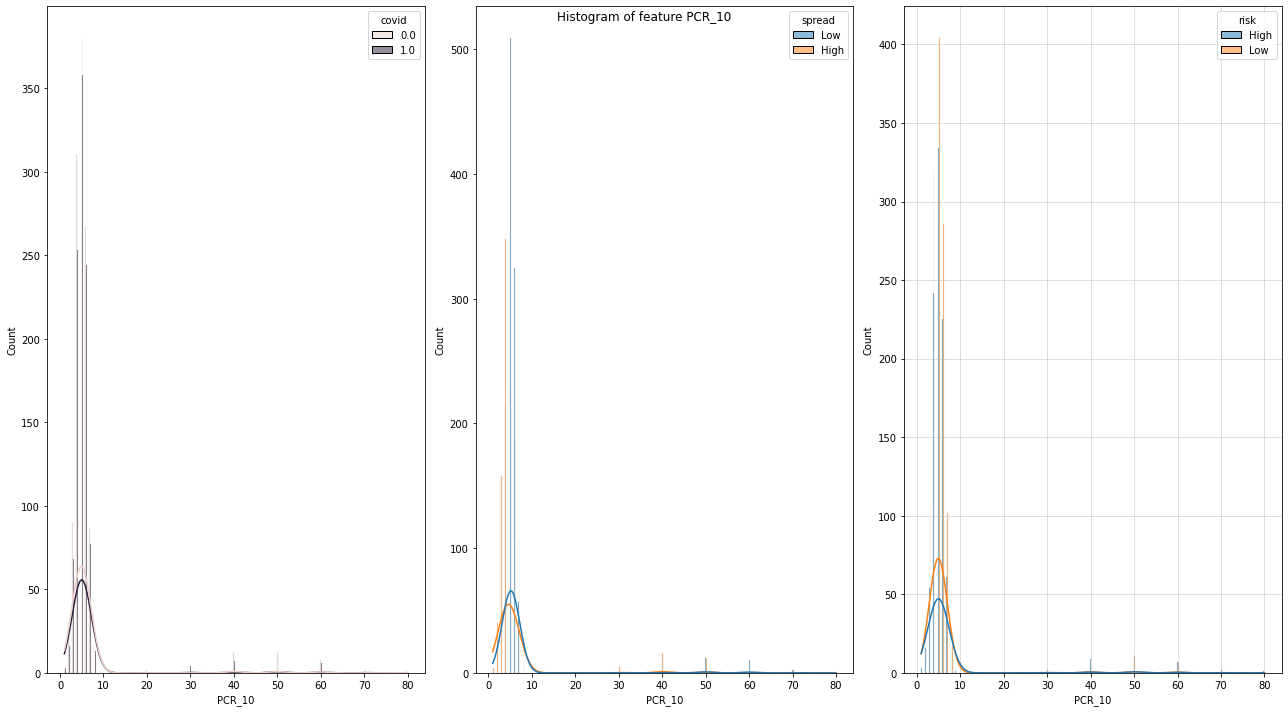

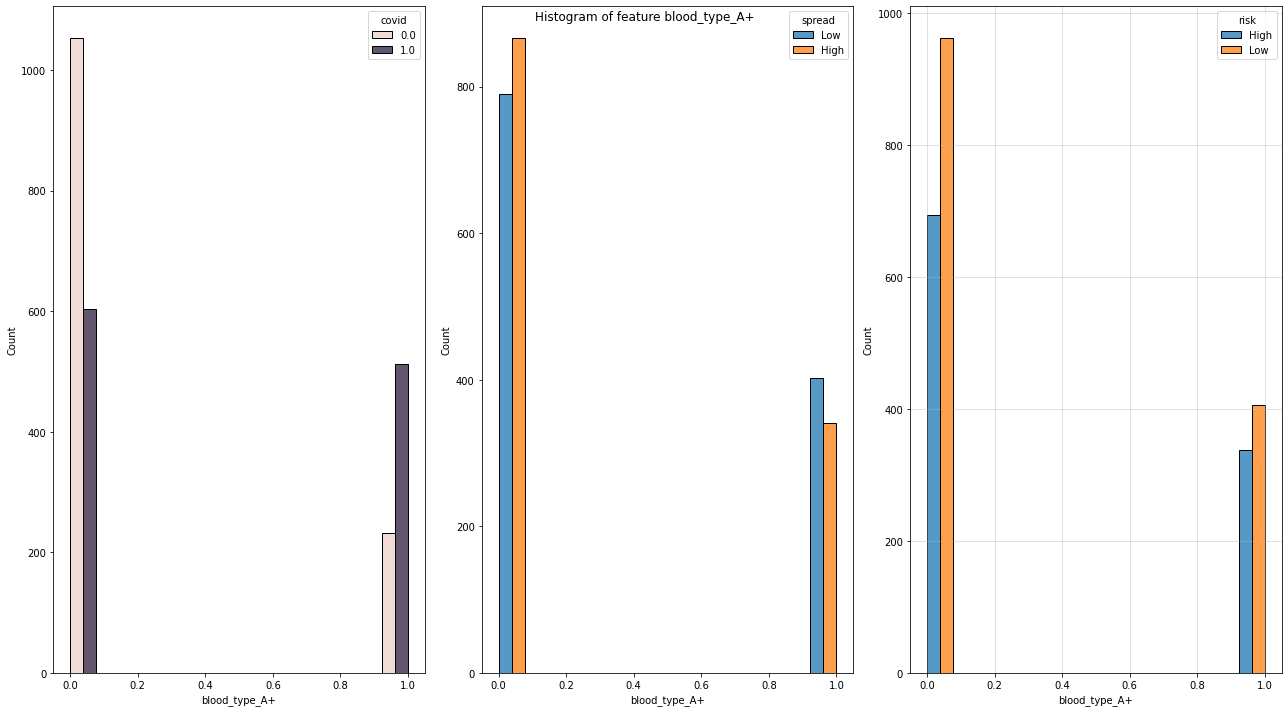

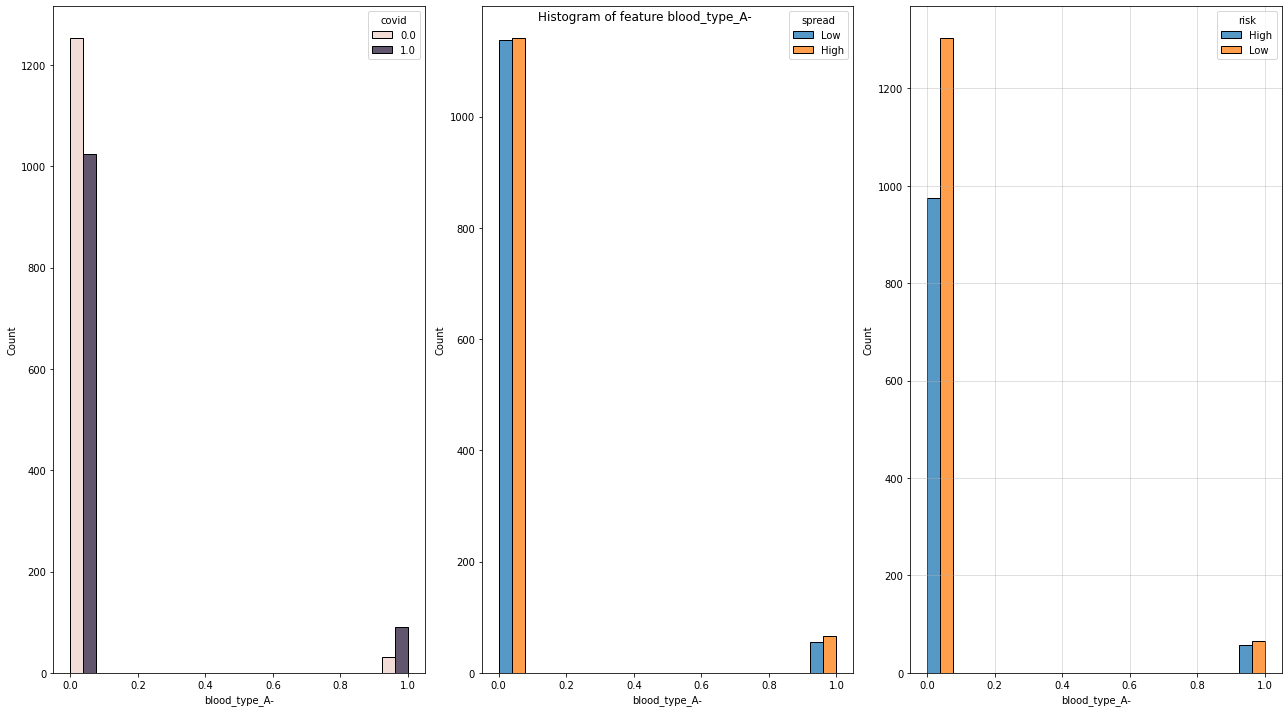

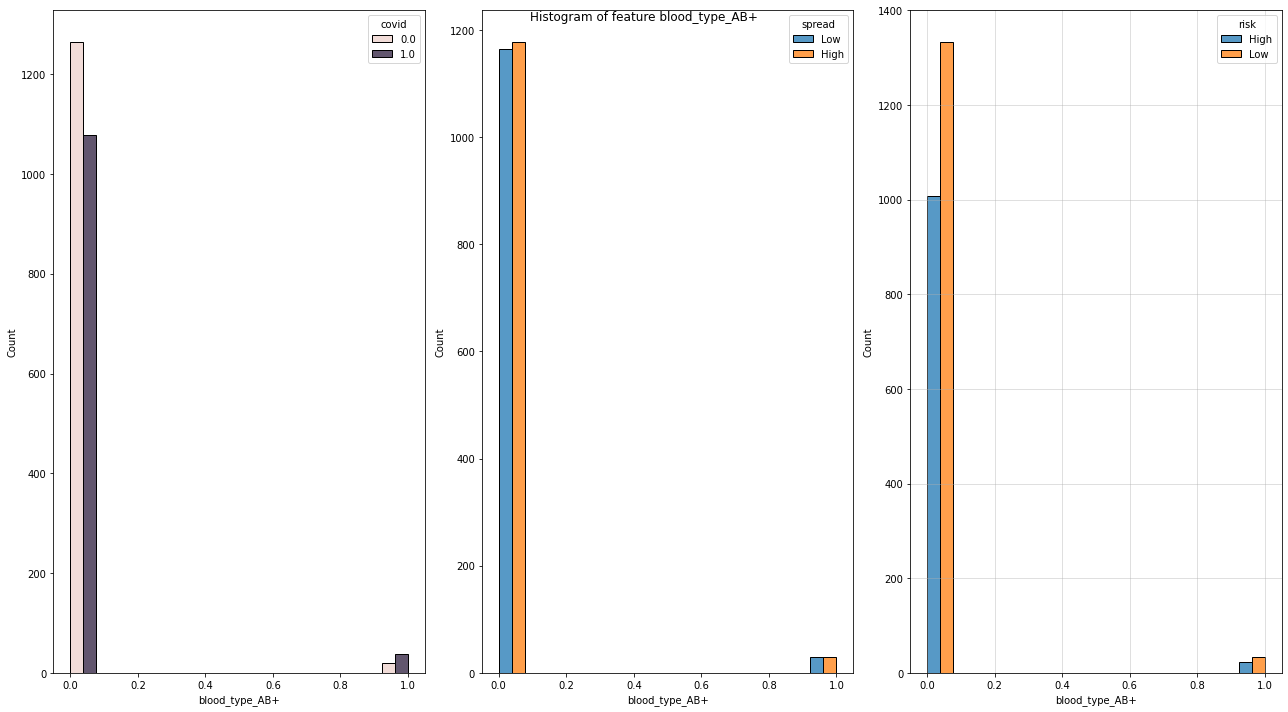

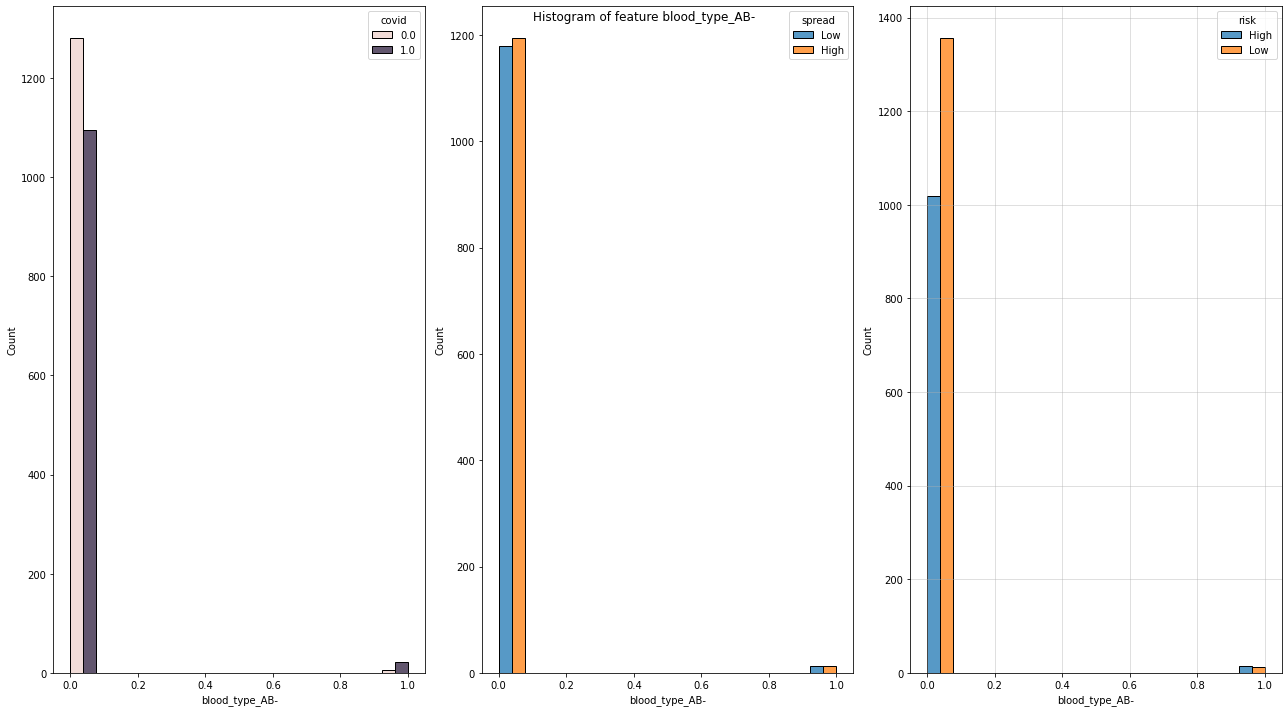

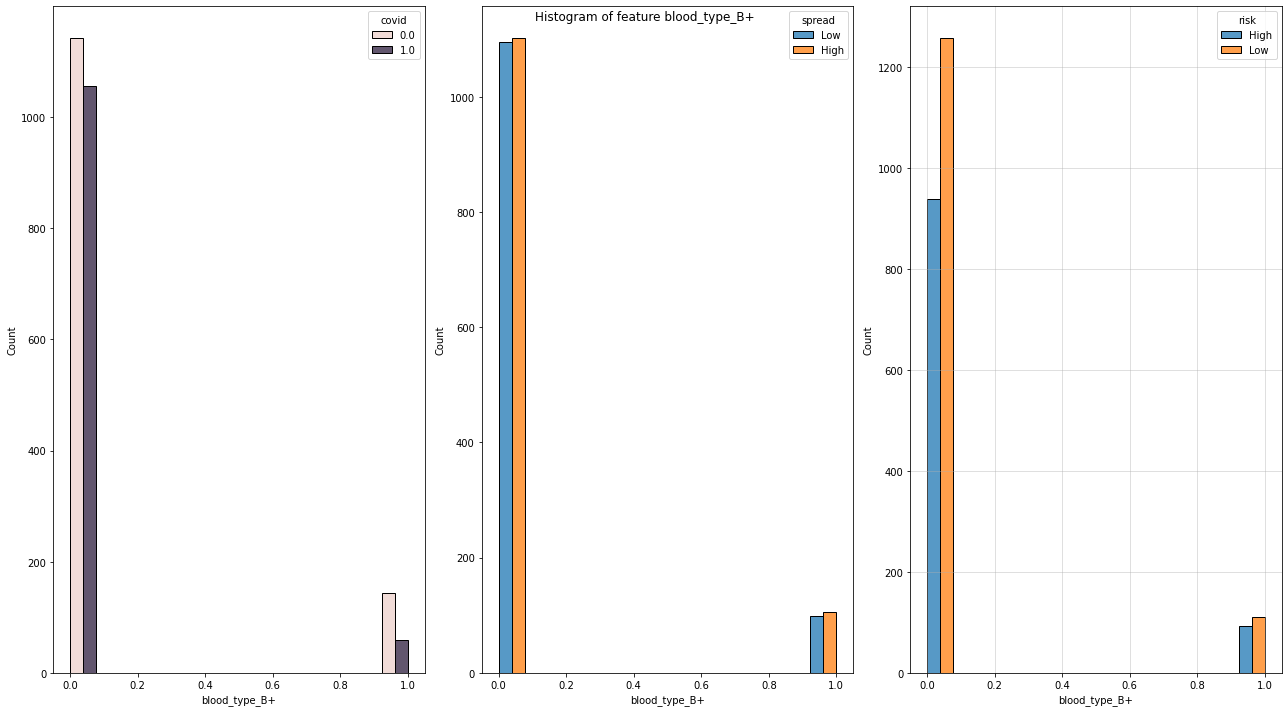

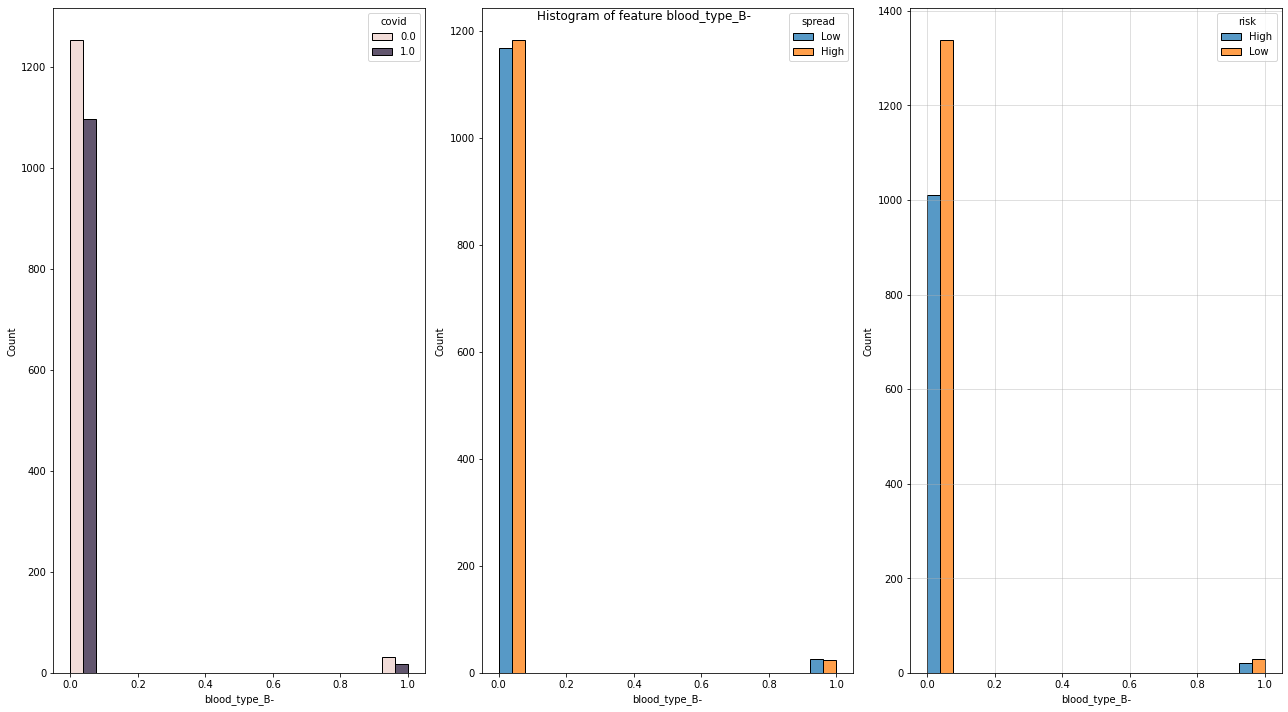

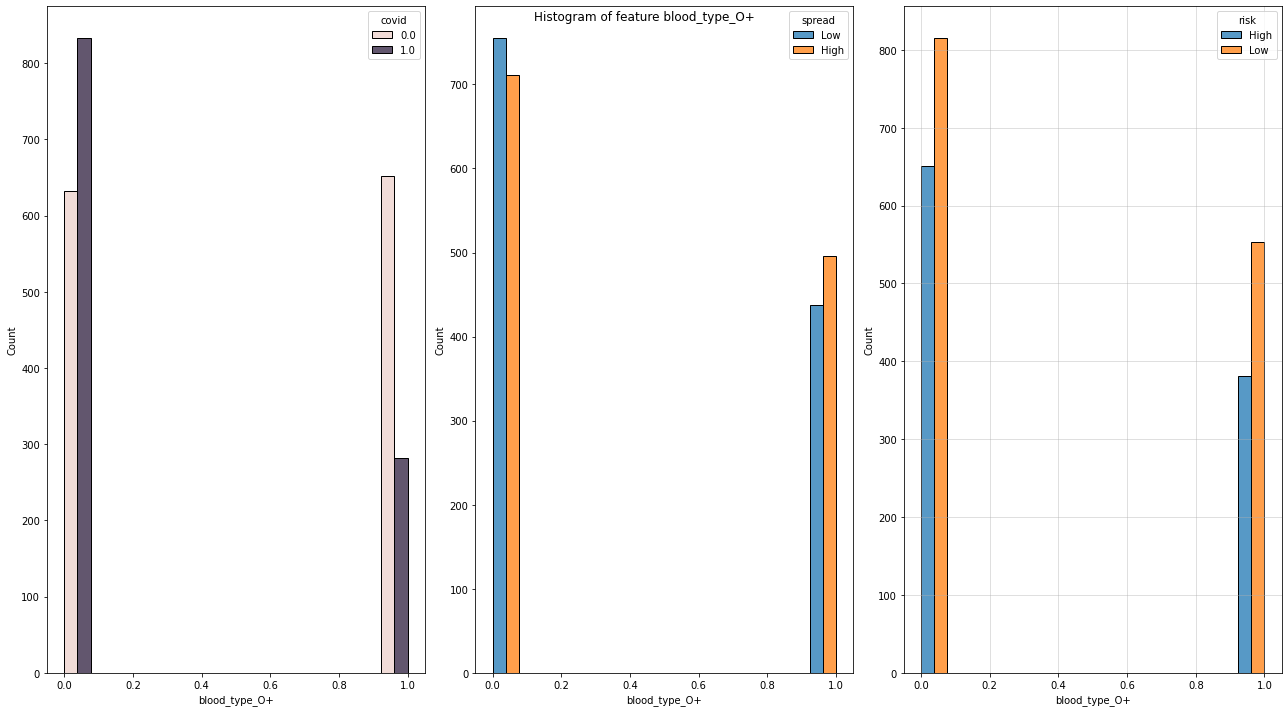

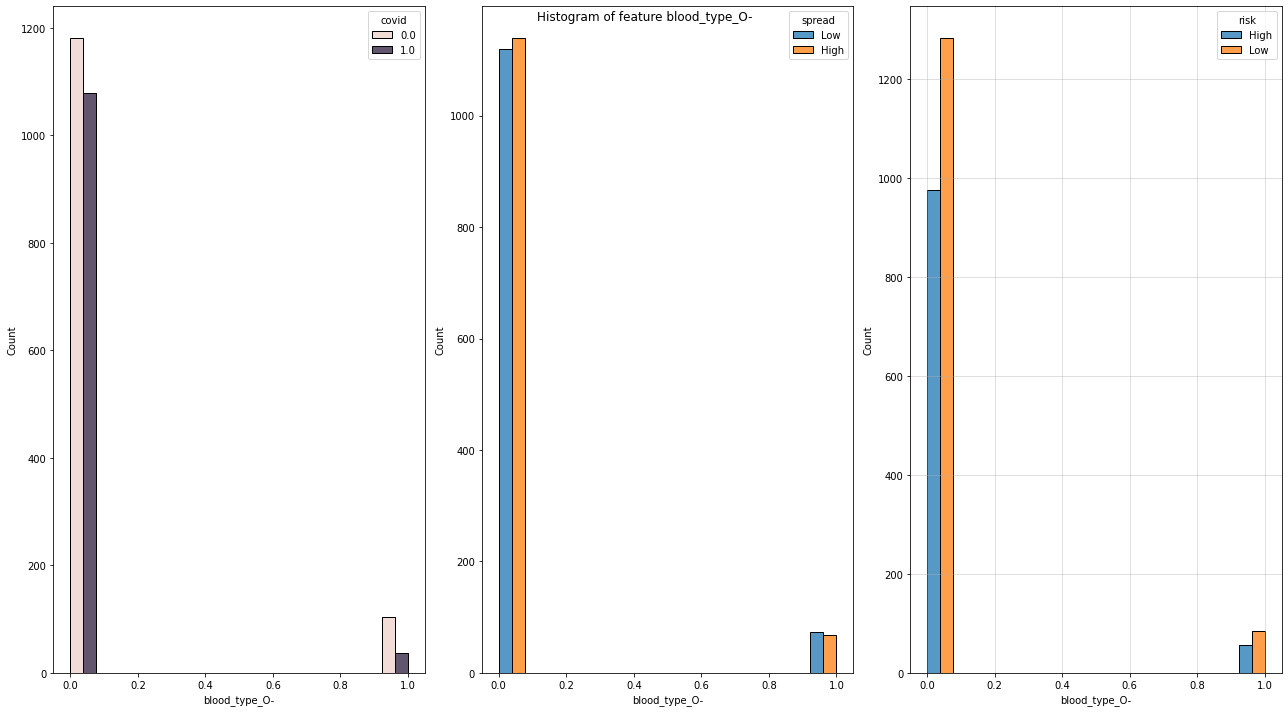

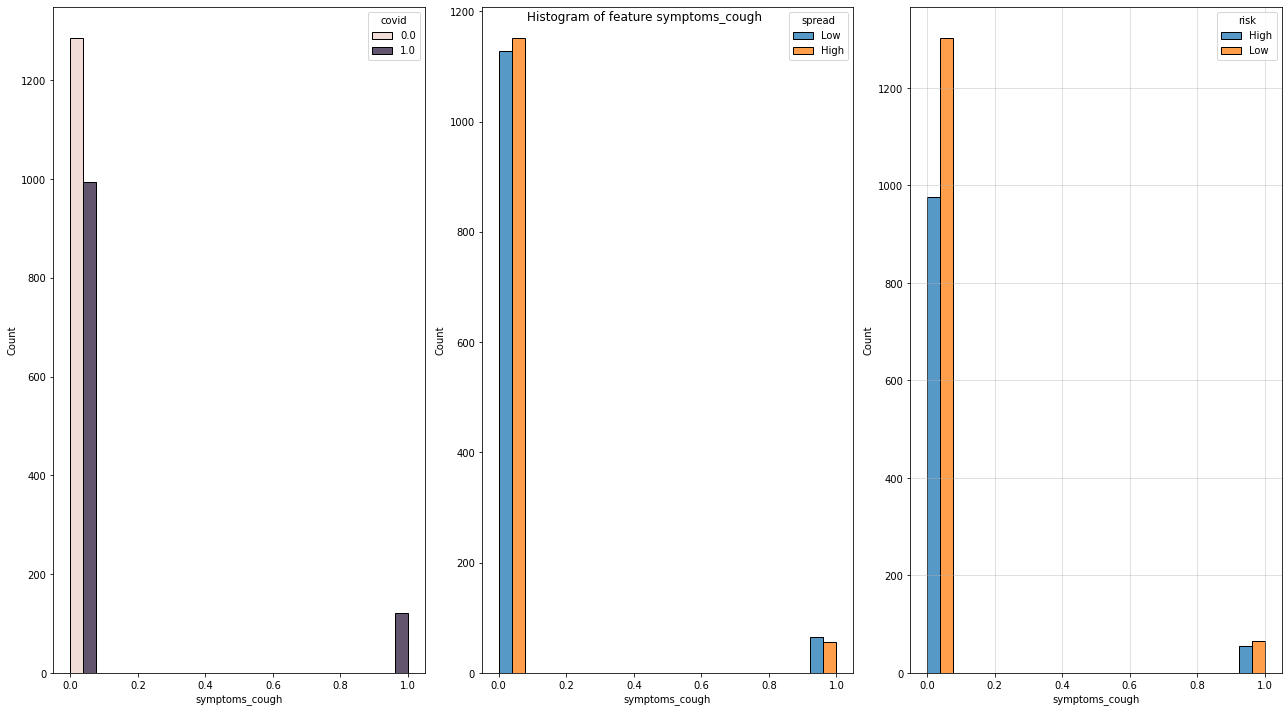

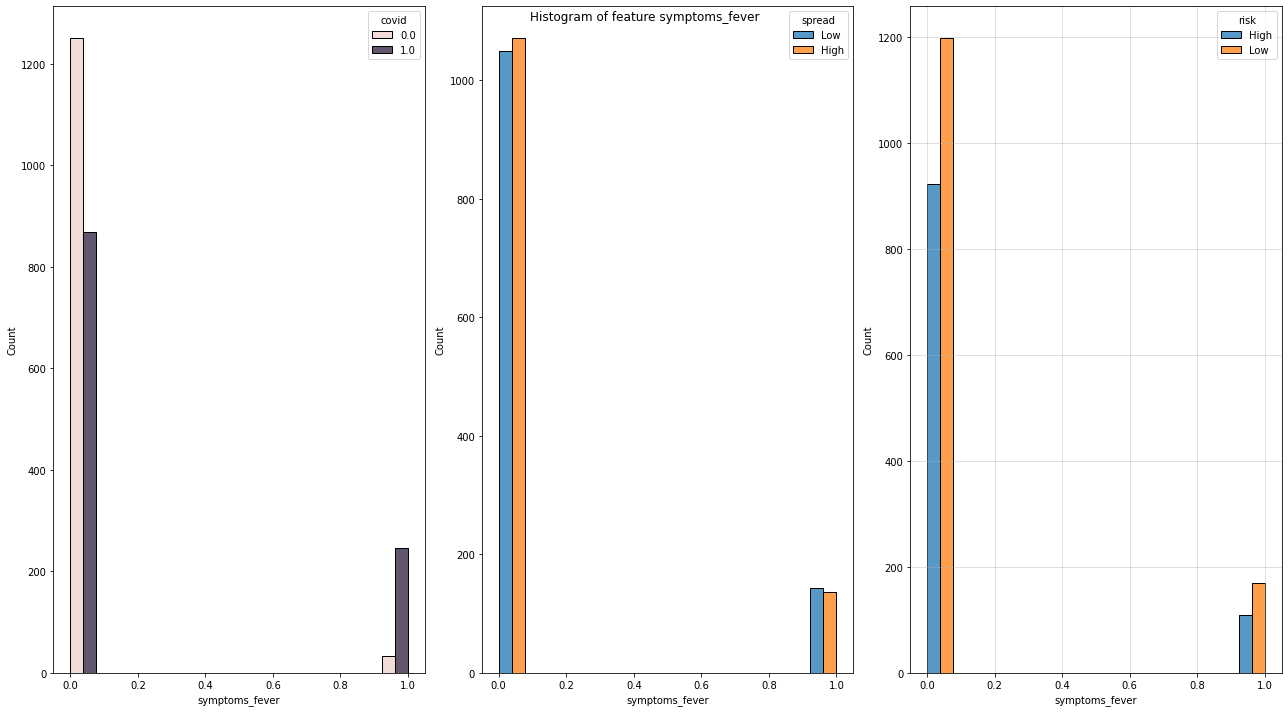

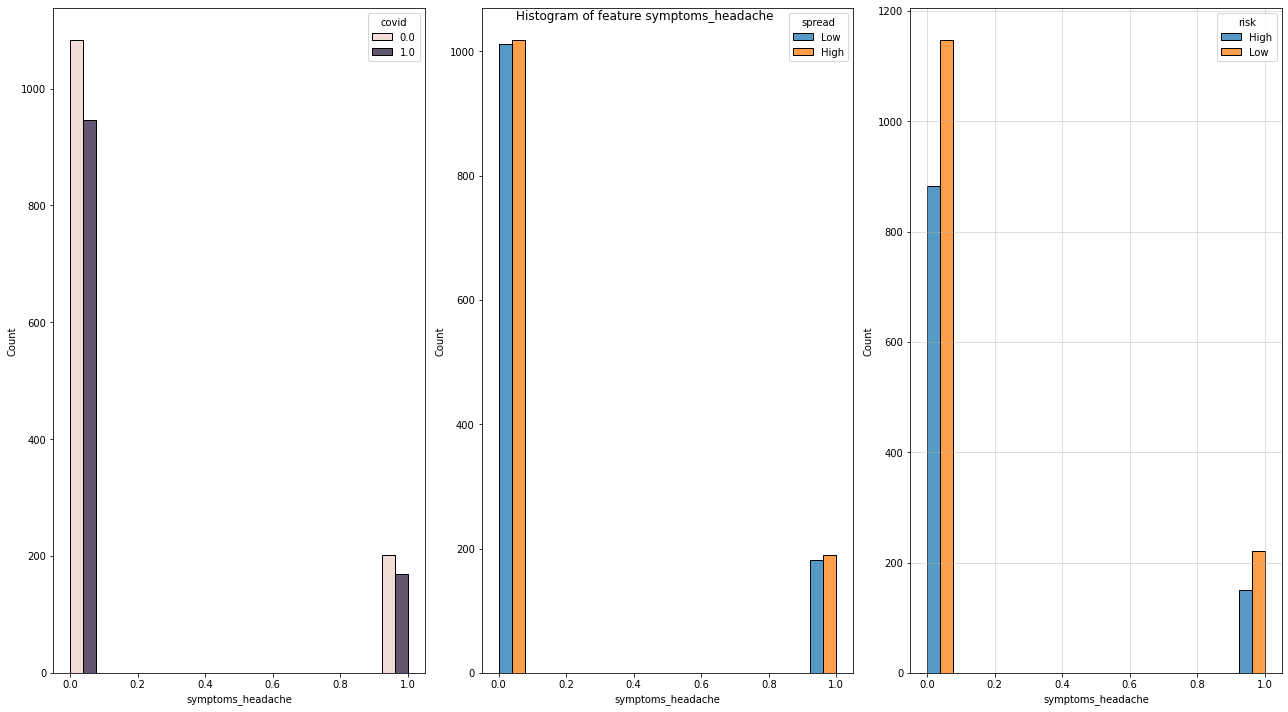

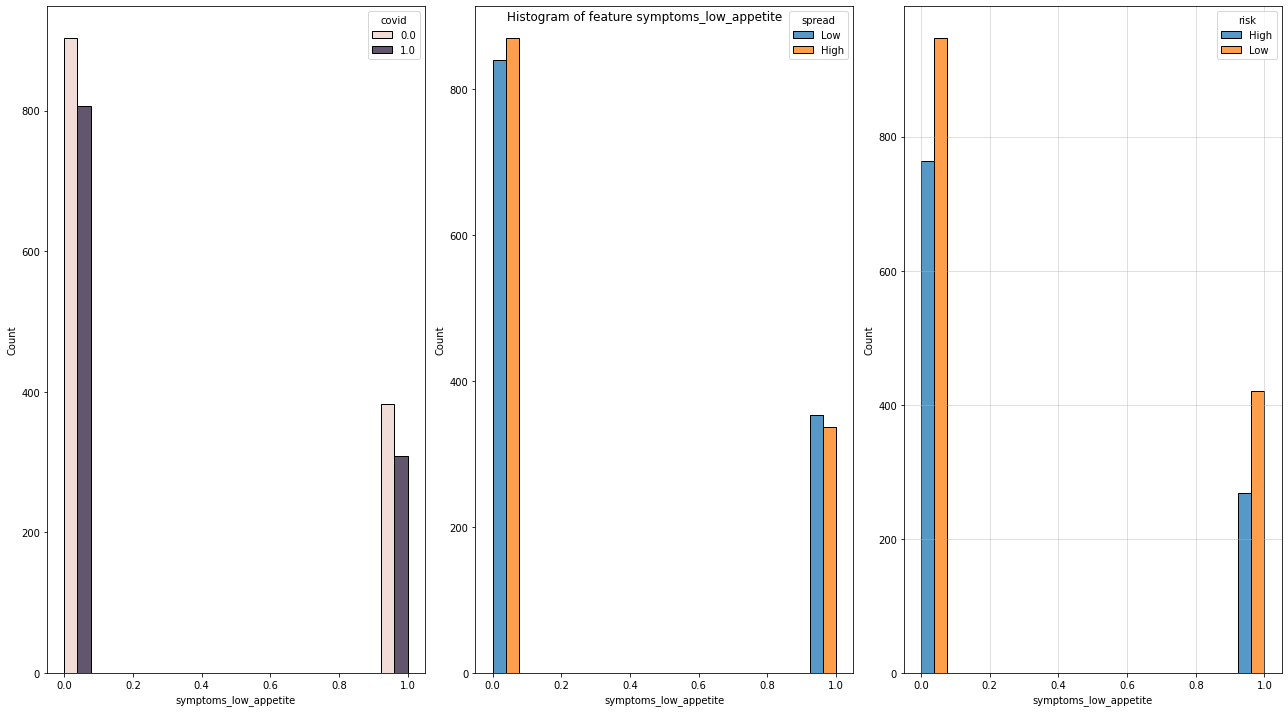

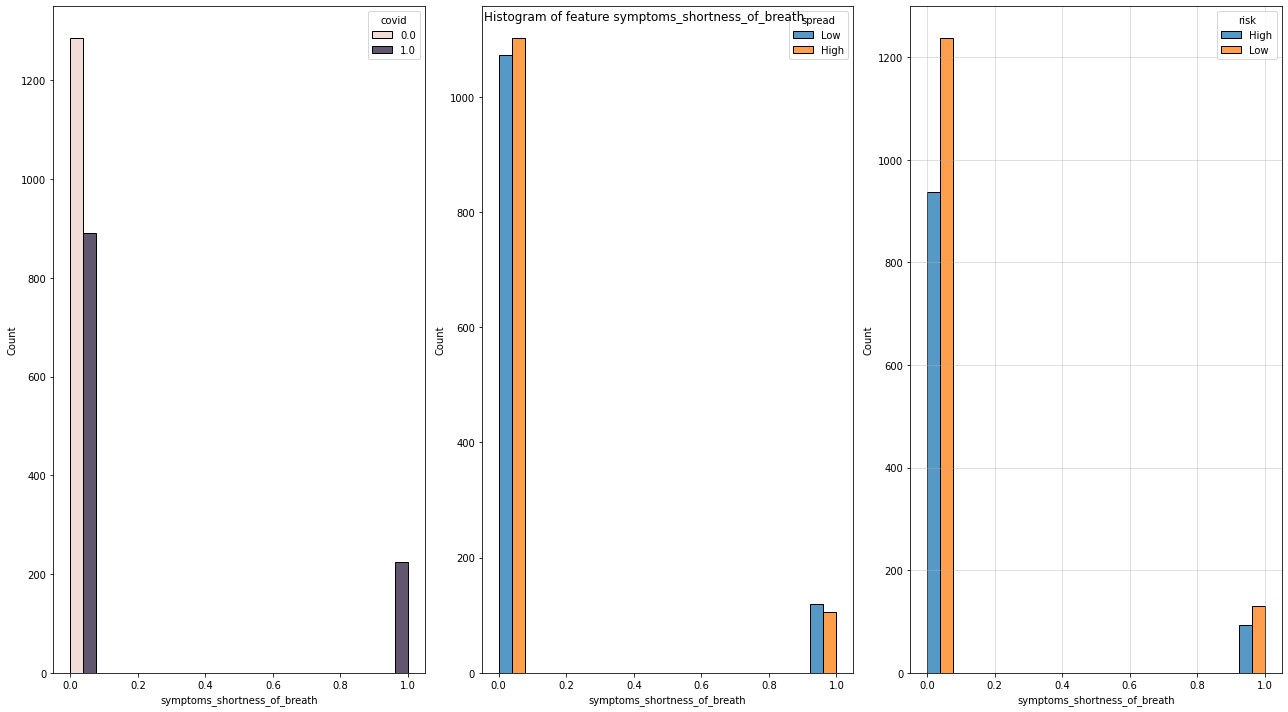

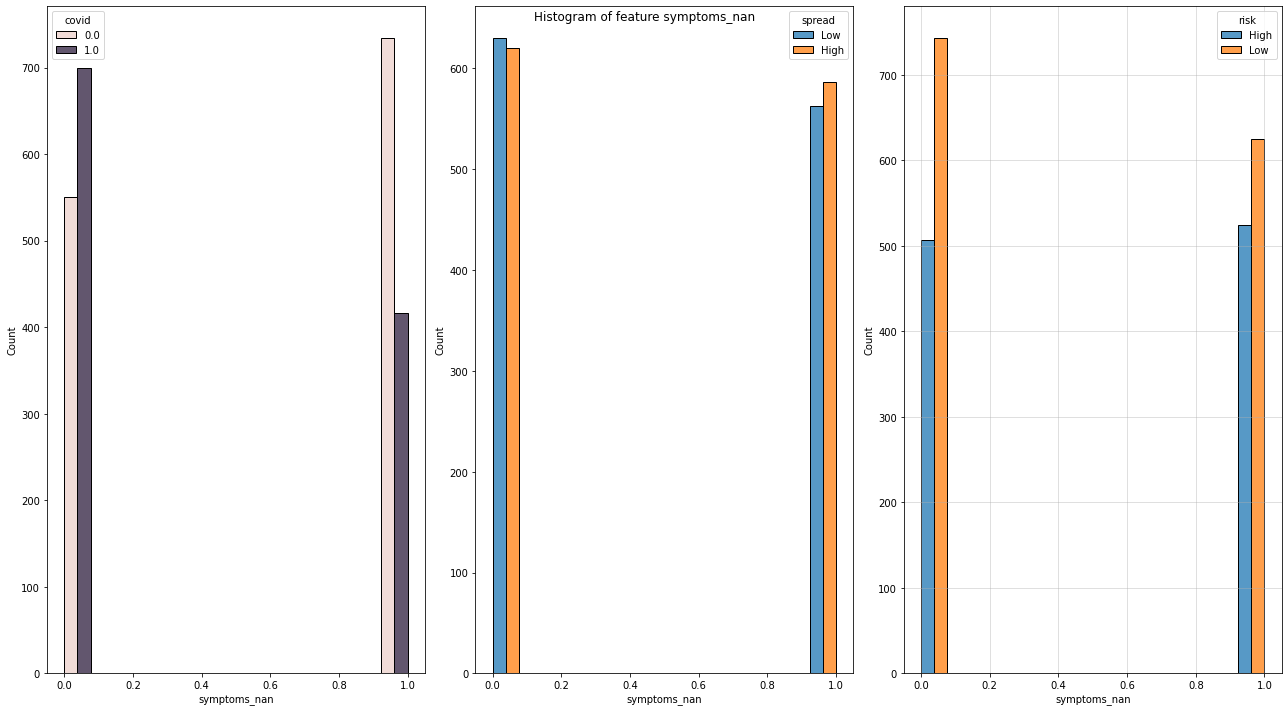

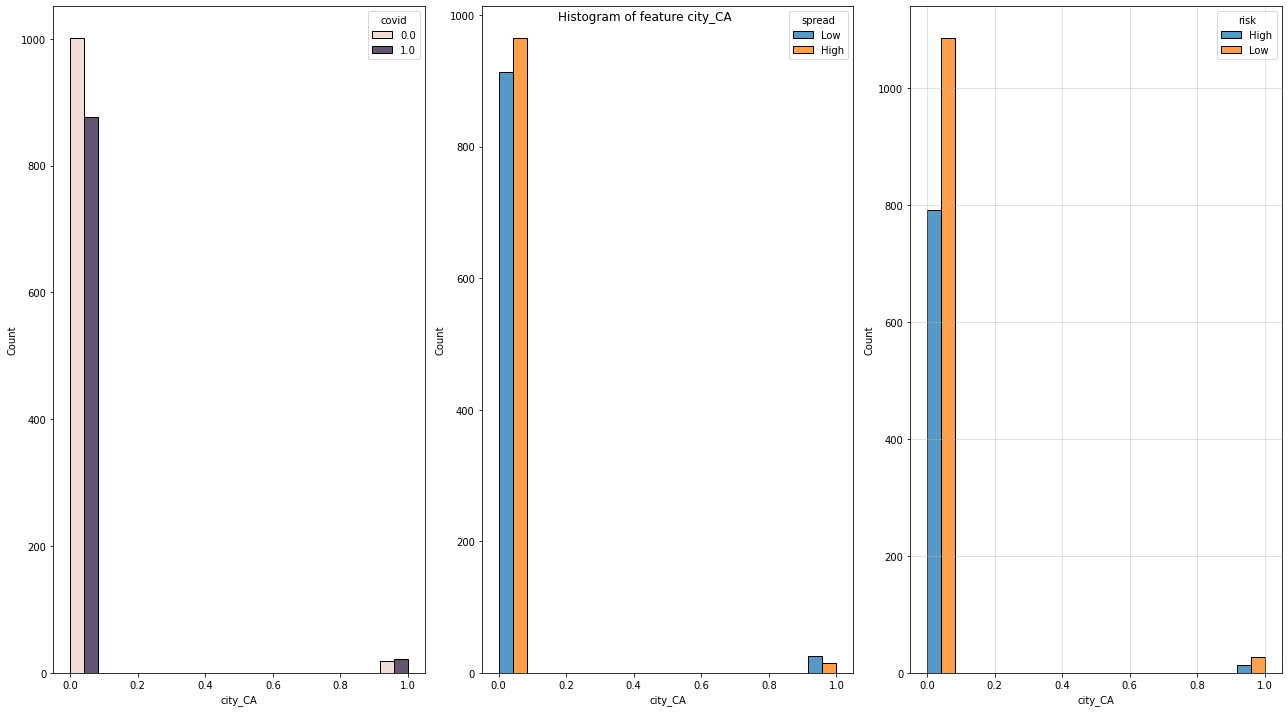

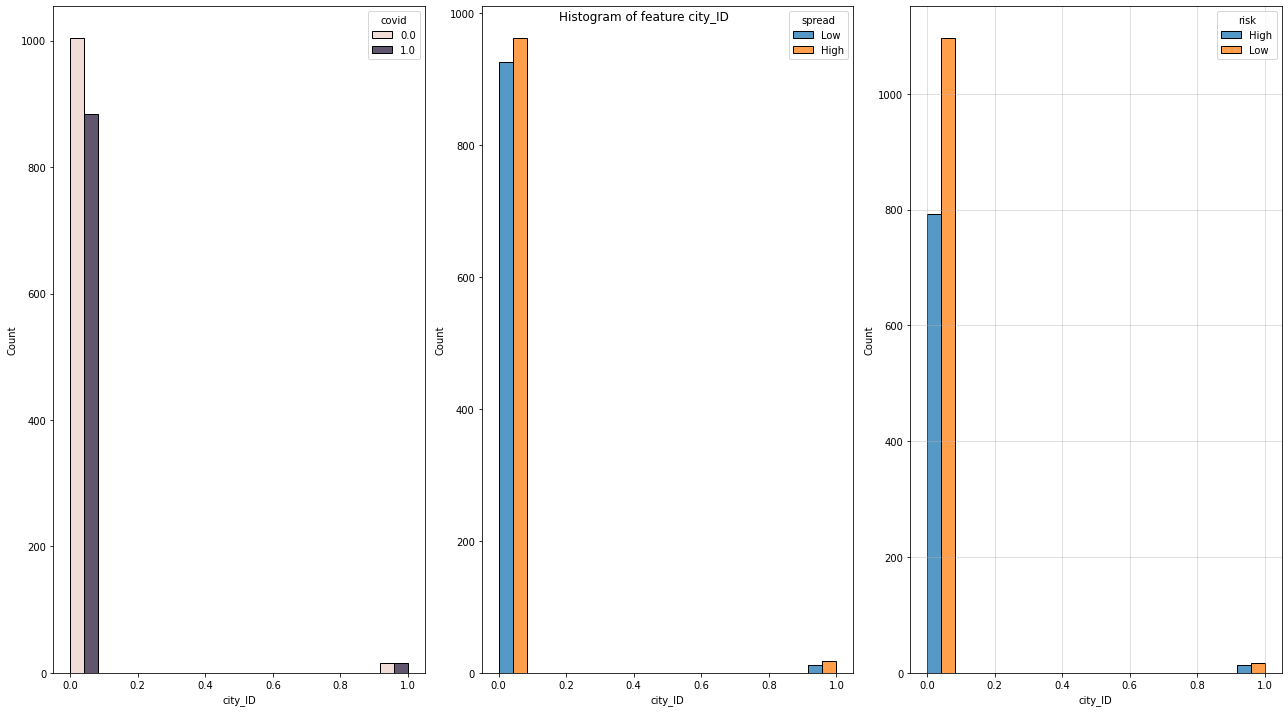

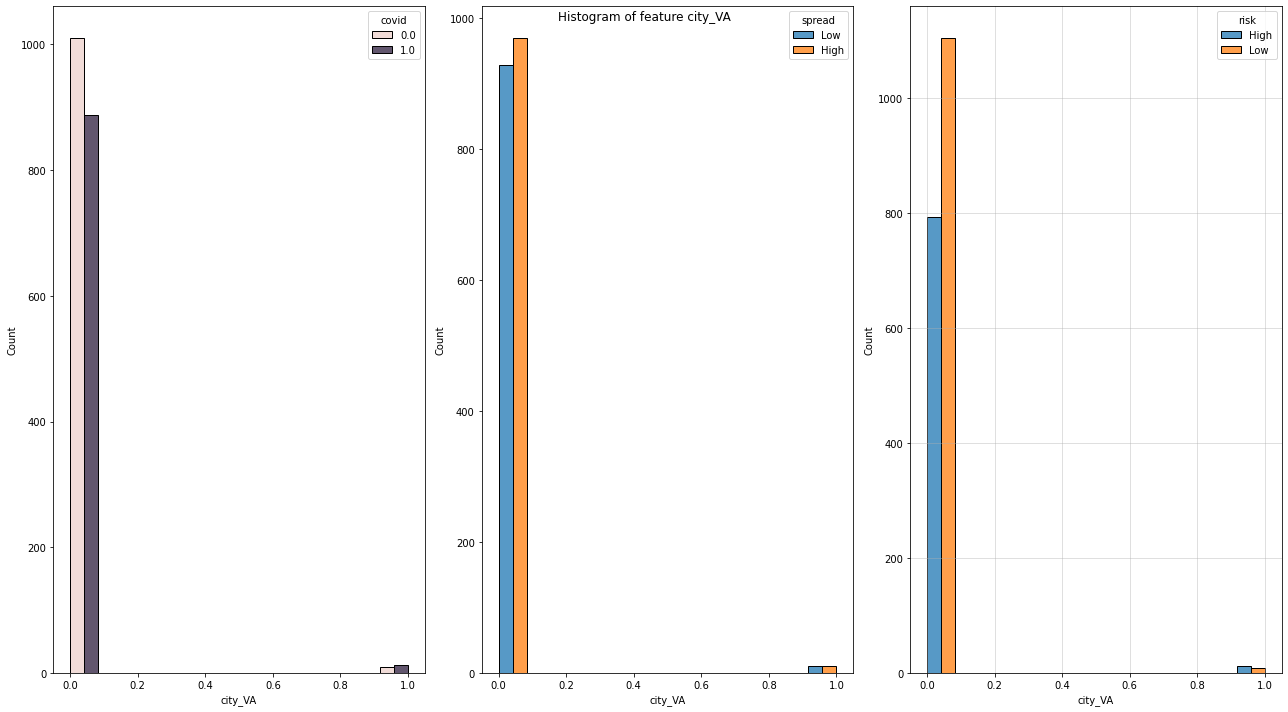

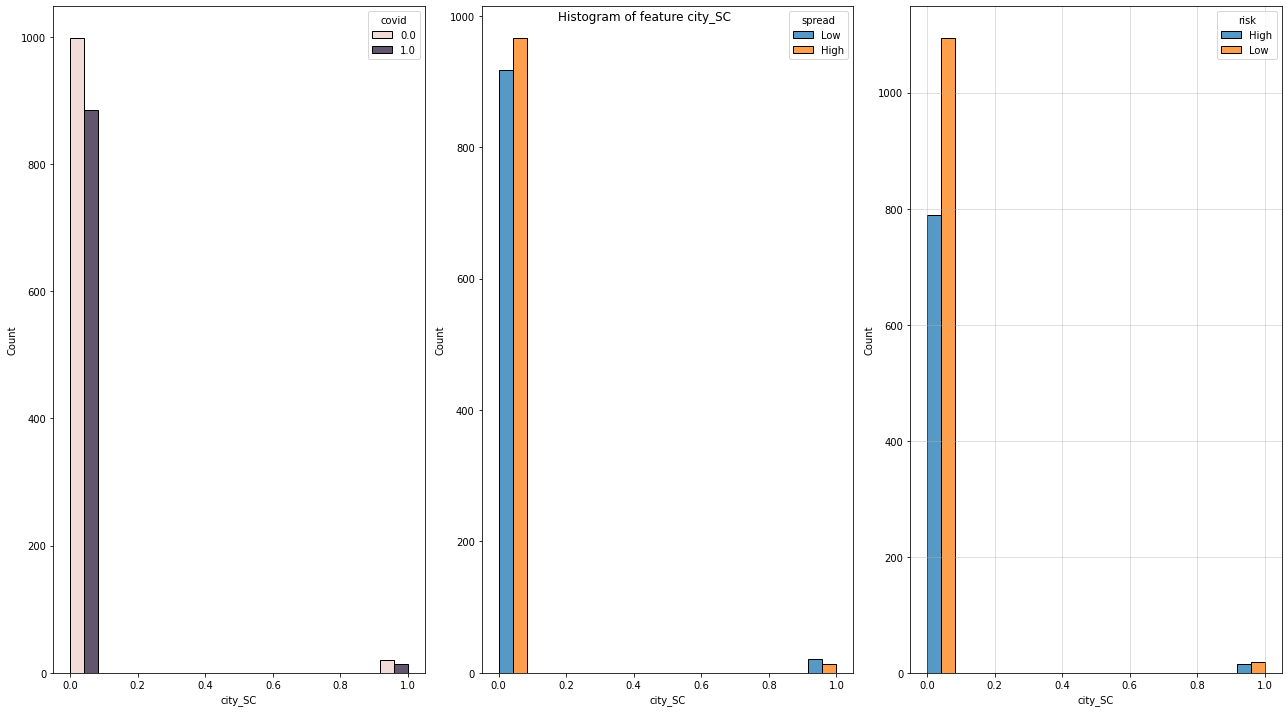

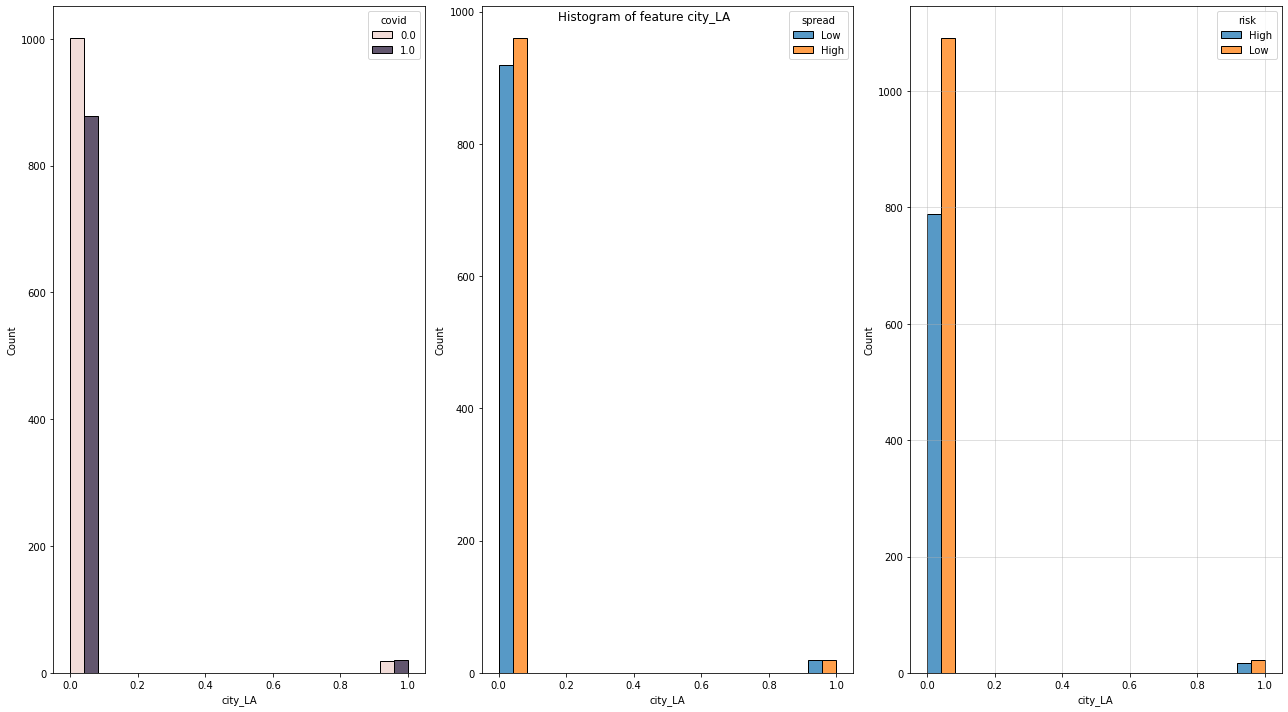

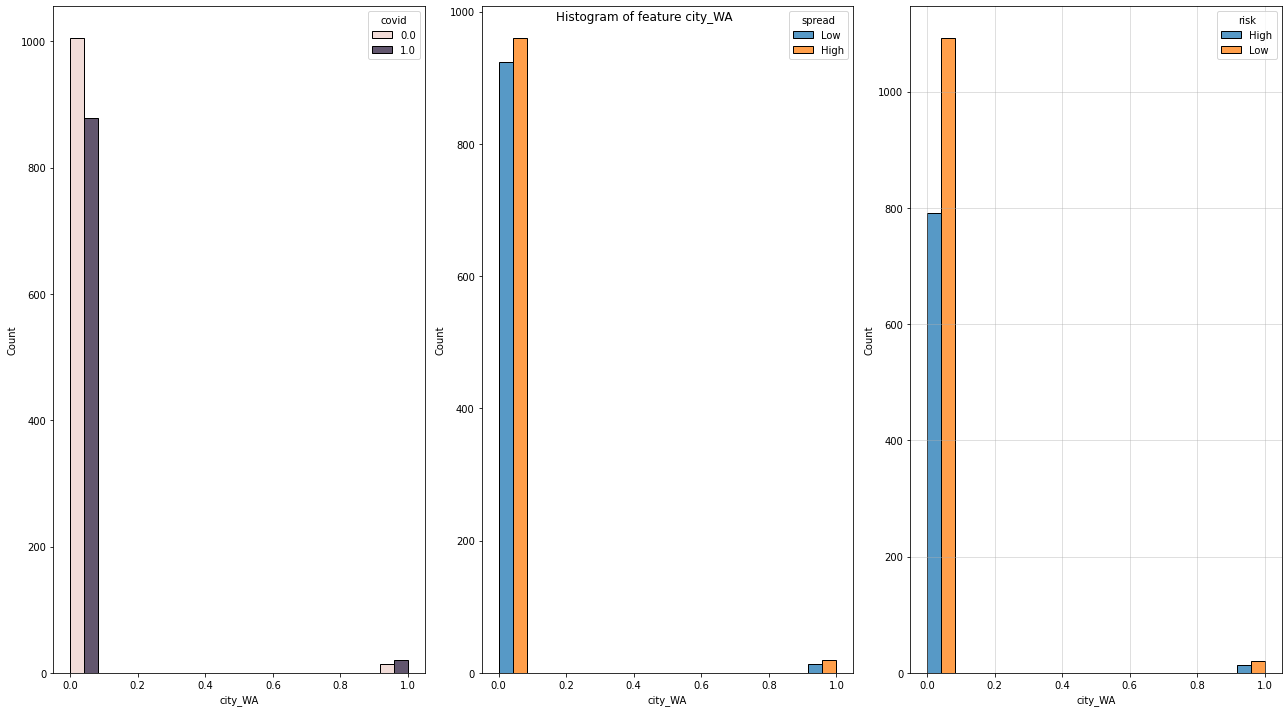

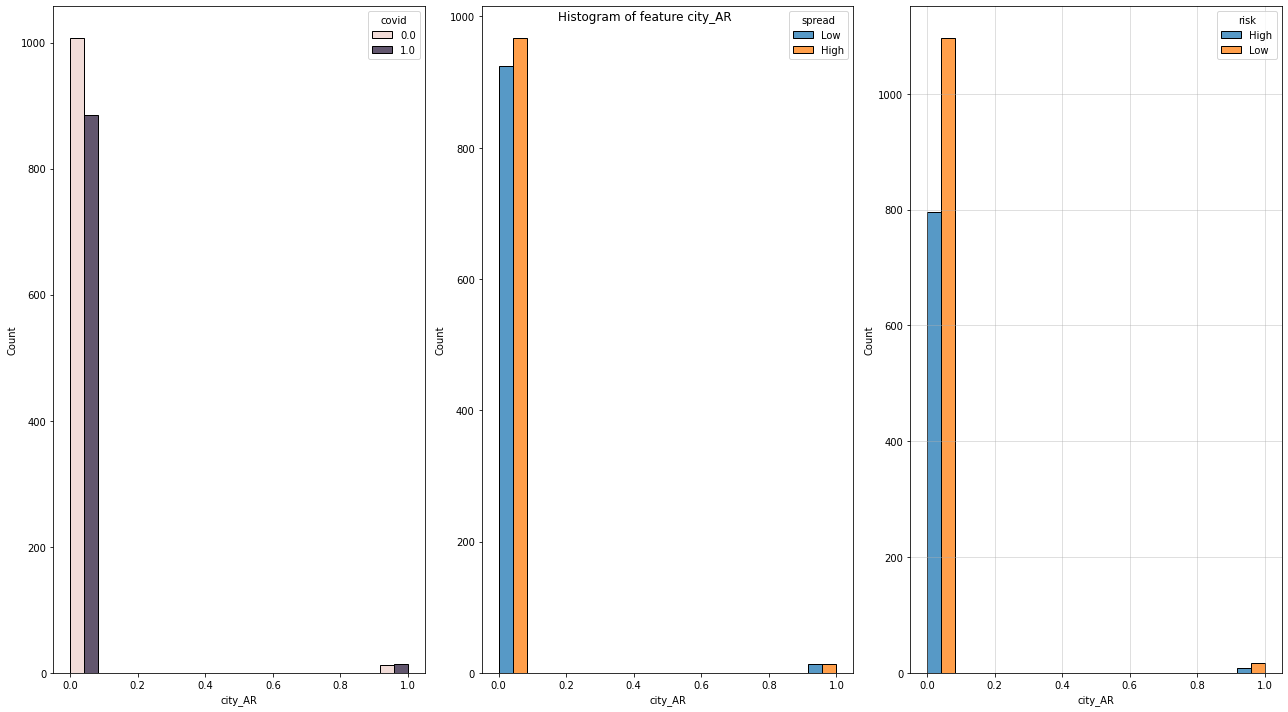

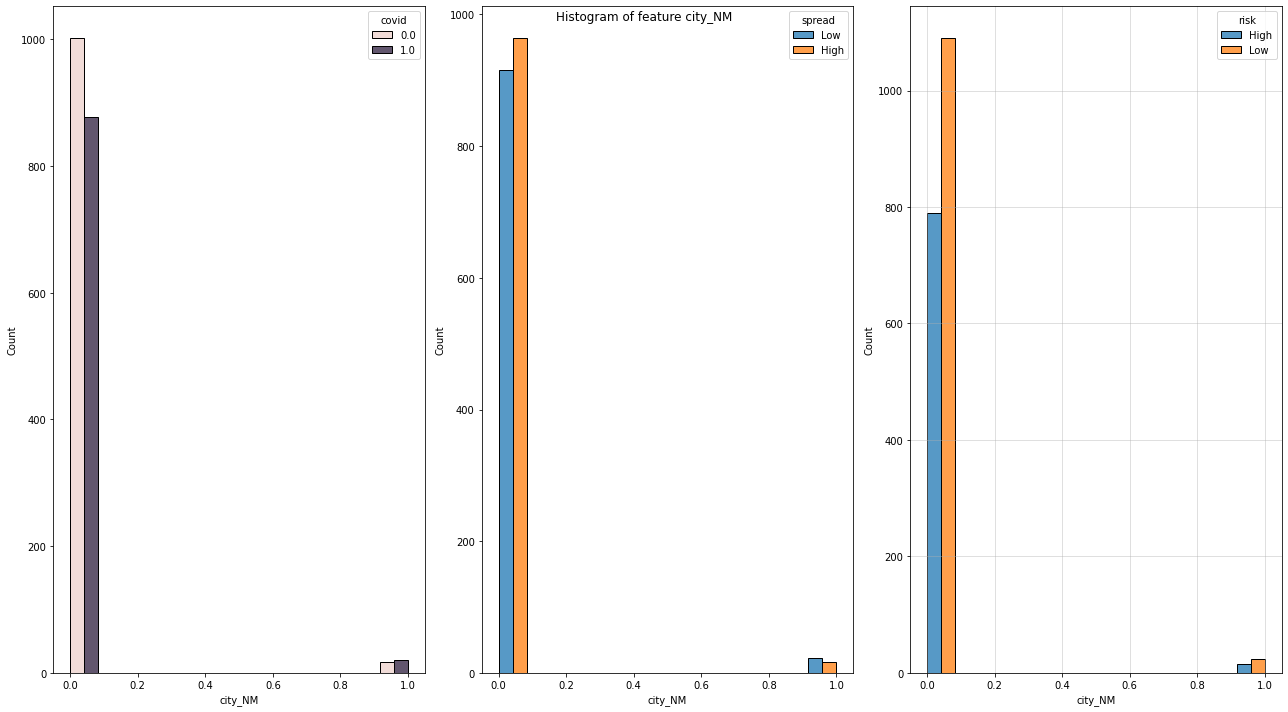

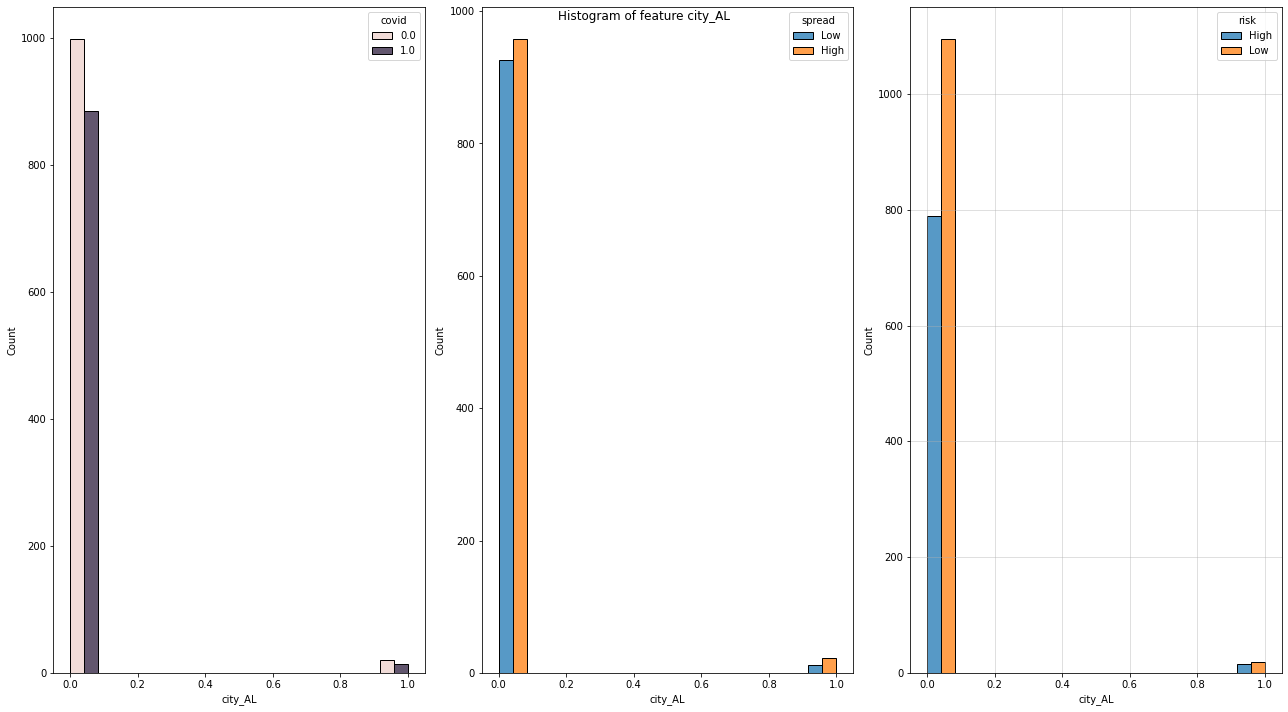

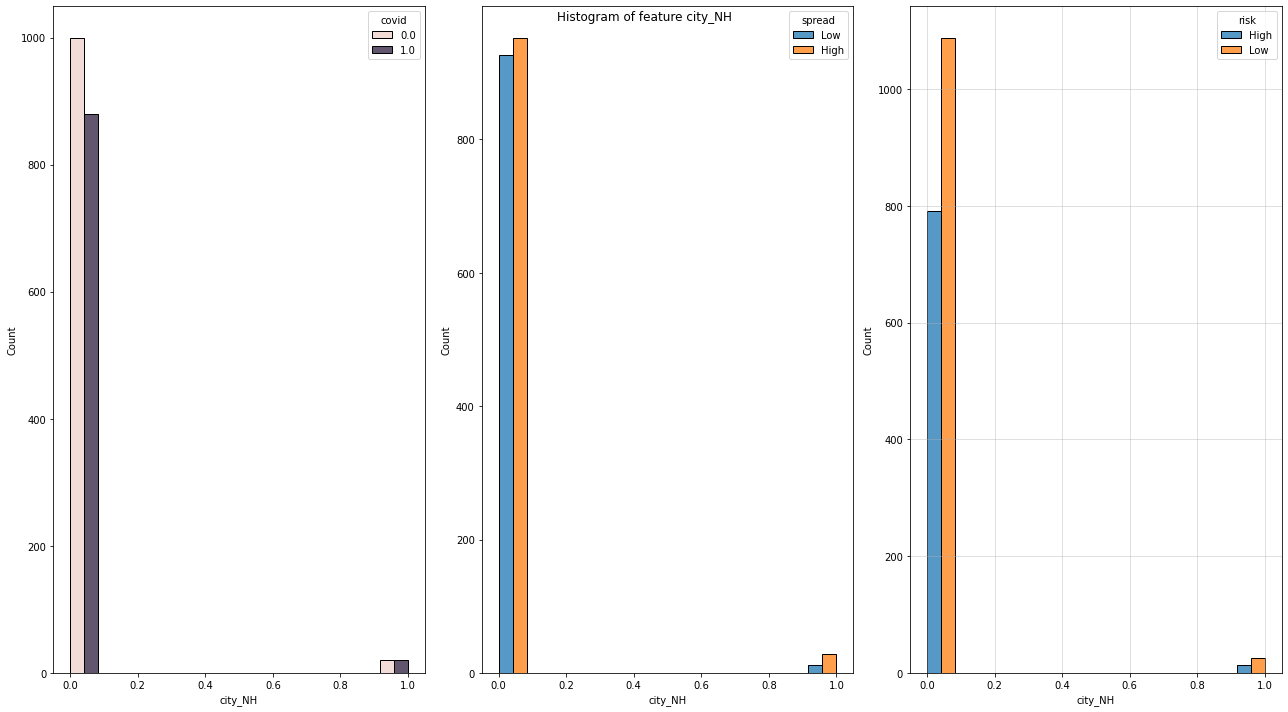

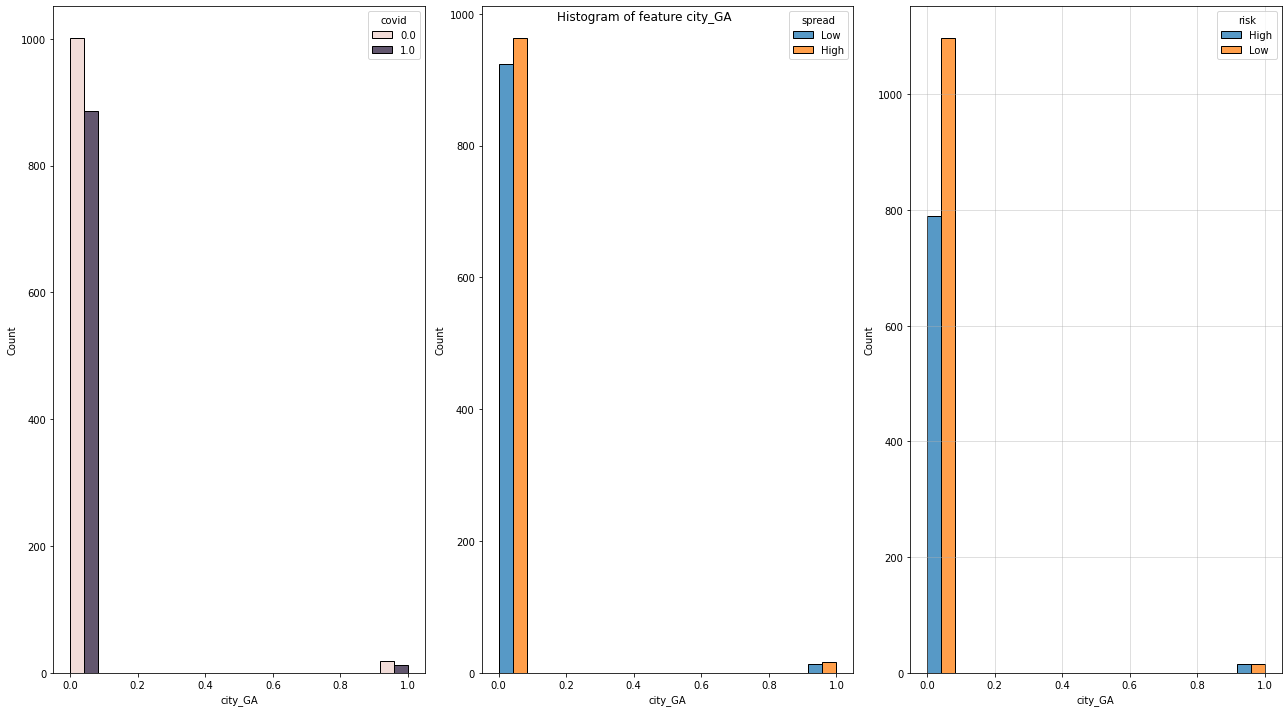

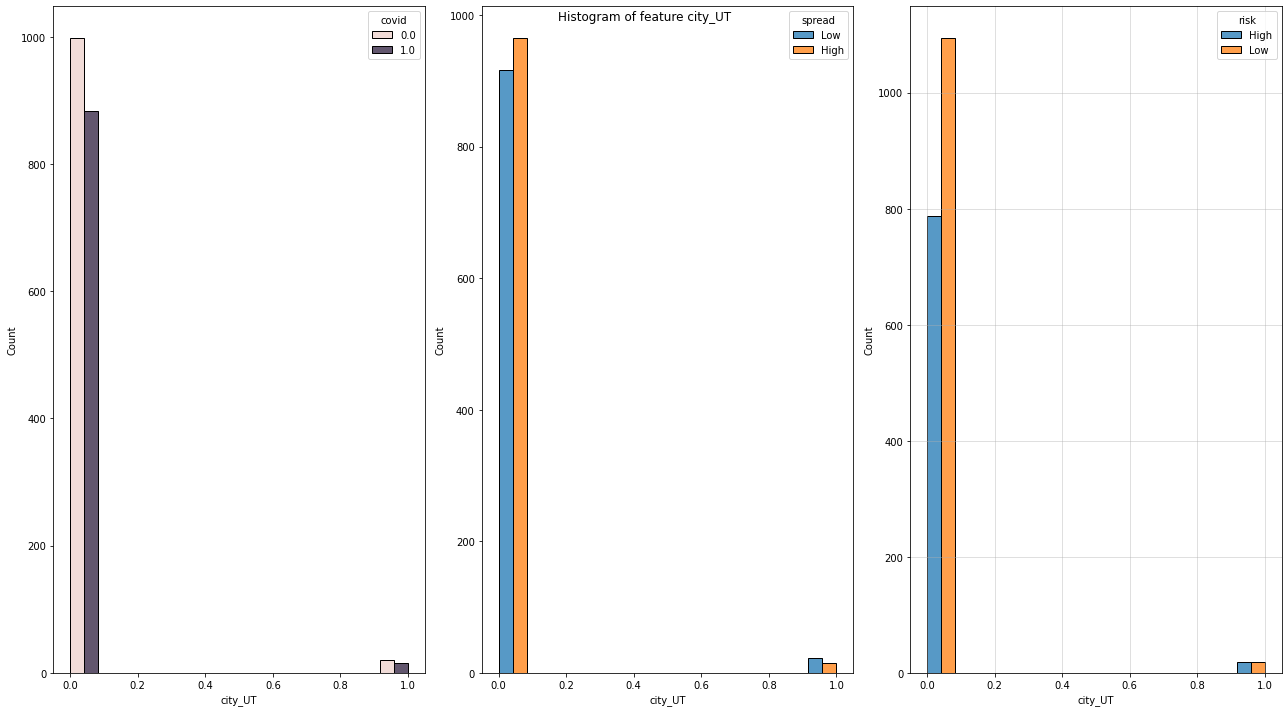

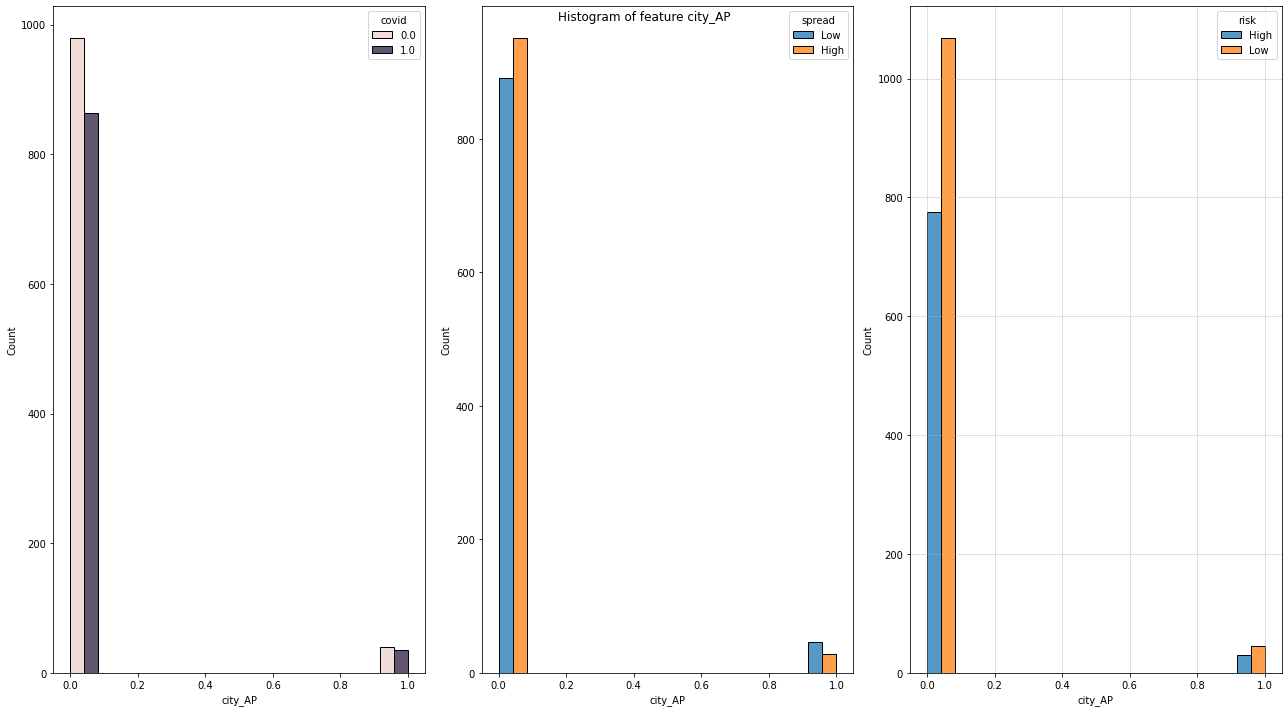

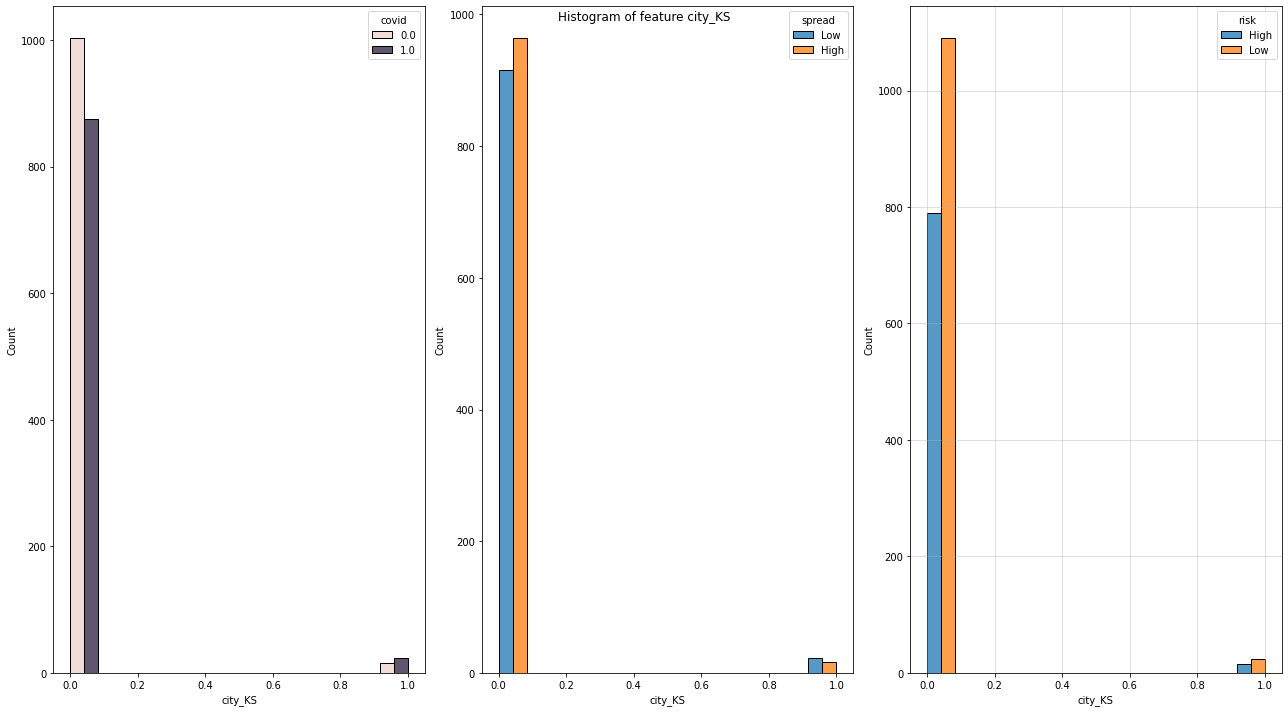

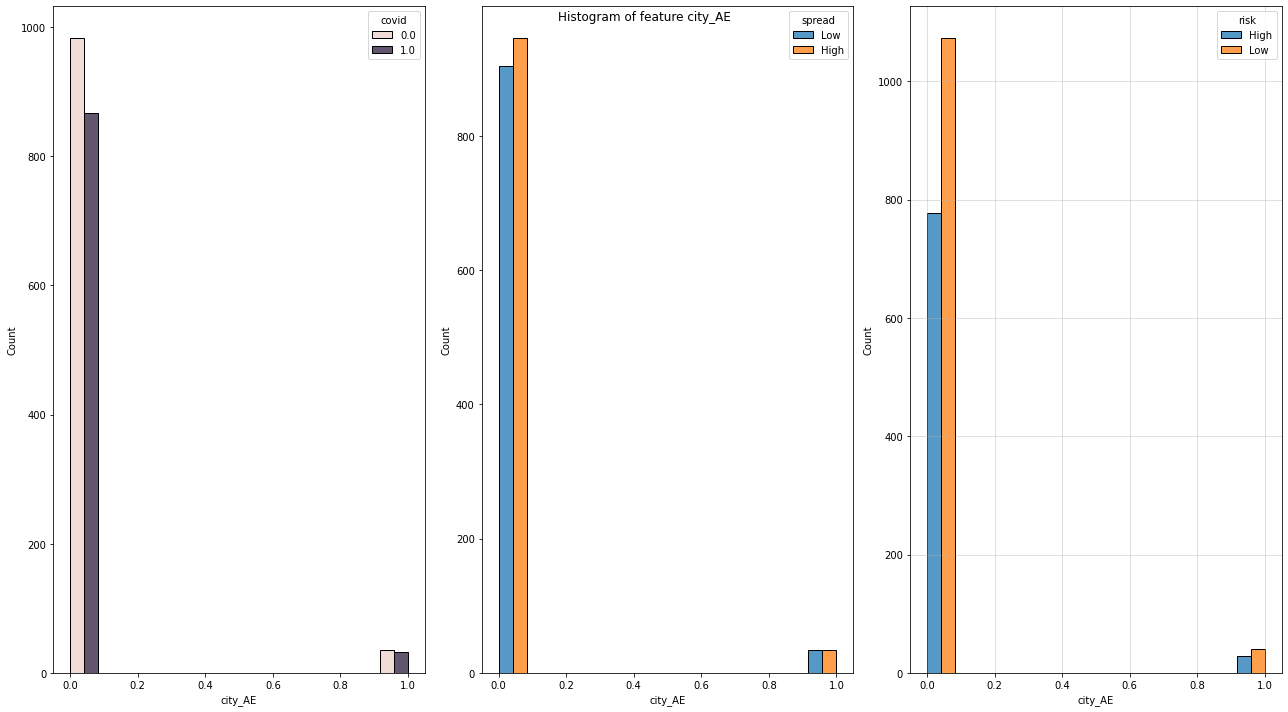

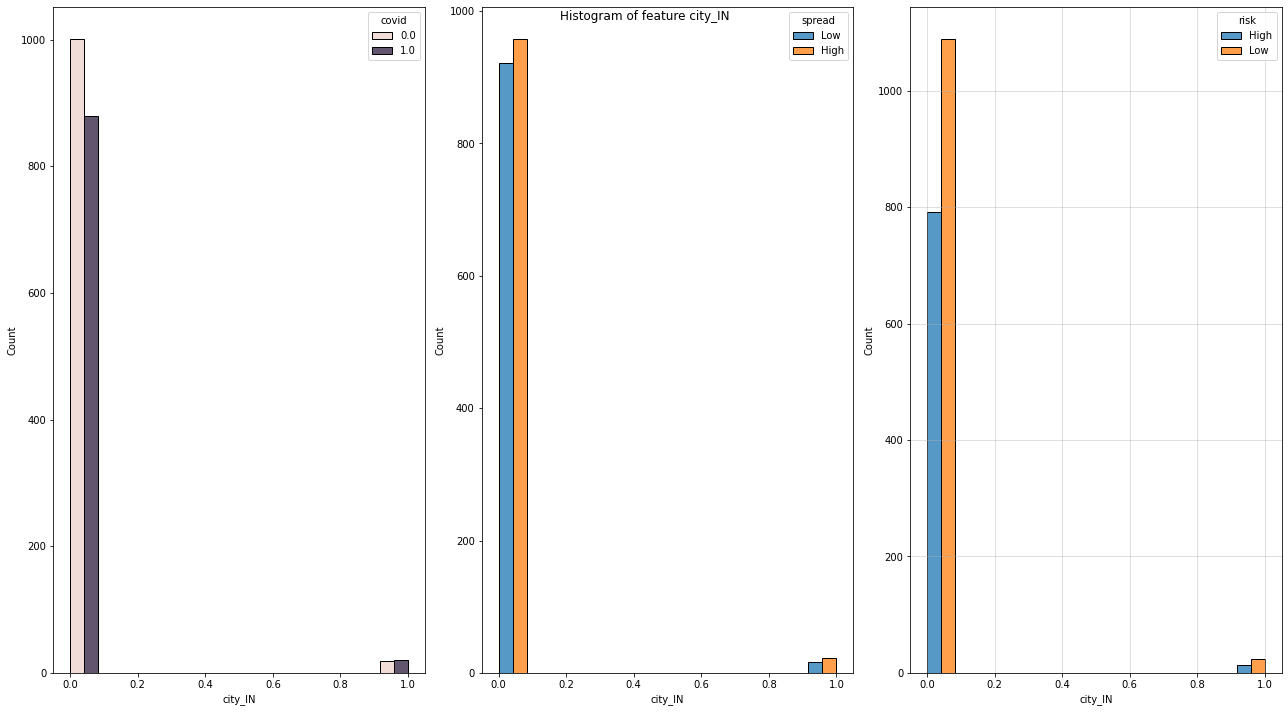

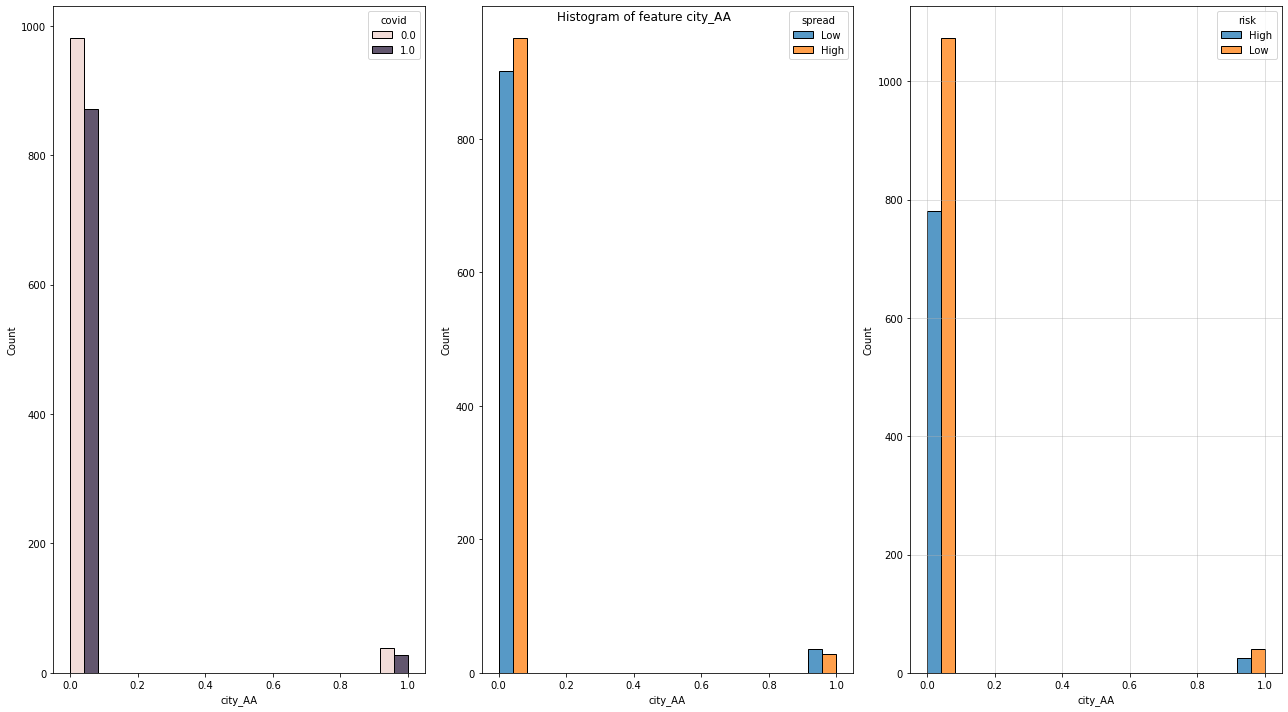

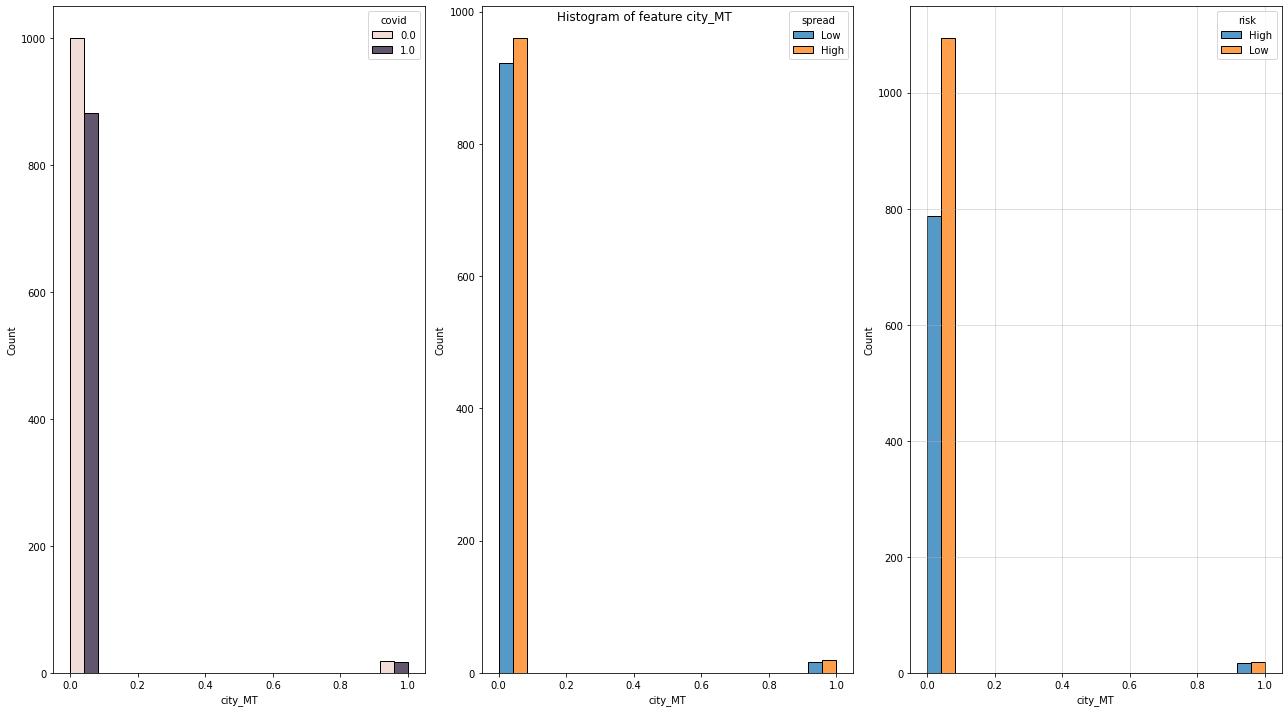

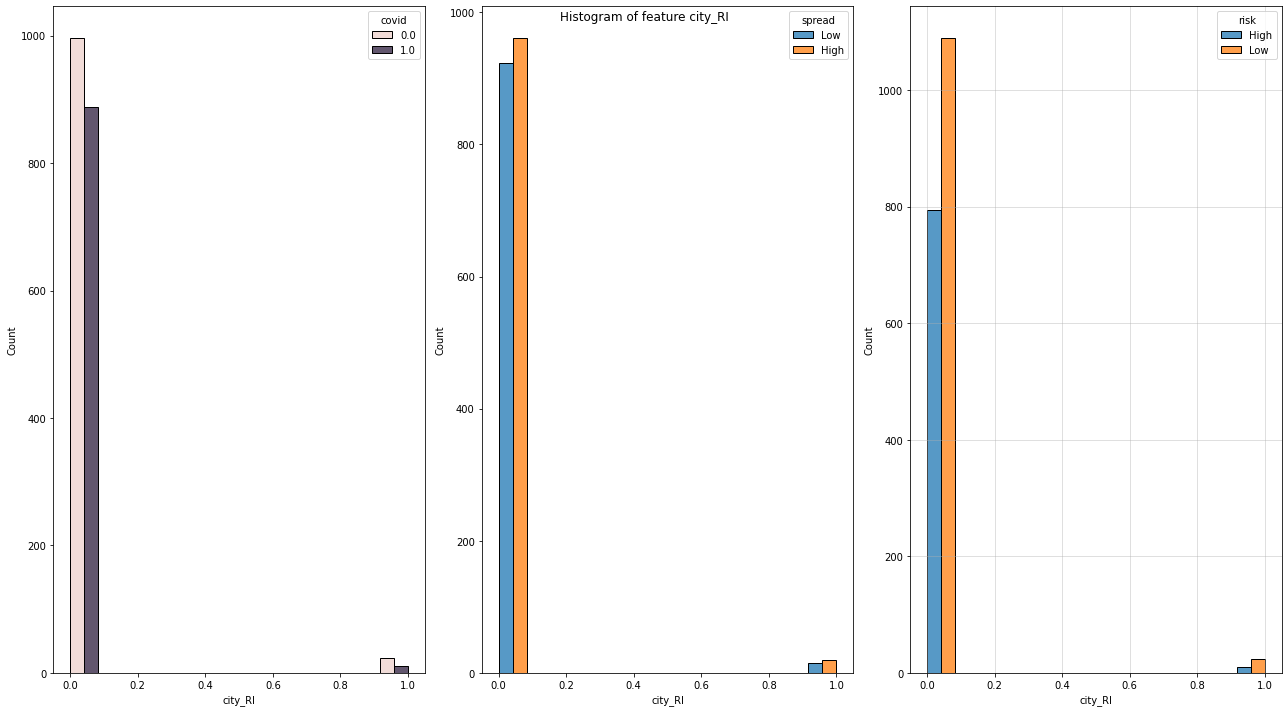

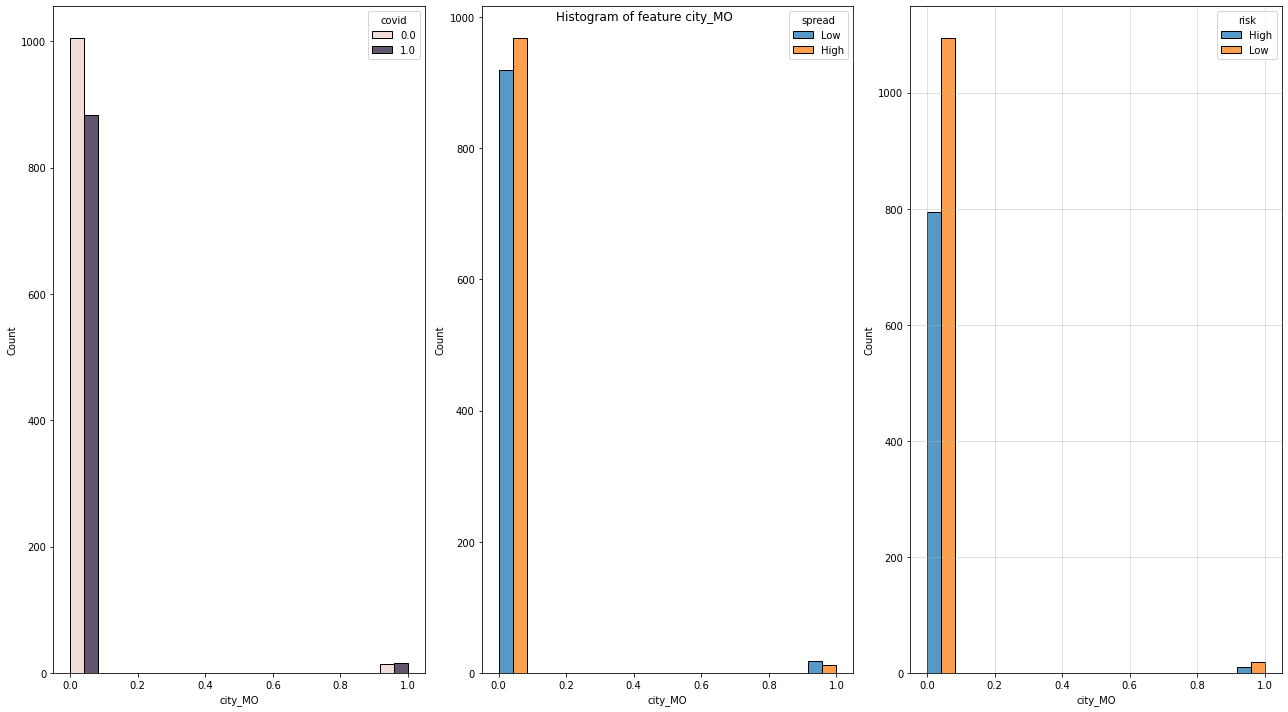

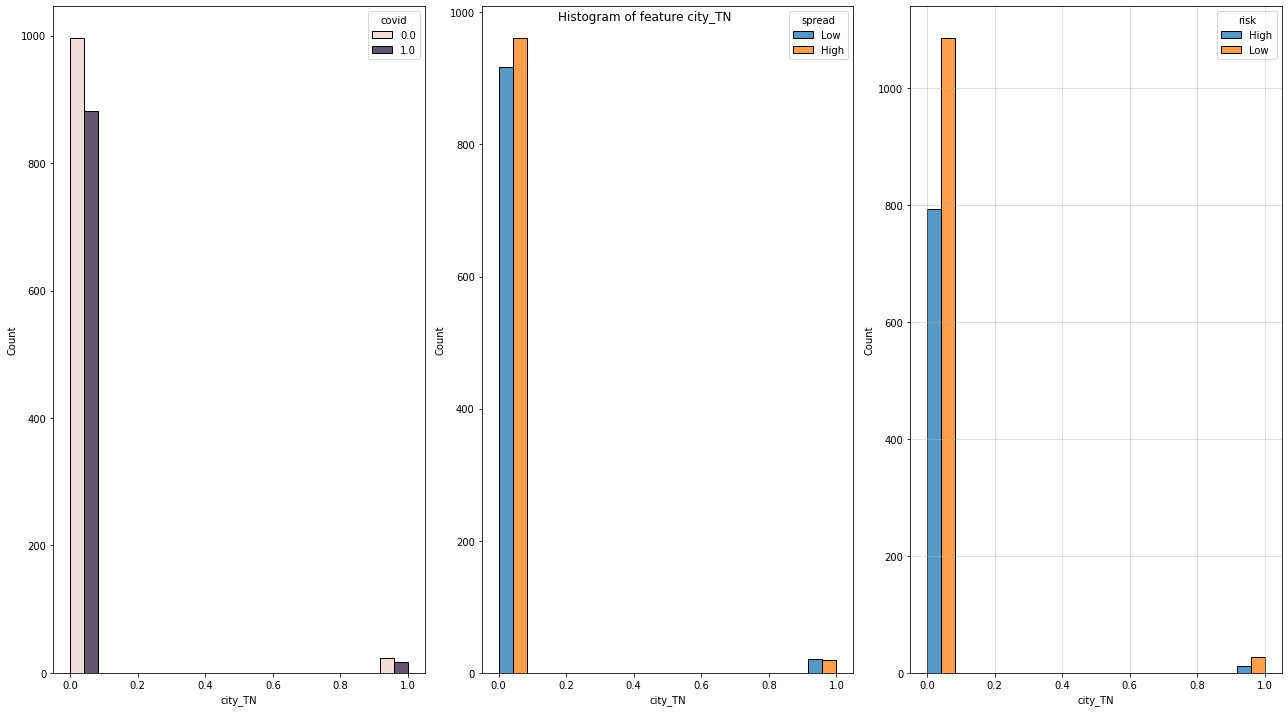

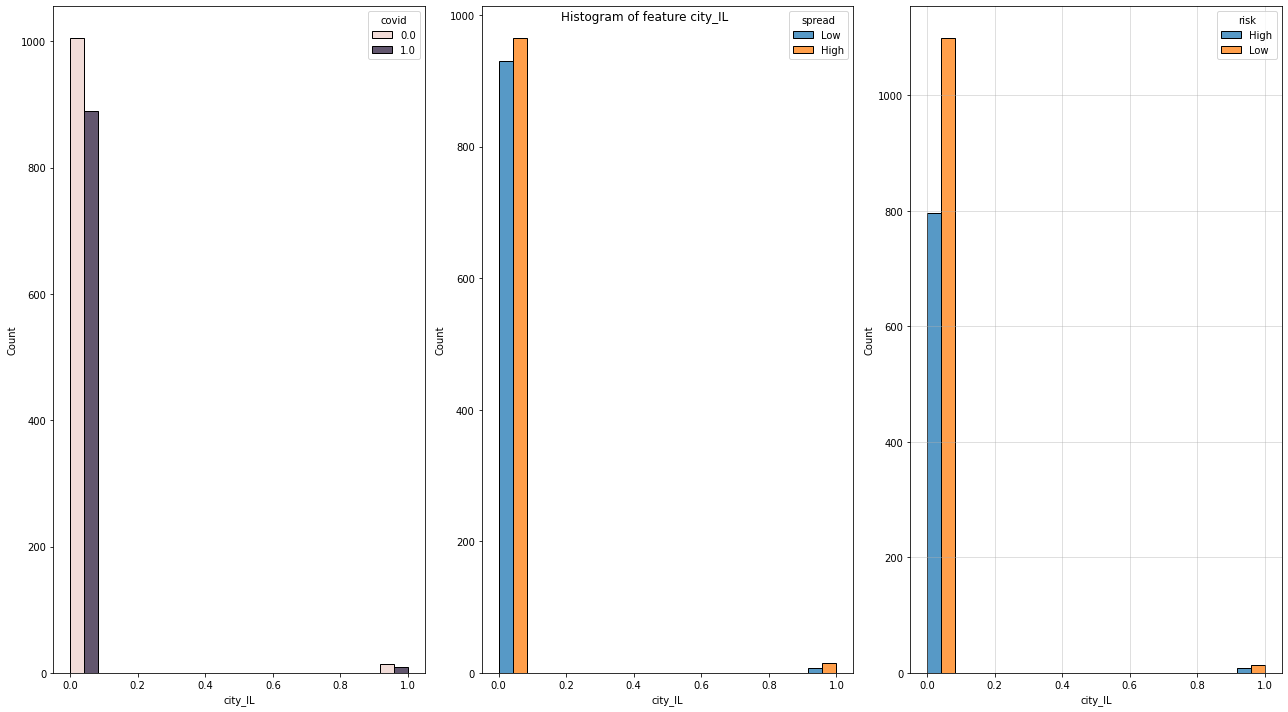

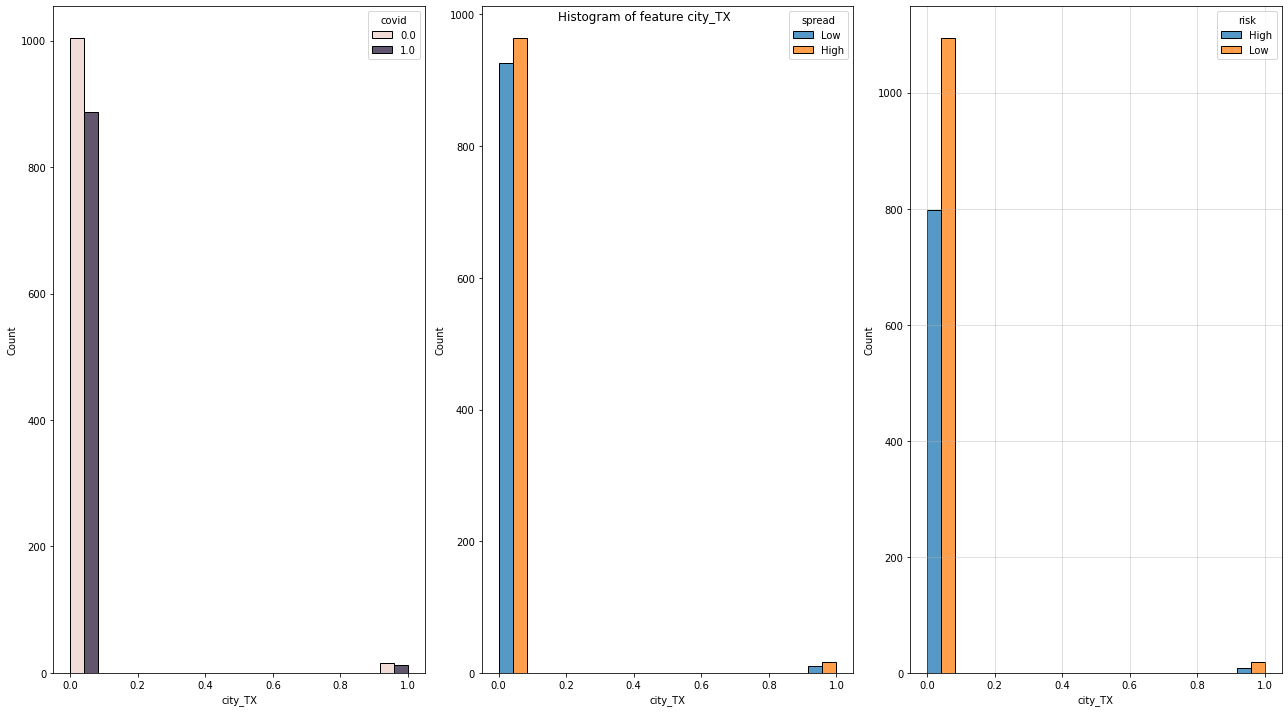

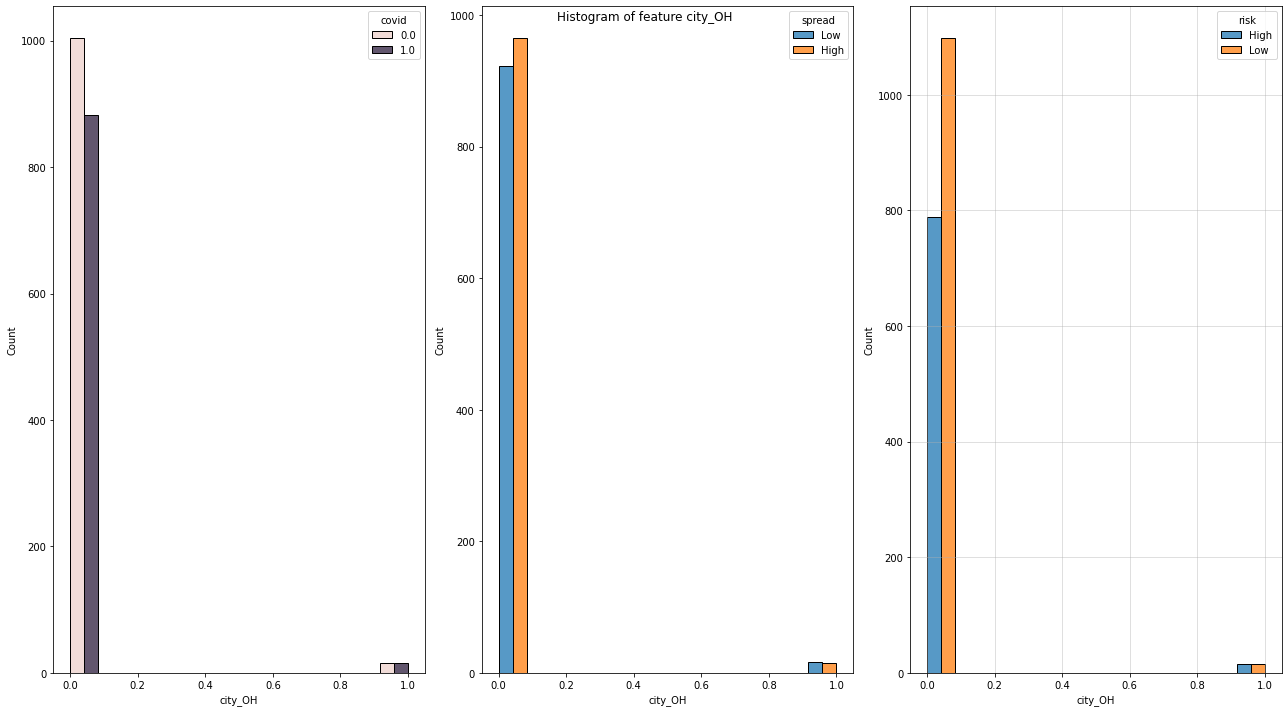

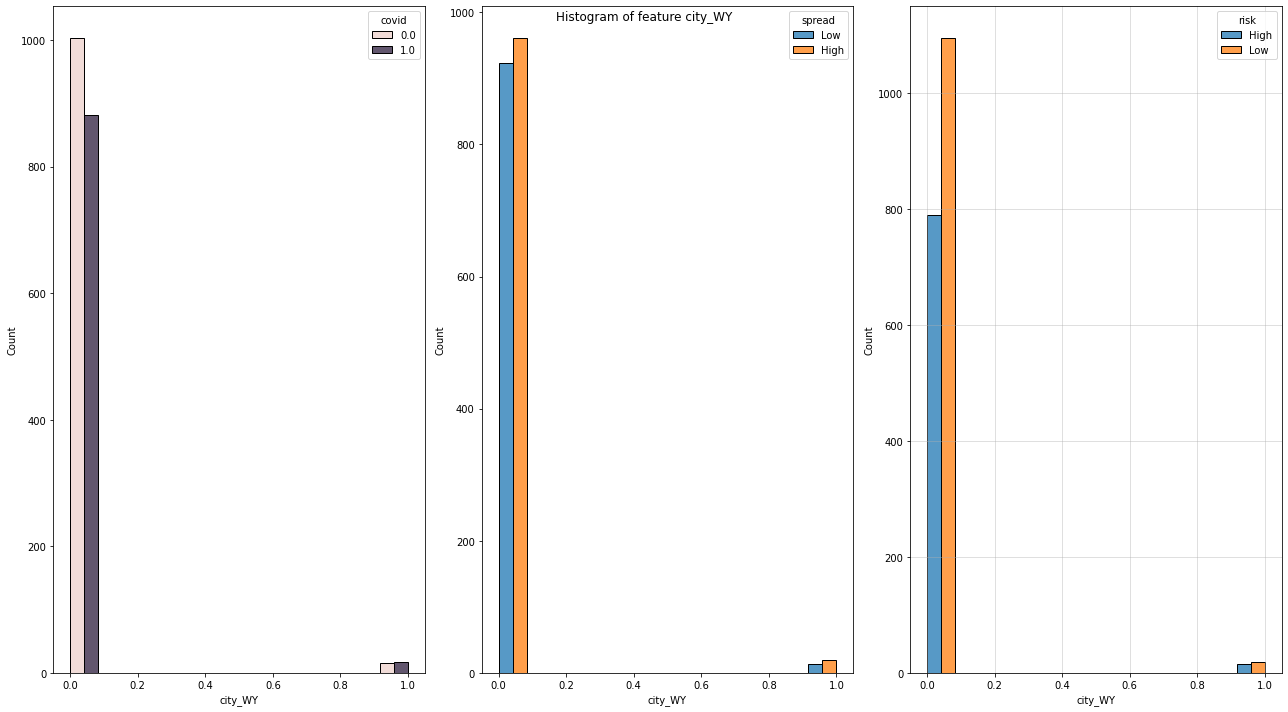

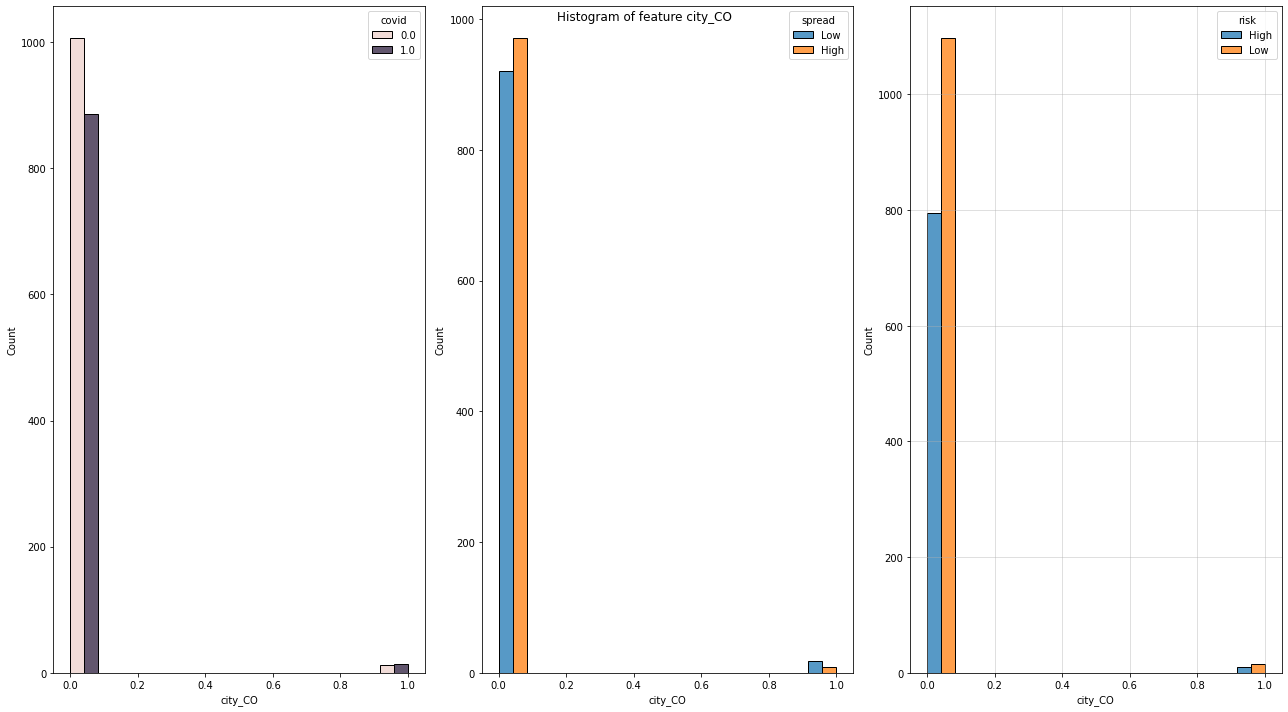

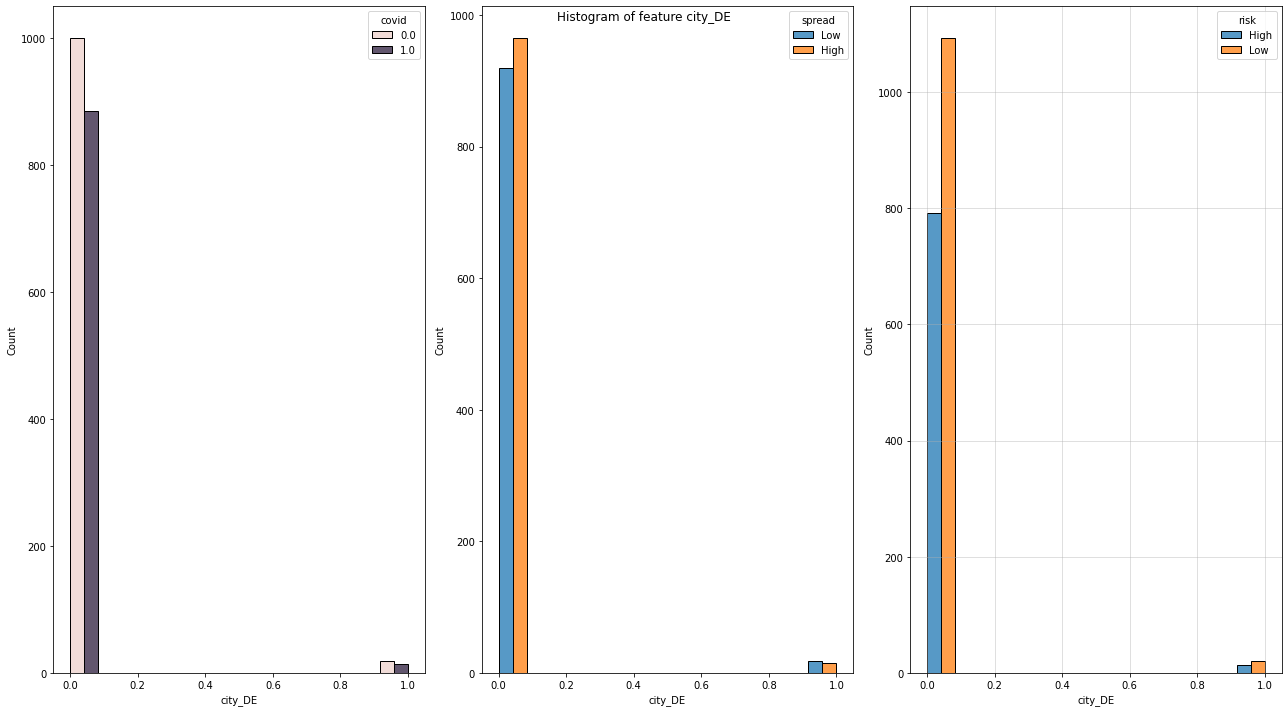

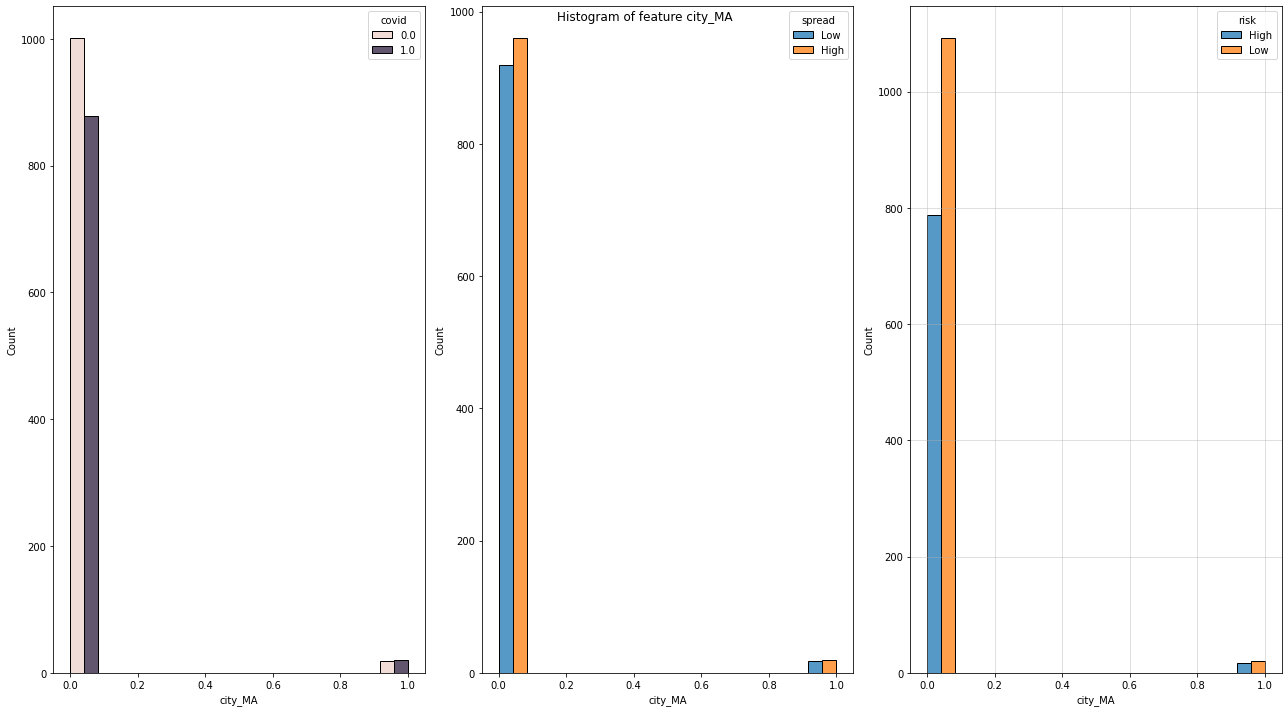

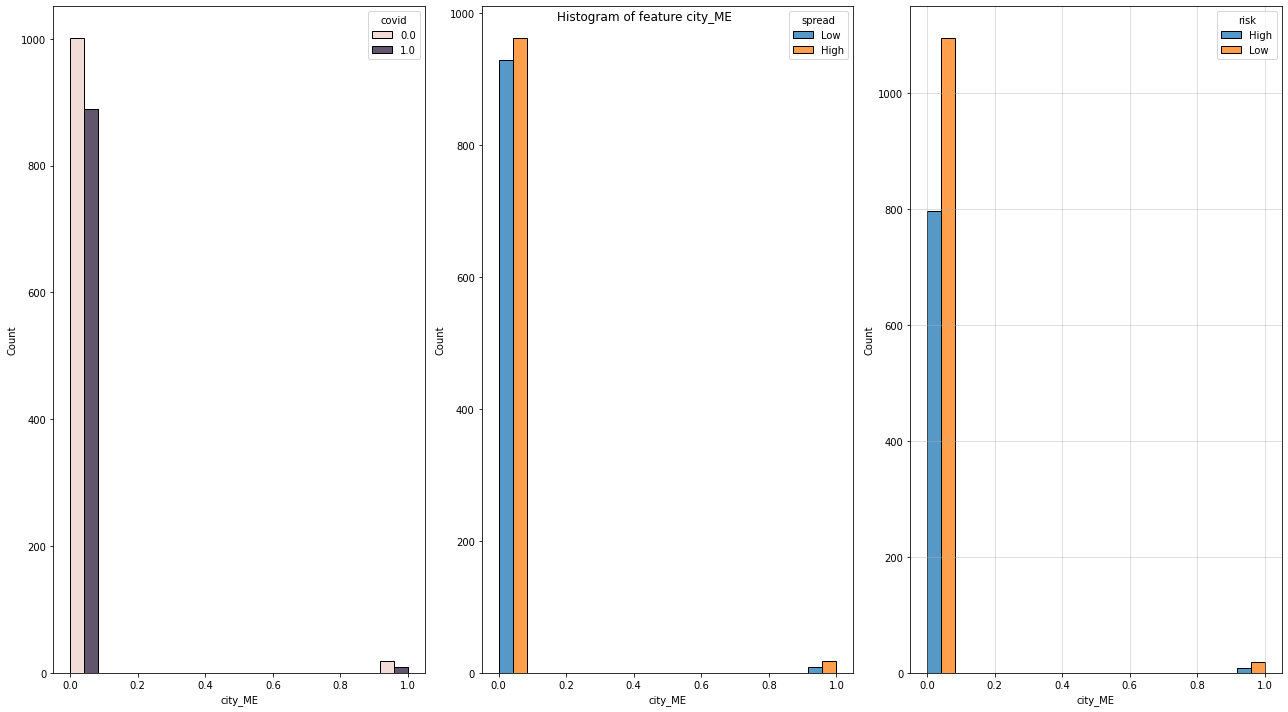

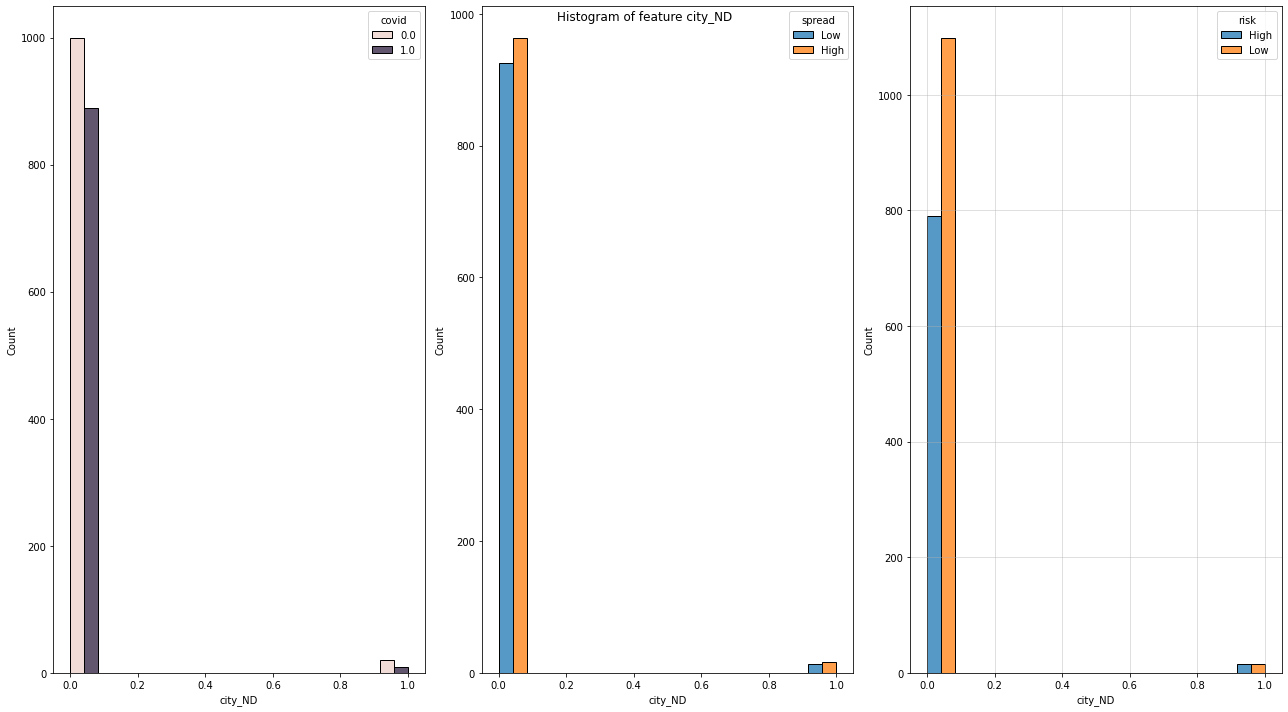

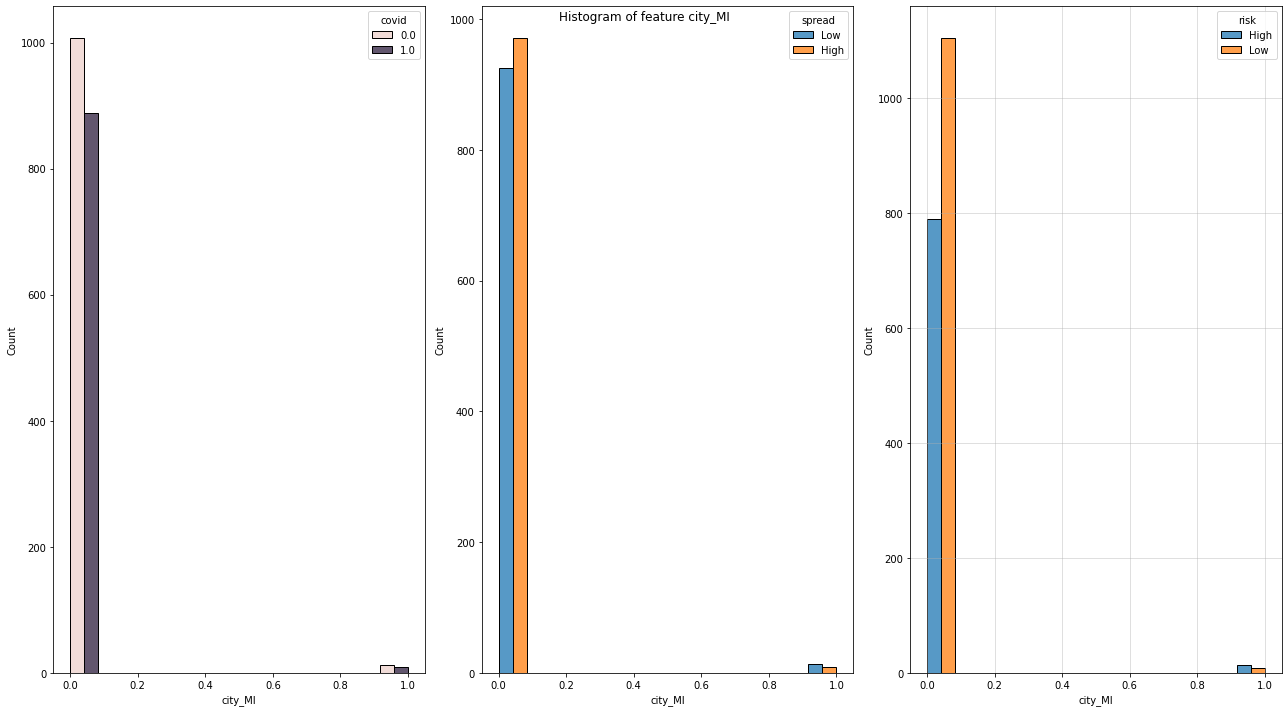

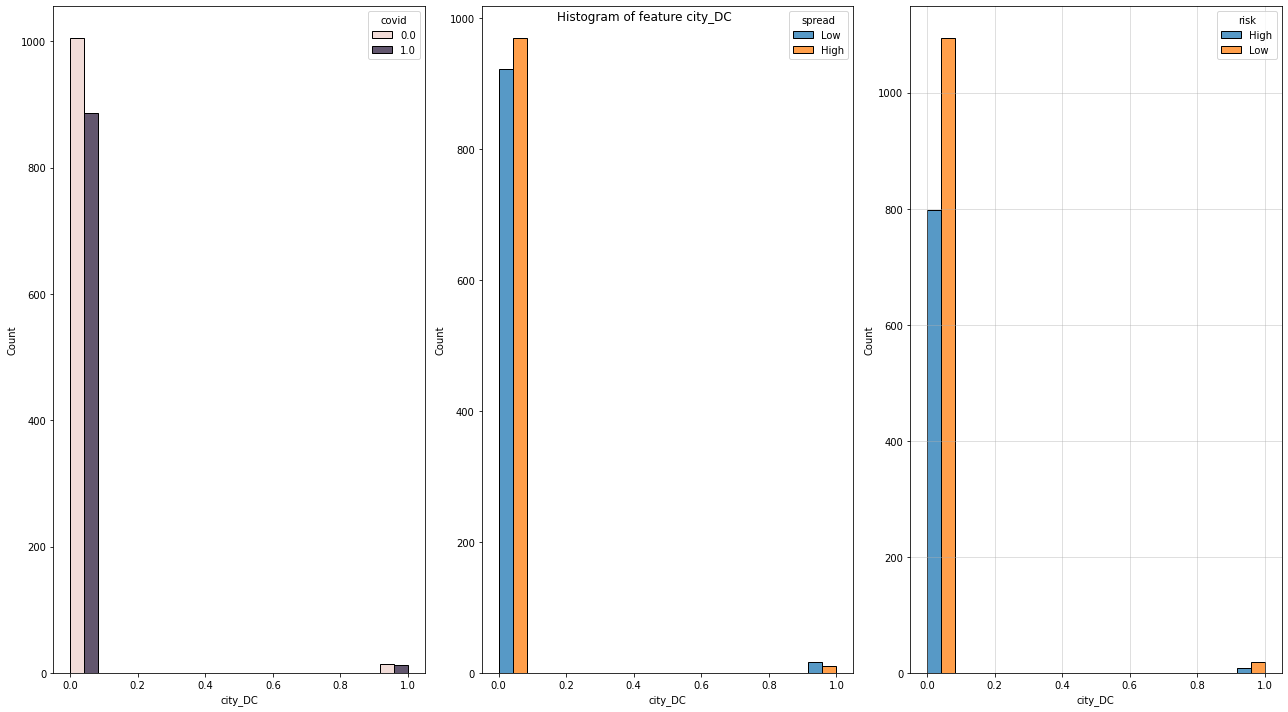

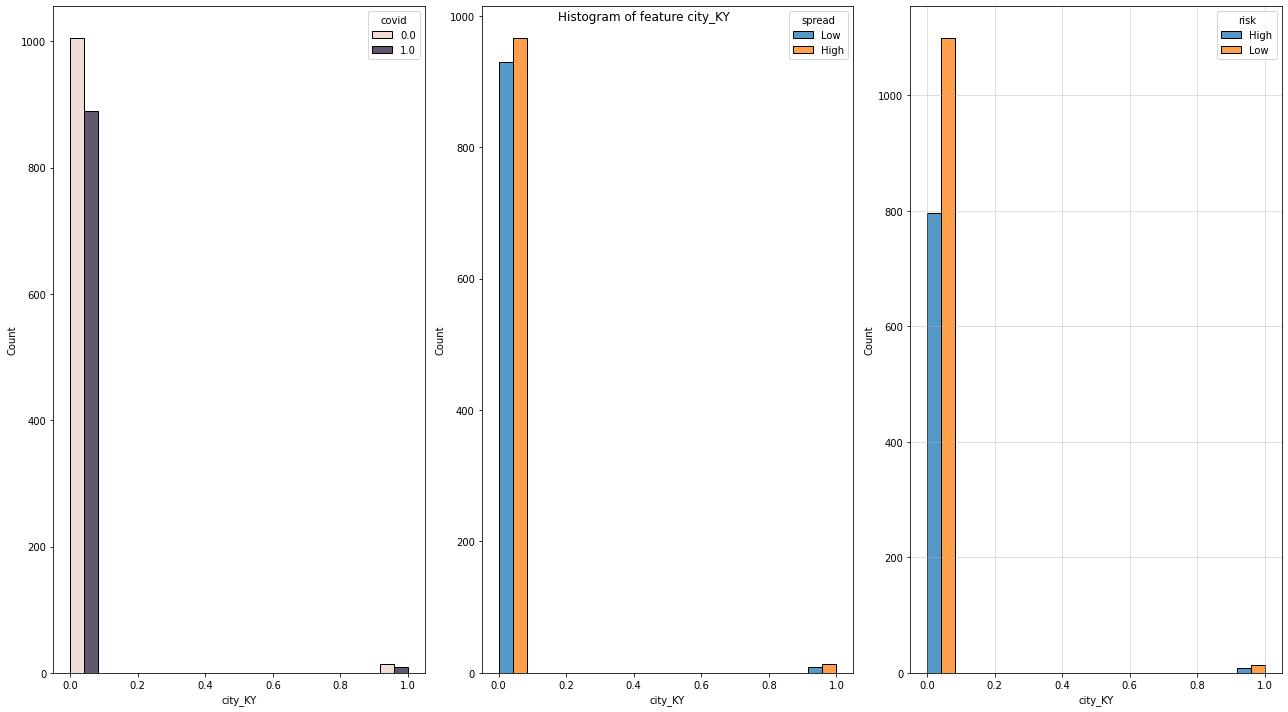

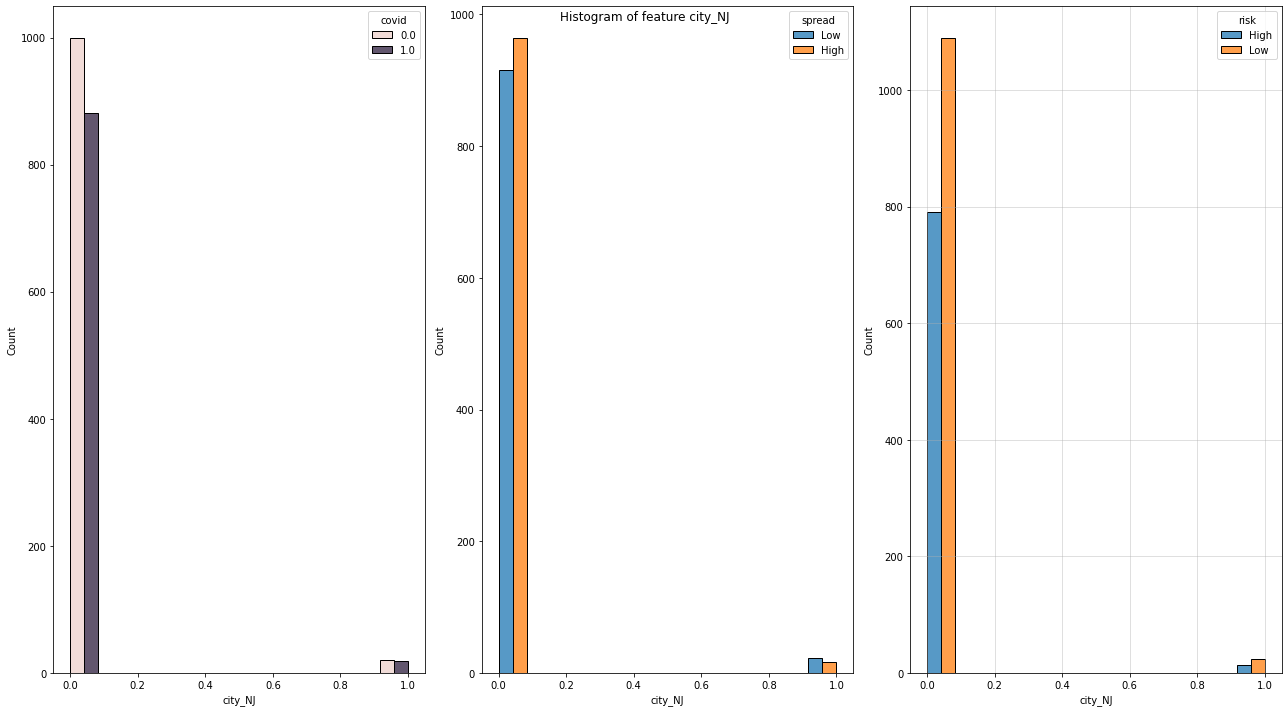

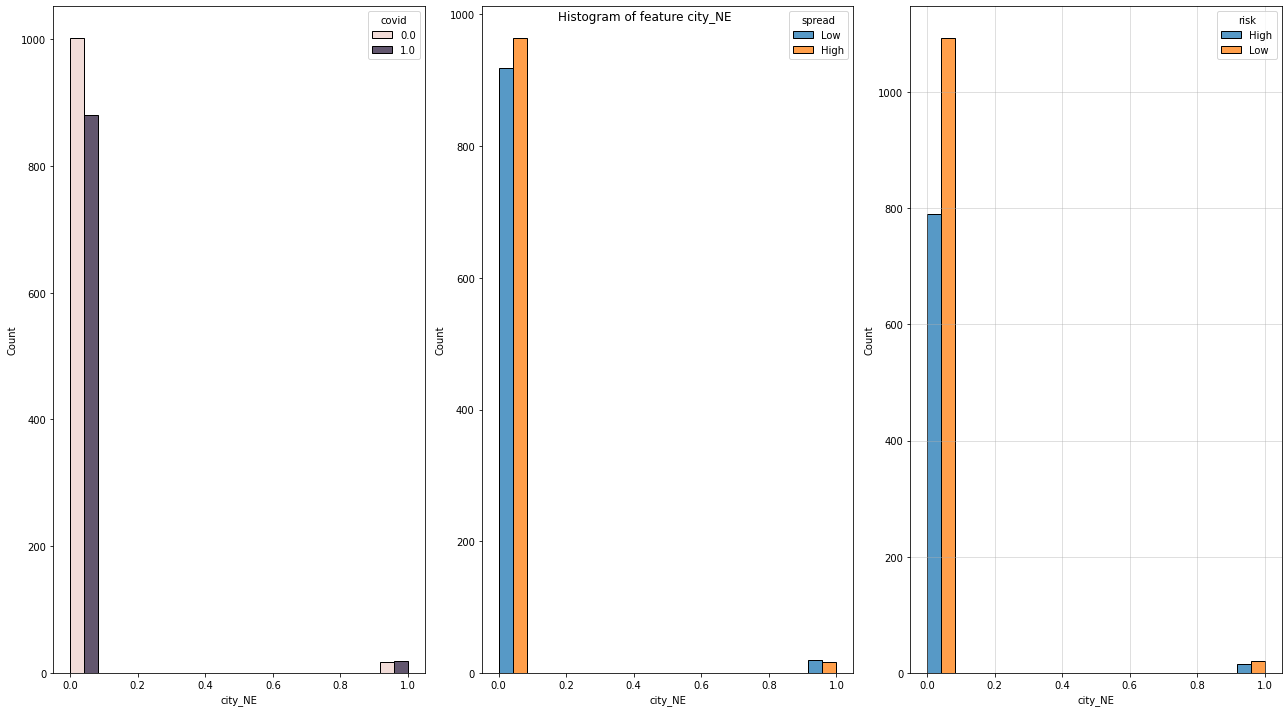

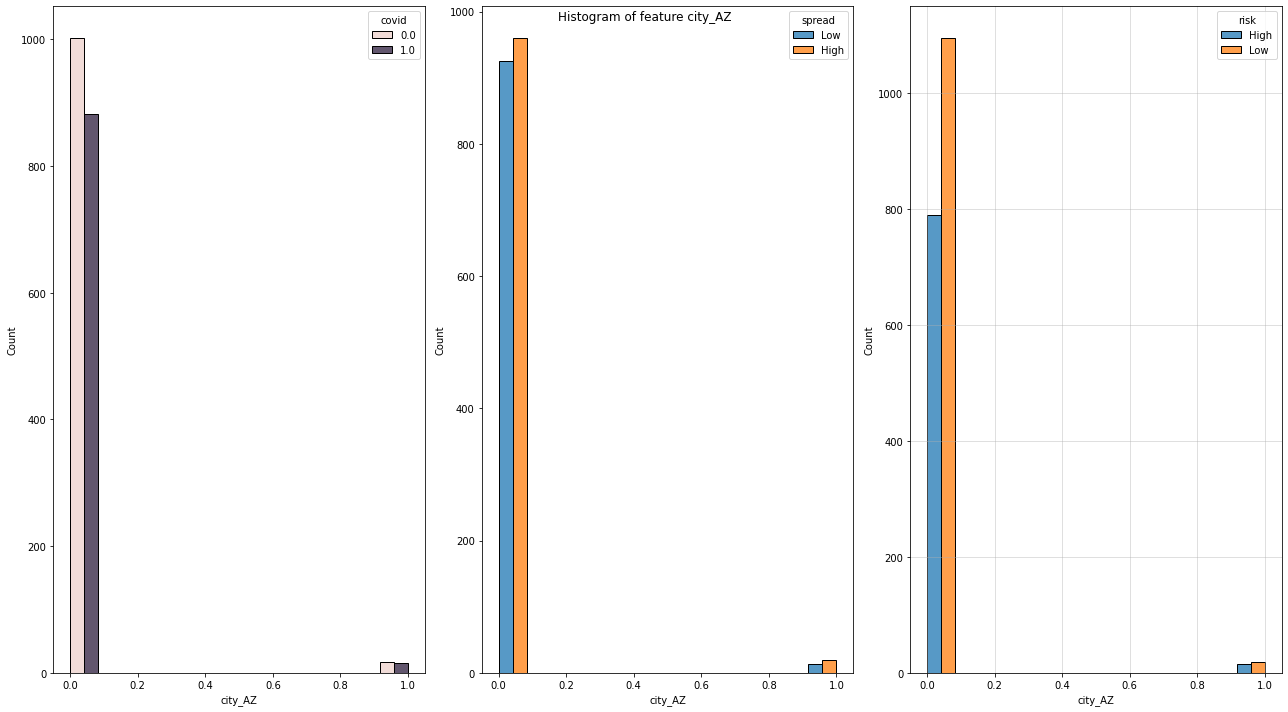

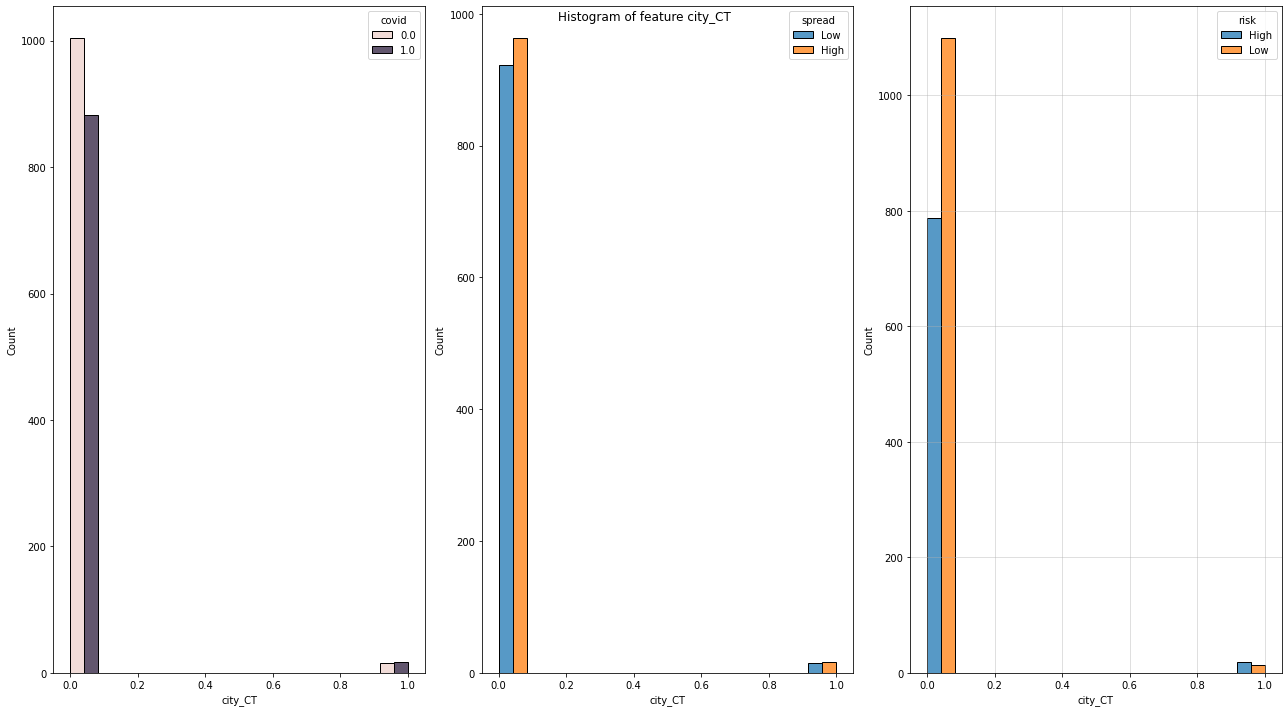

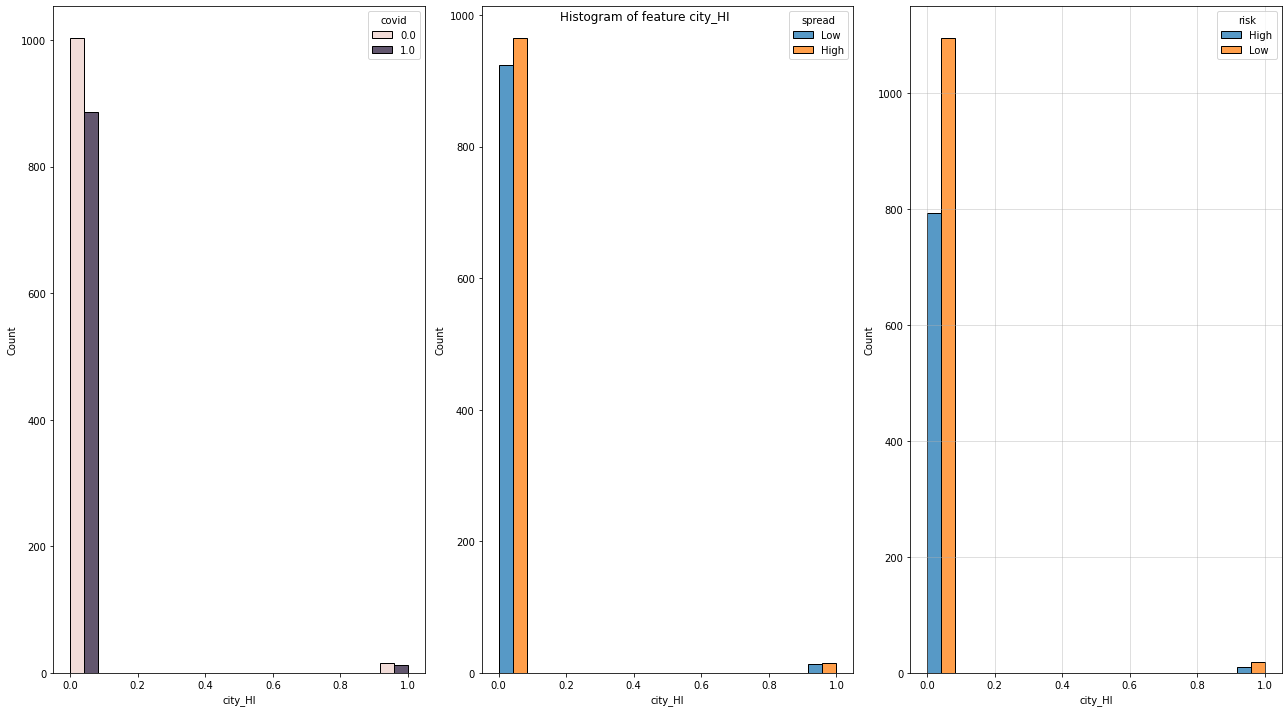

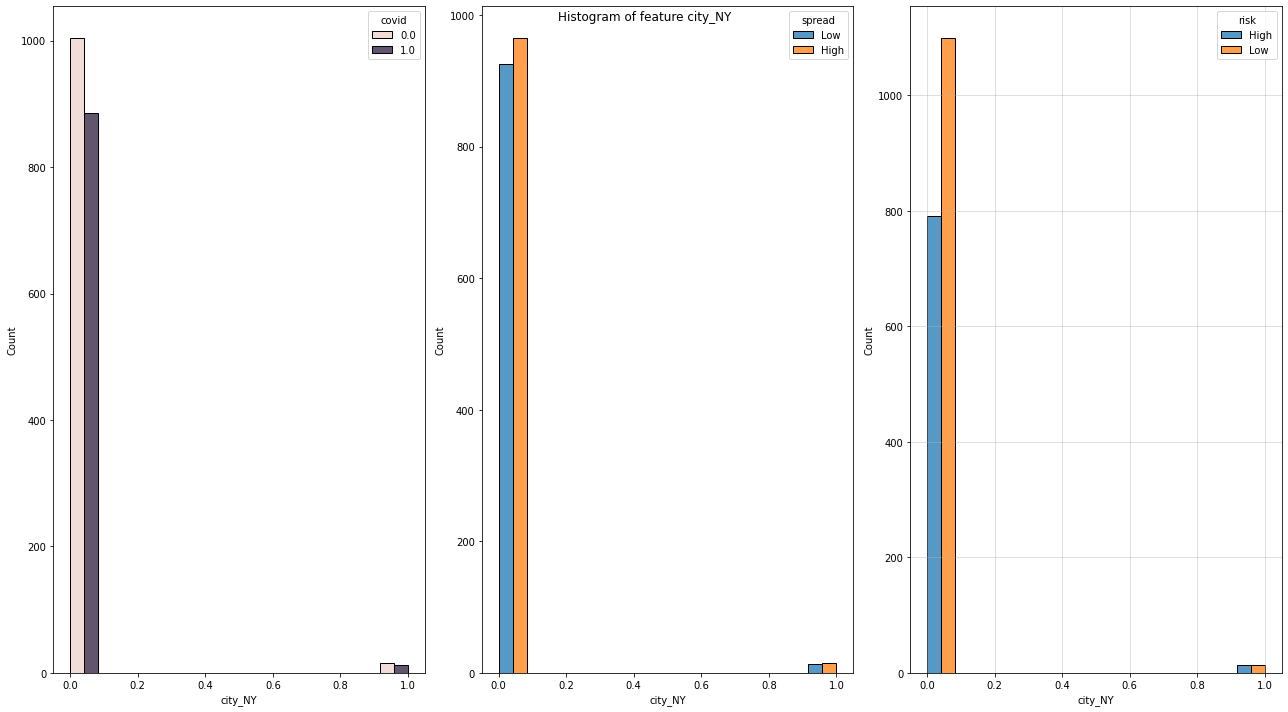

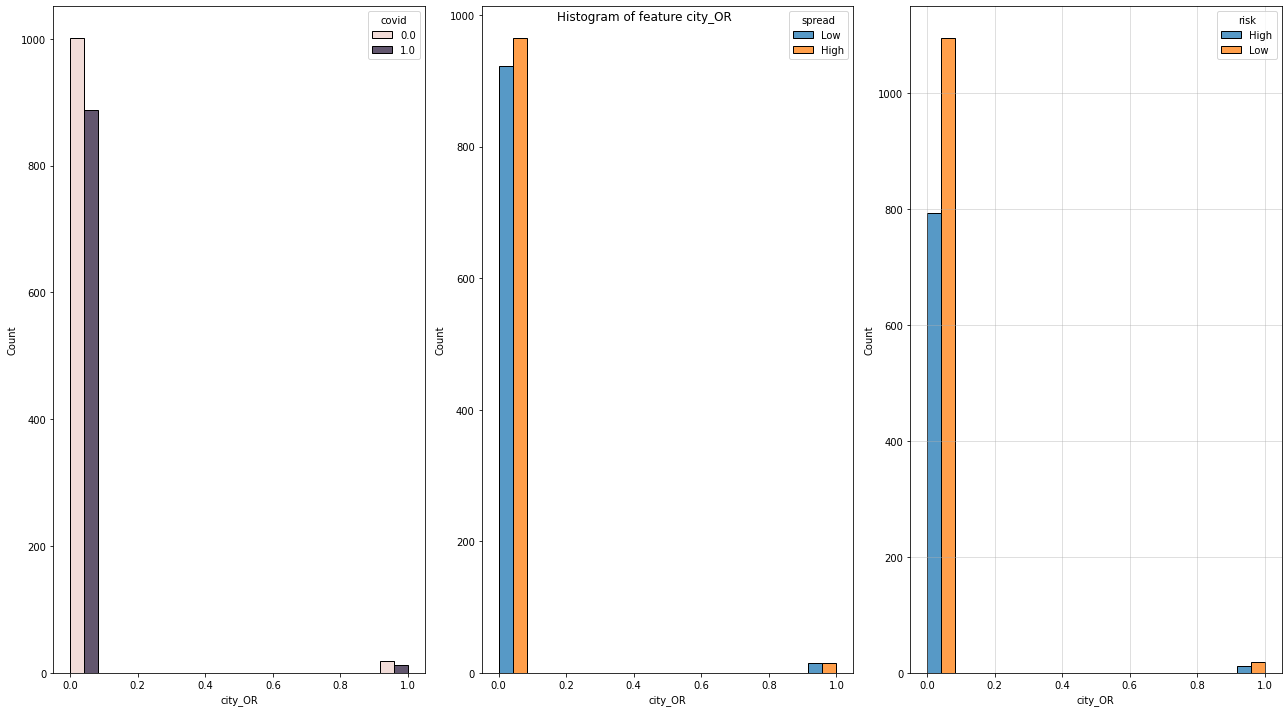

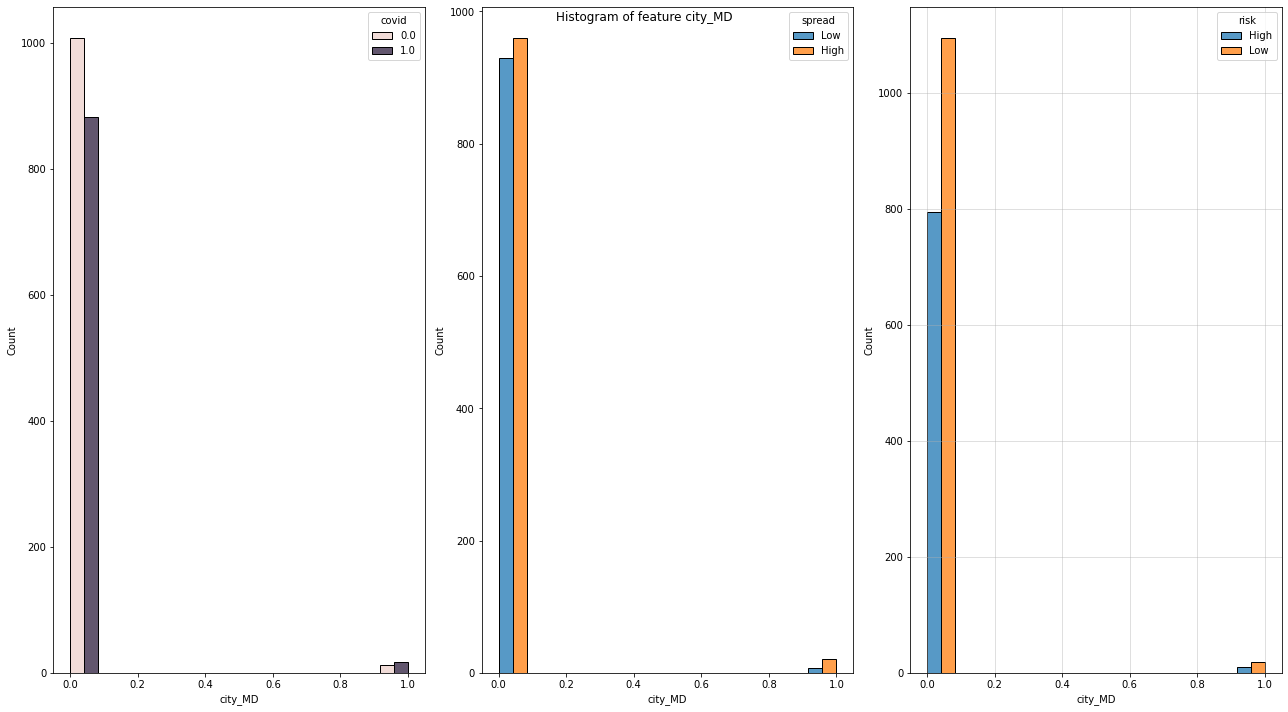

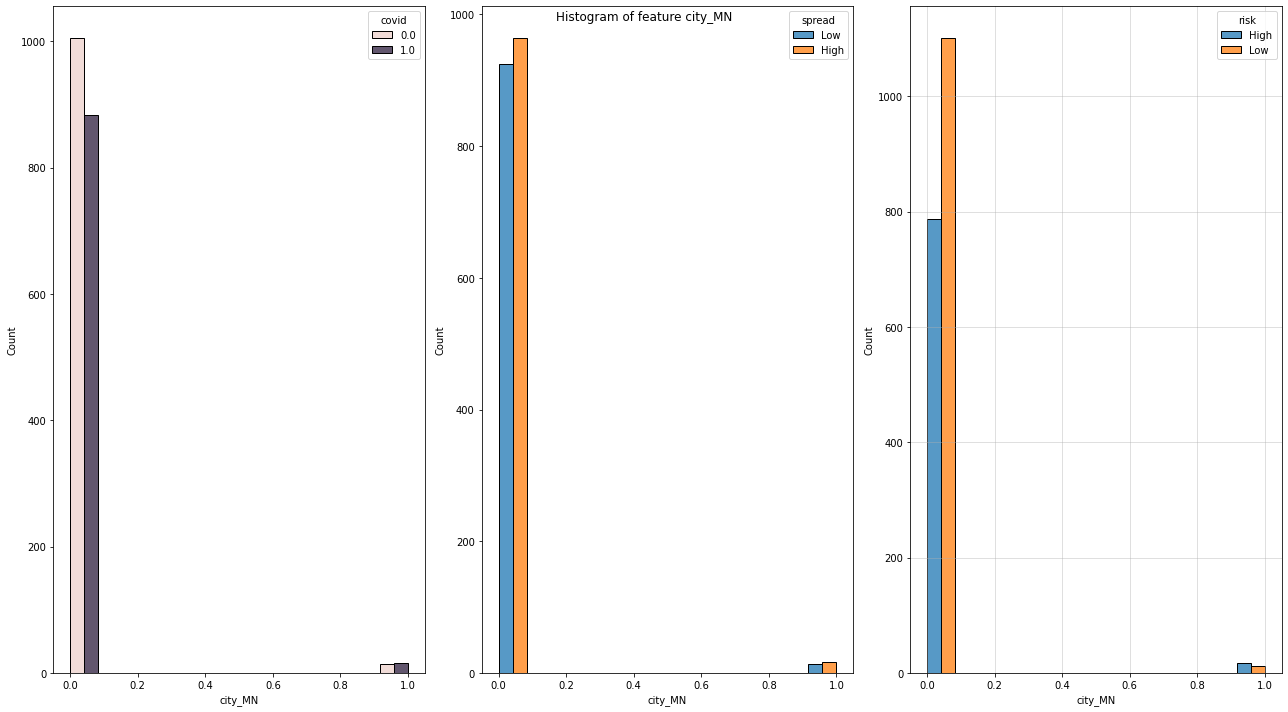

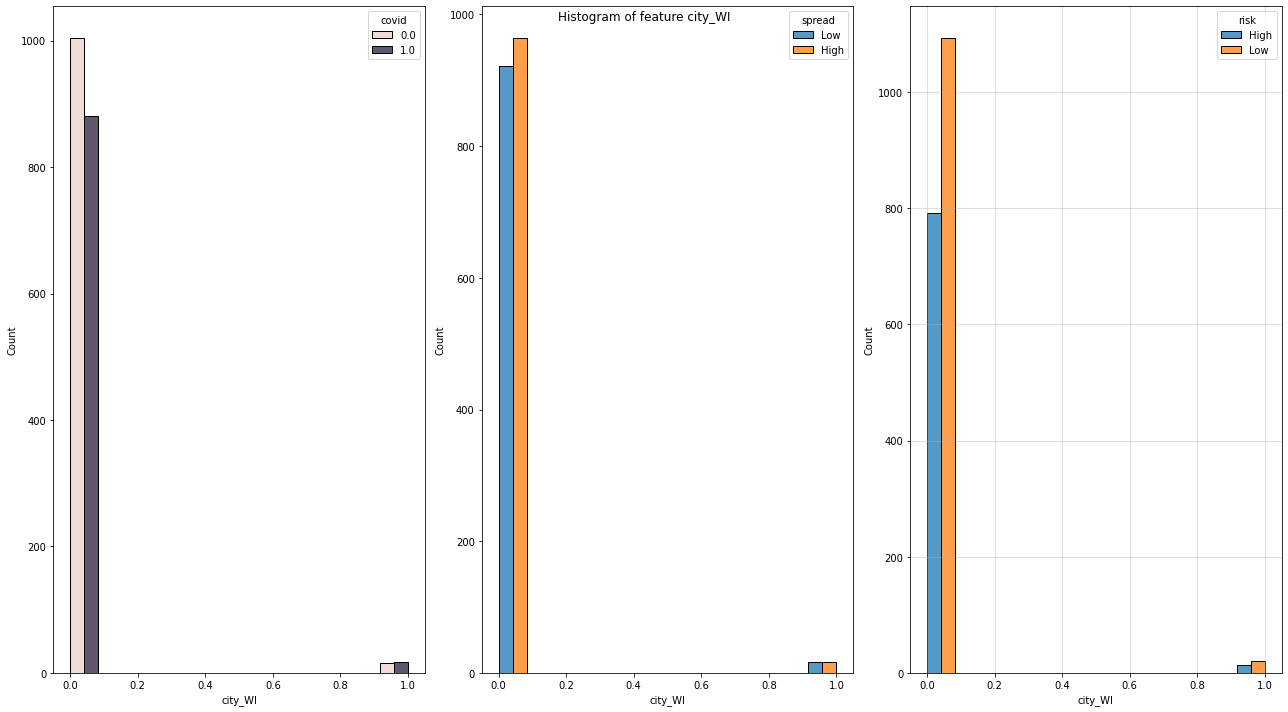

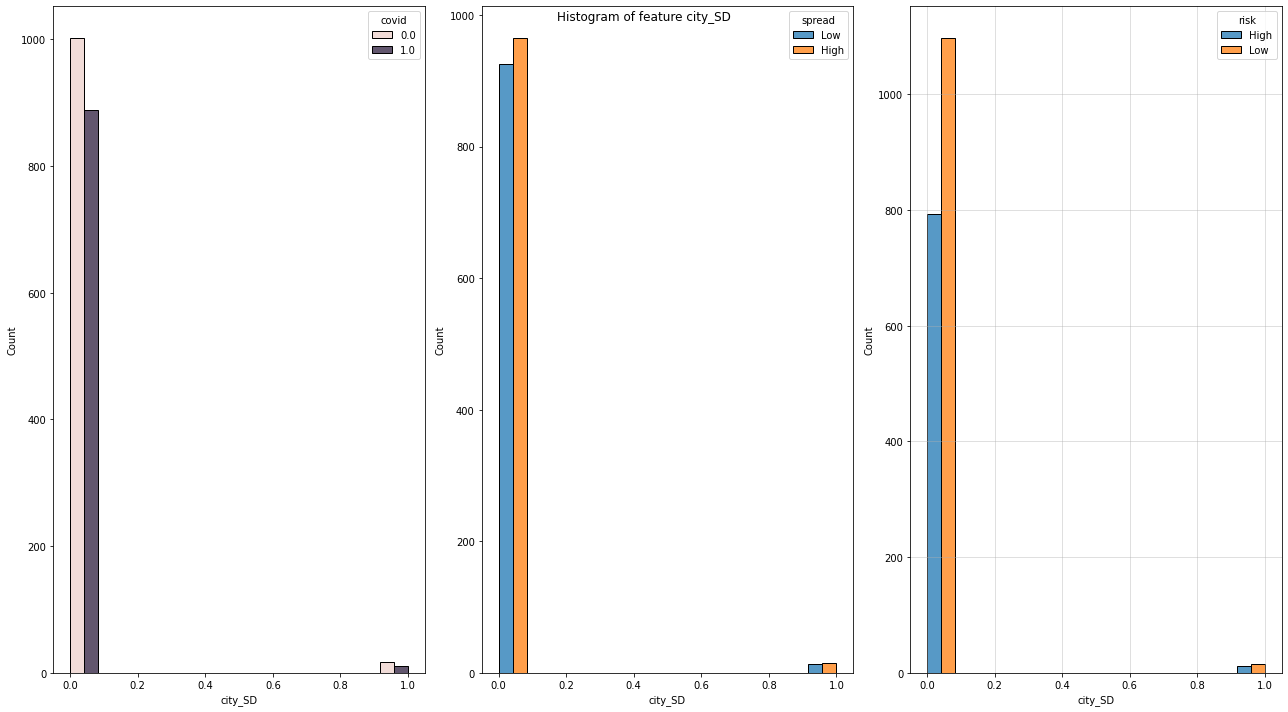

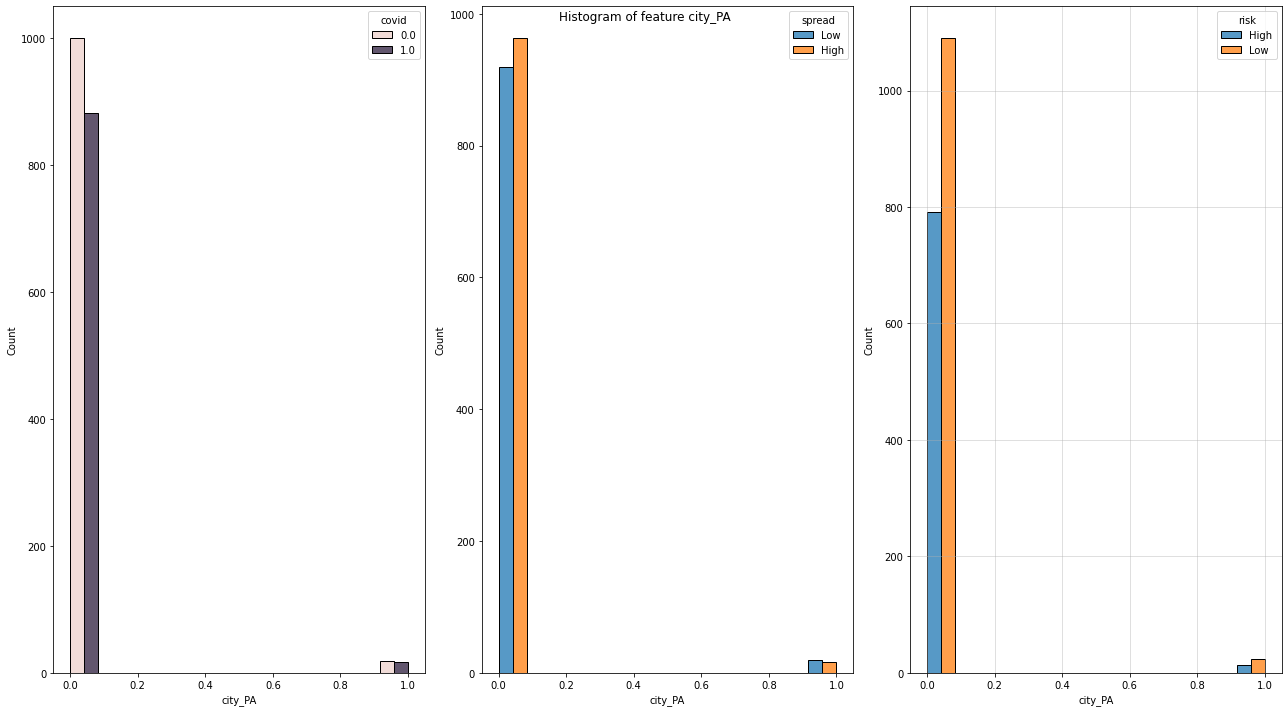

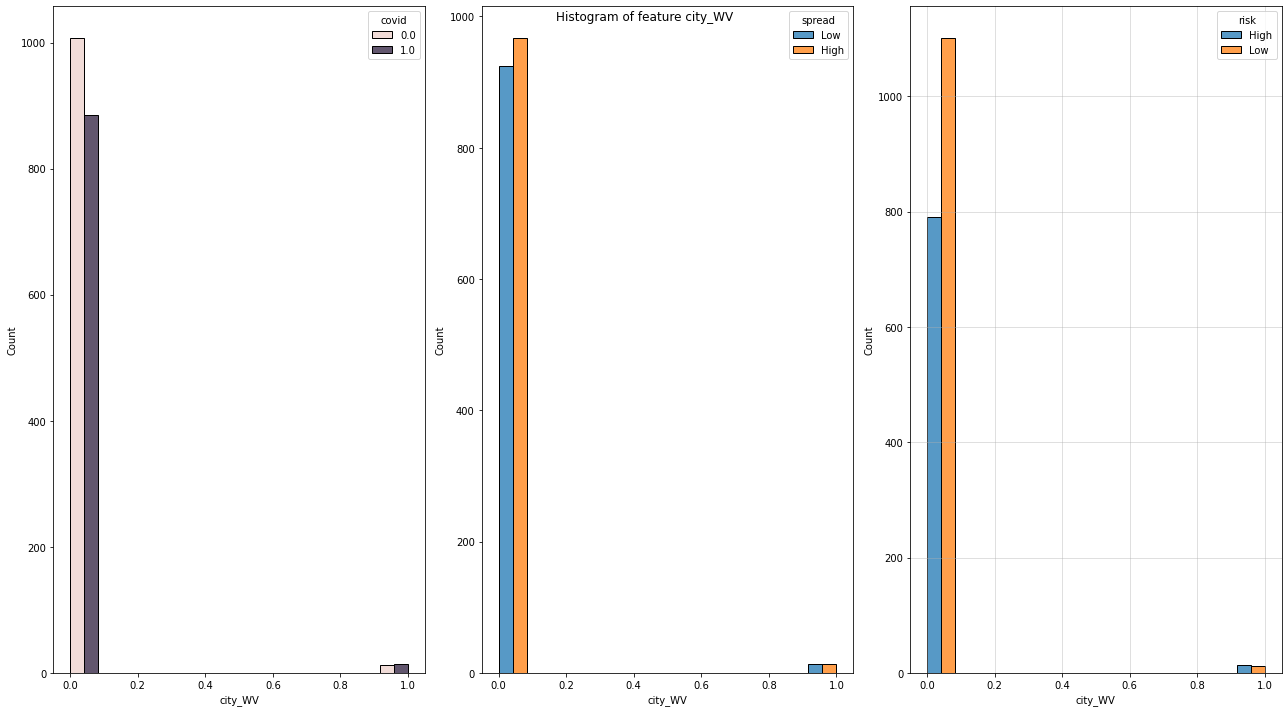

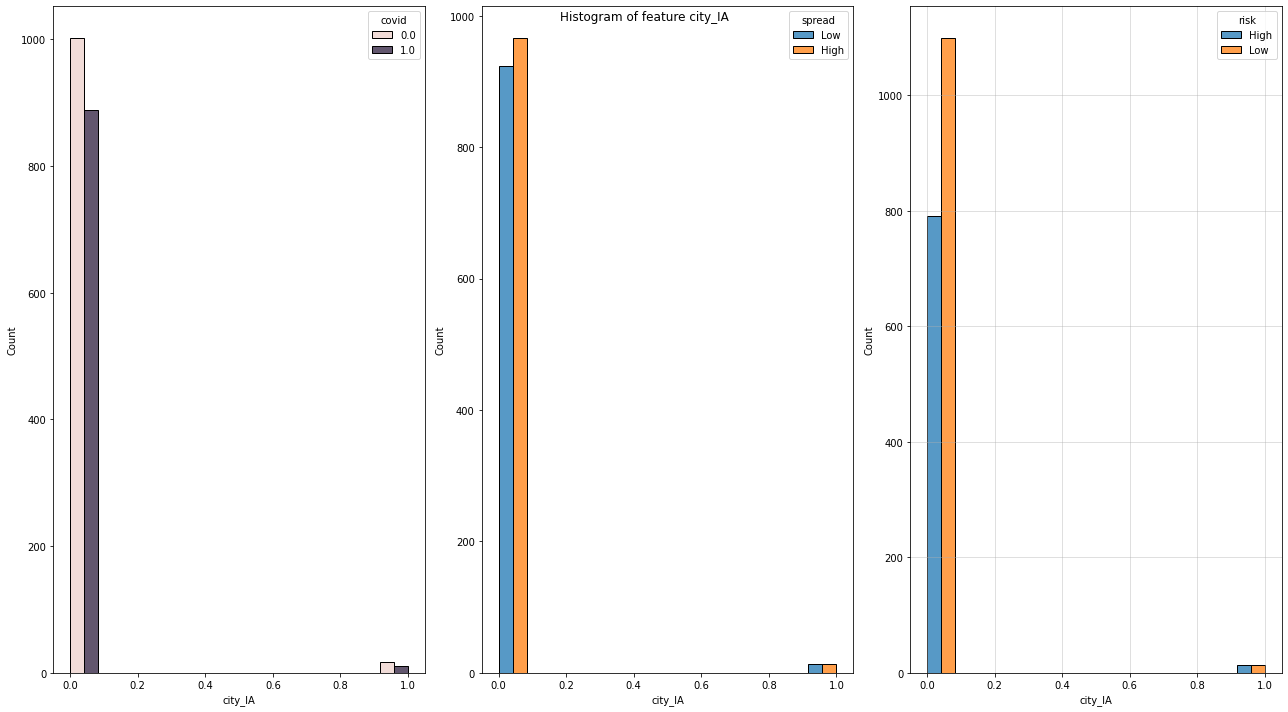

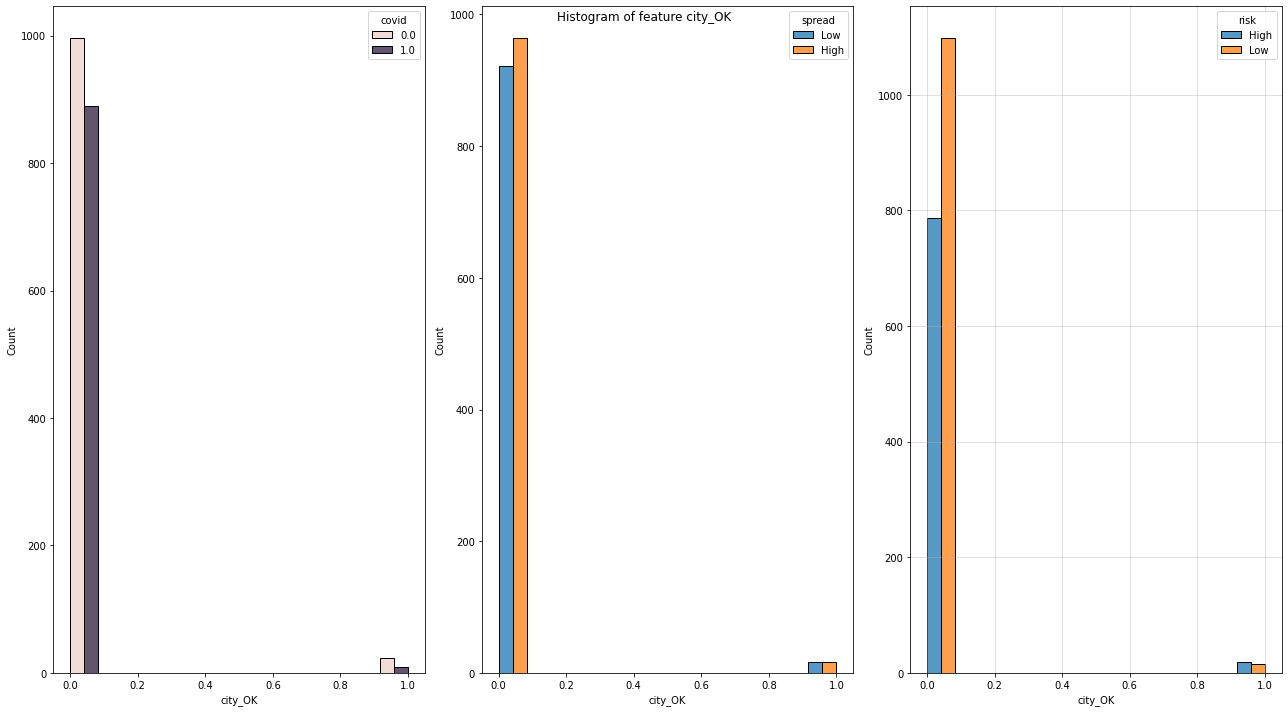

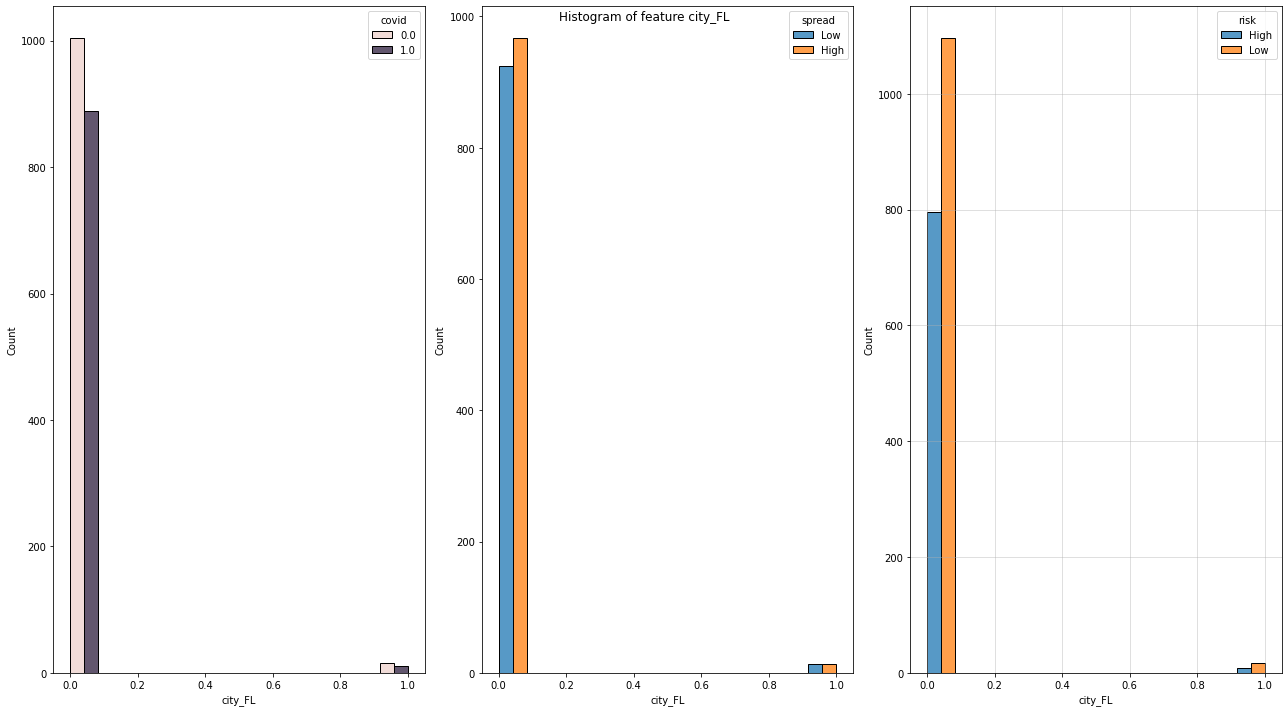

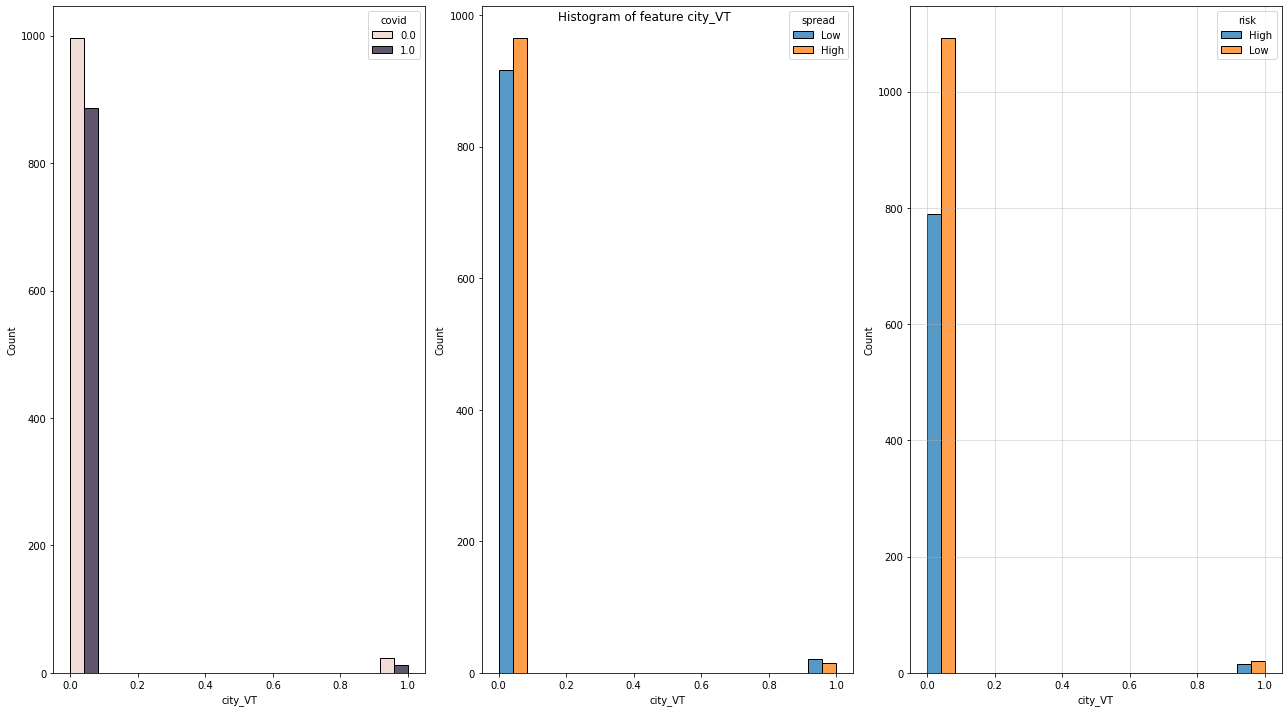

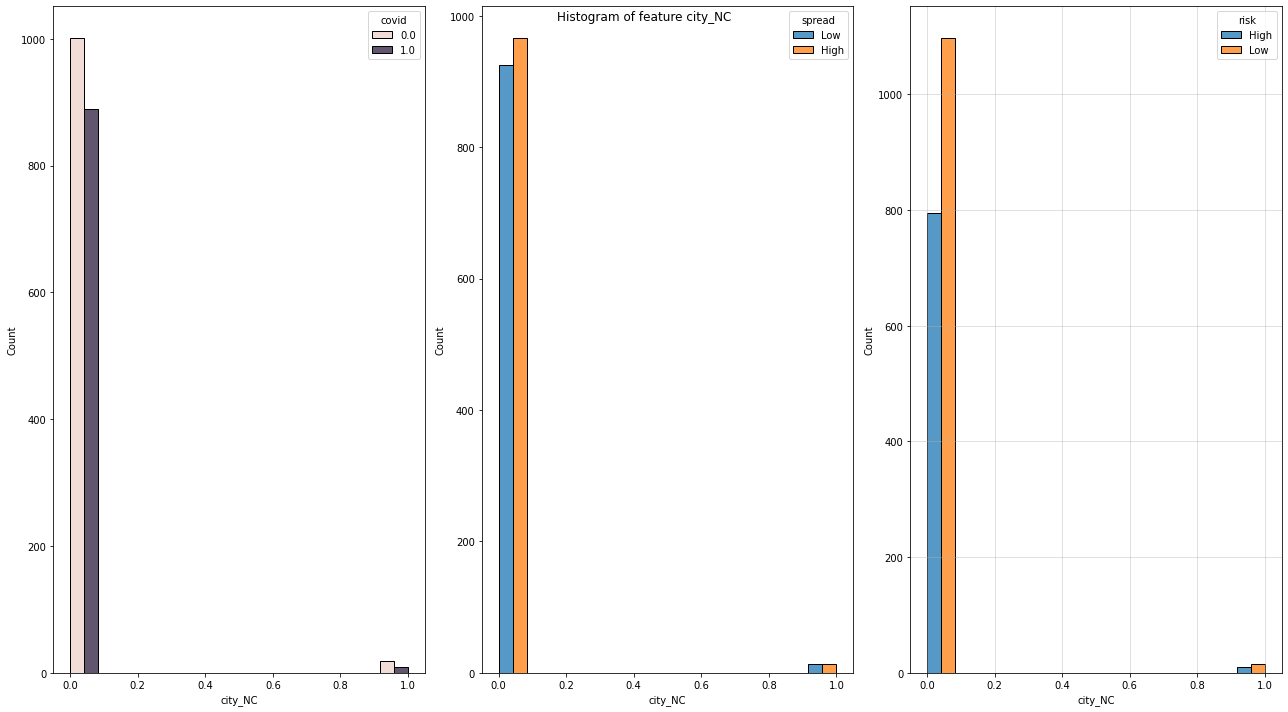

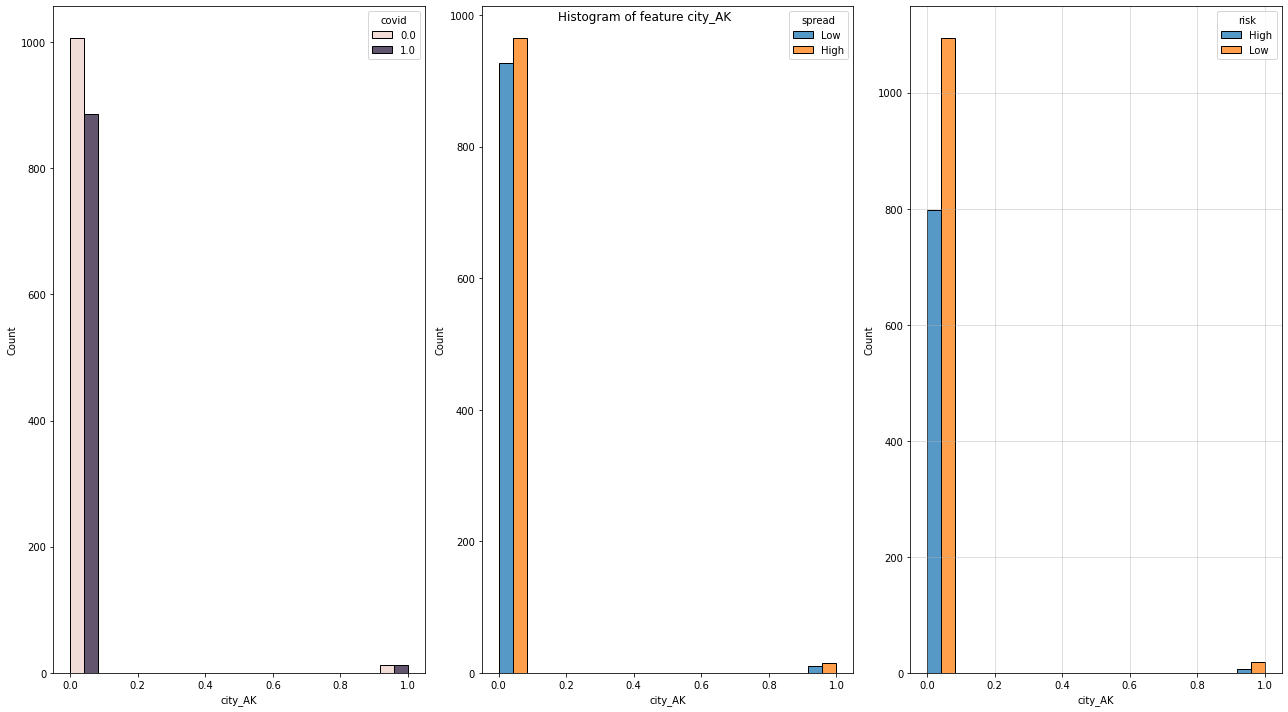

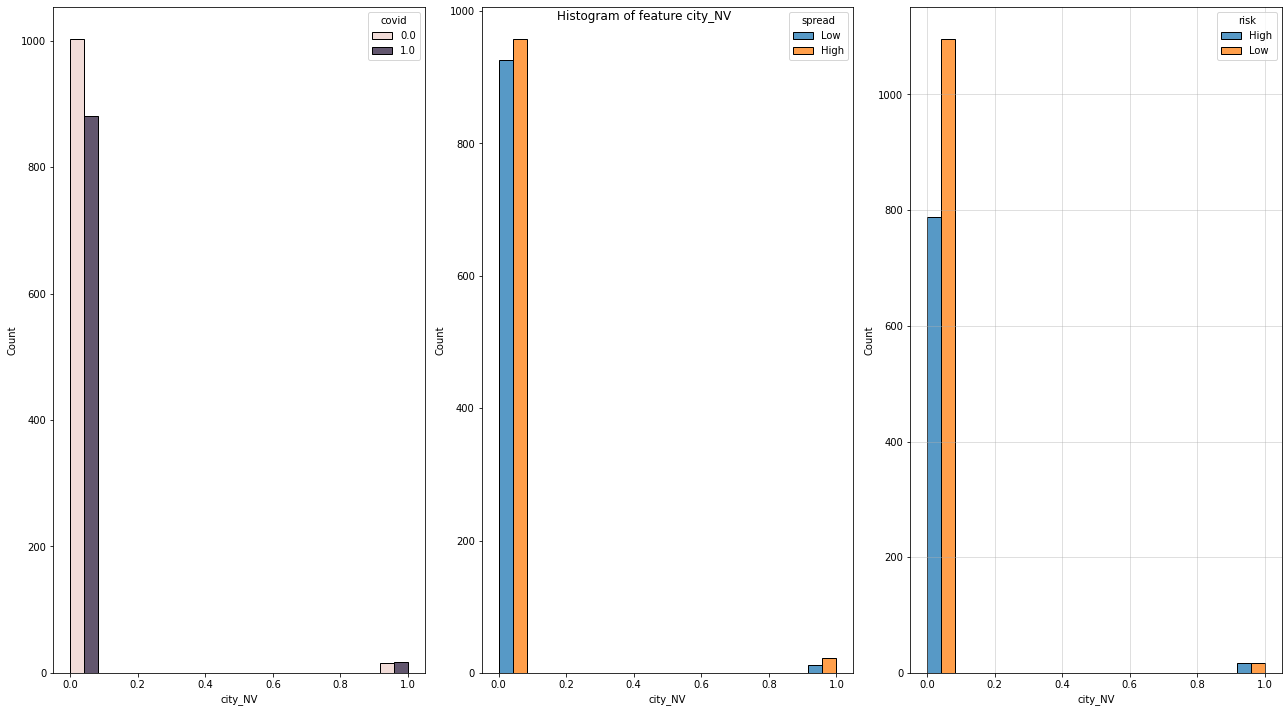

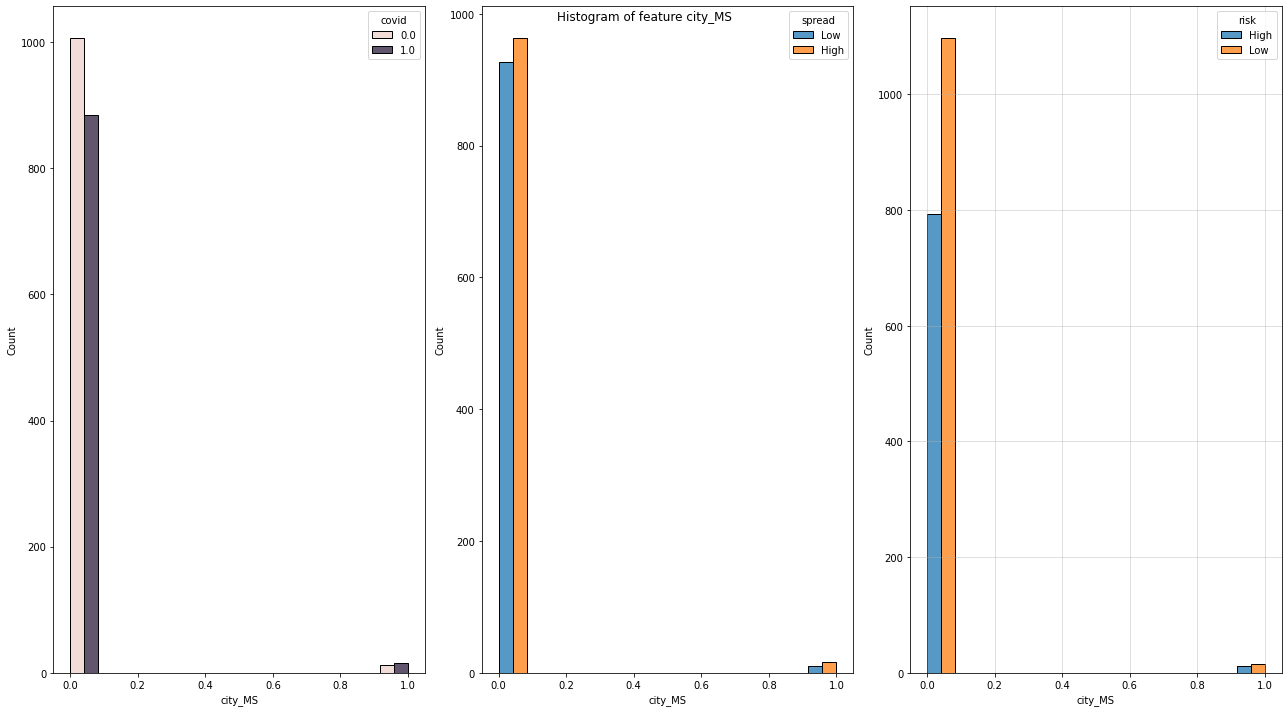

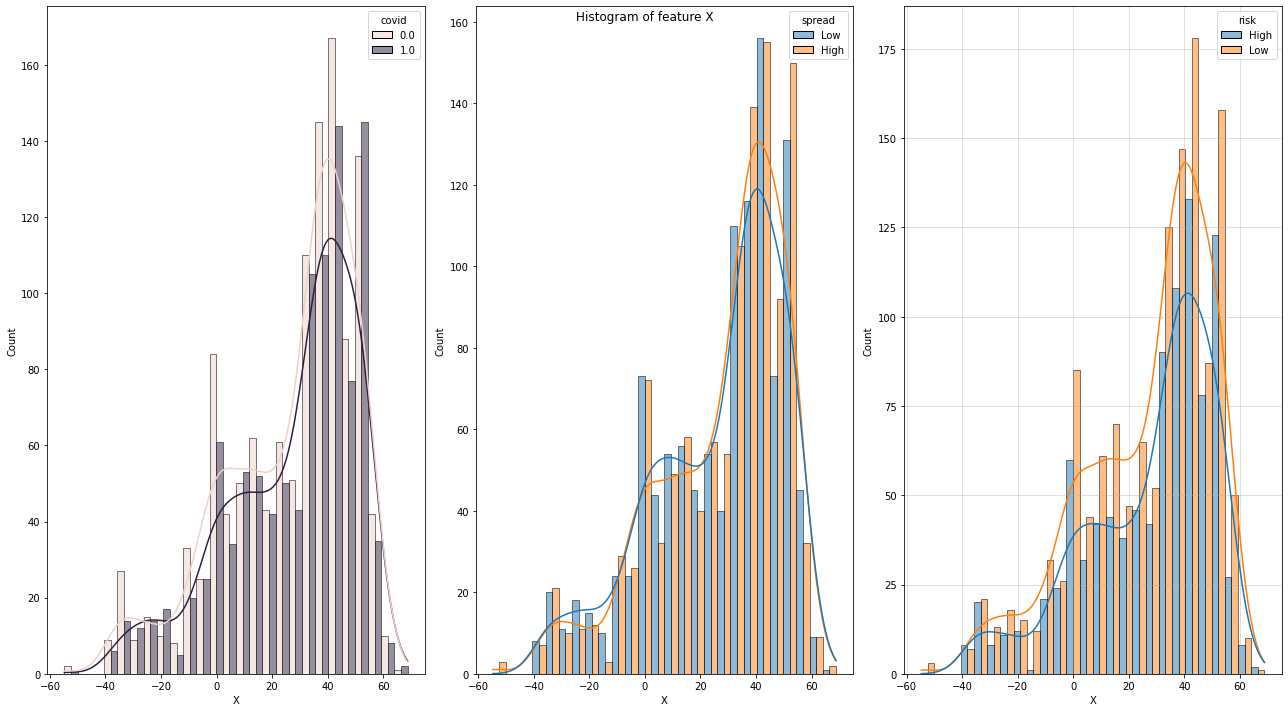

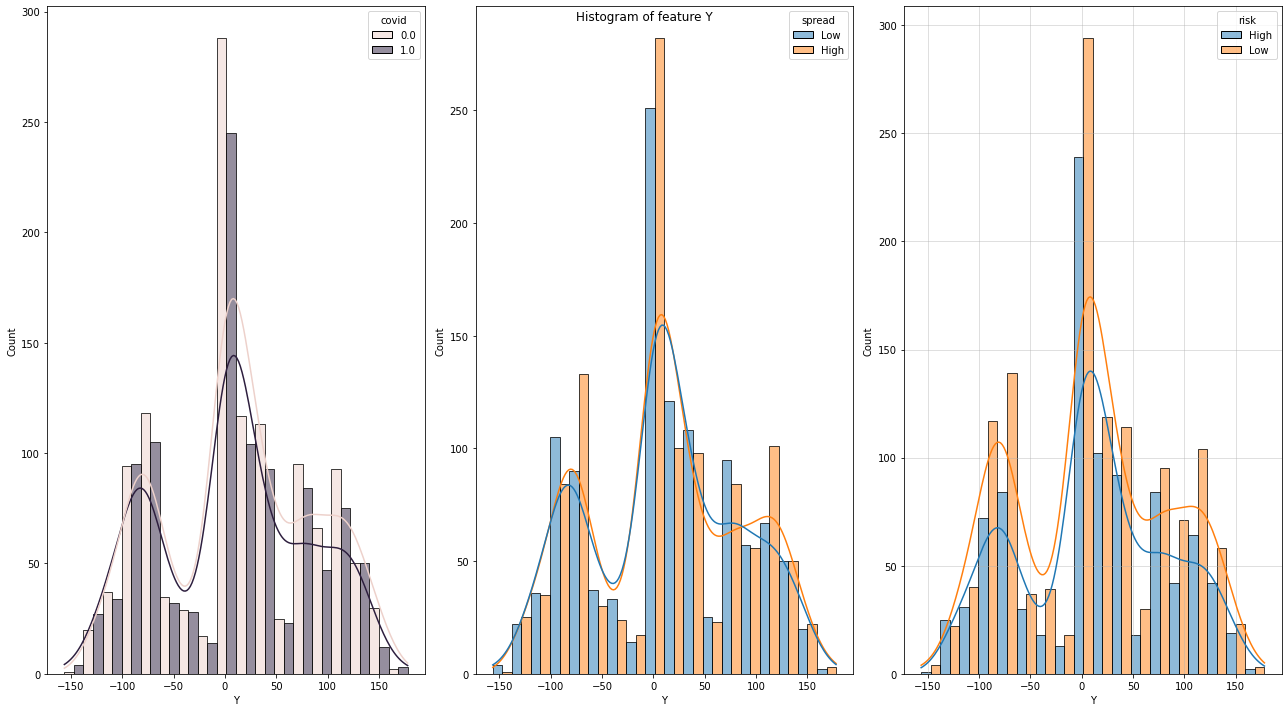

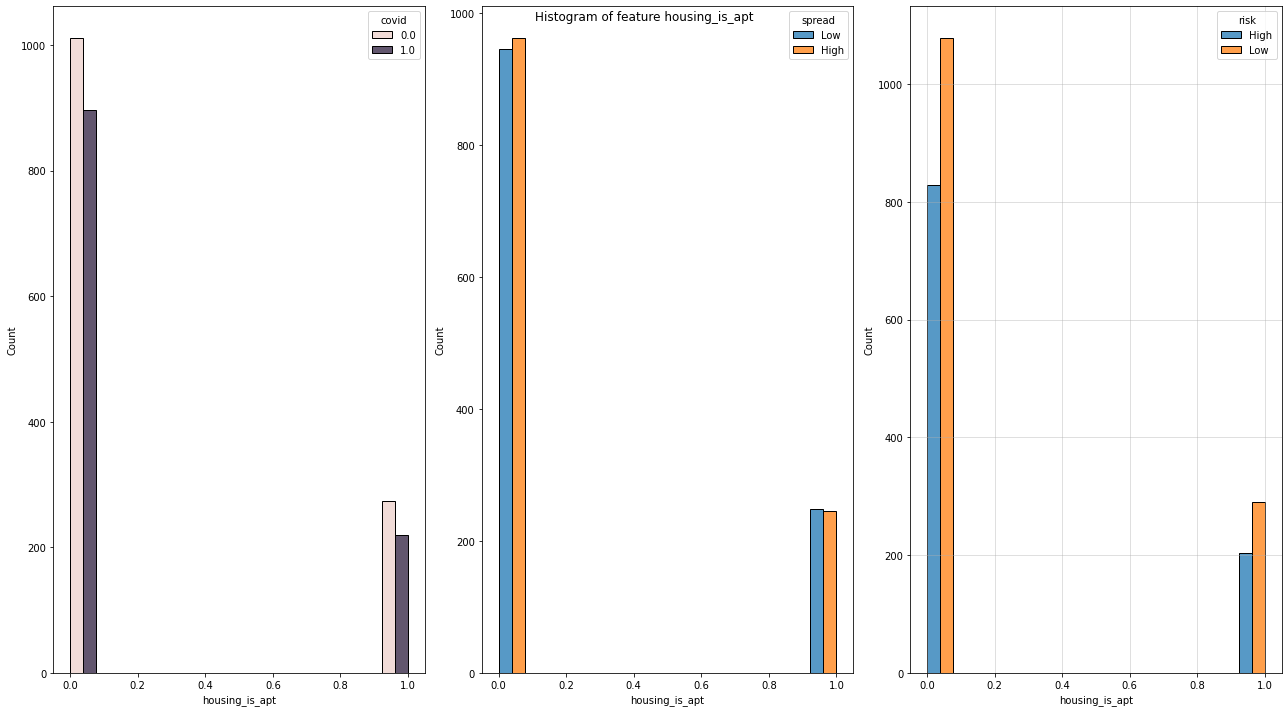

In [ ]:
# part of Q8, Q9:  plot new features 
for i, column in enumerate(COL_NAME, 1):
     if column in dont_plot:
        continue
     fig, axes = plt.subplots(1, 3, figsize=(18, 10))
     fig.suptitle('Histogram of feature ' + column)
     if column in continuous:
         sns.histplot(ax=axes[0], data=data, x=column, hue=data[TARGET_NAME[0]], kde=True, multiple="dodge")
         sns.histplot(ax=axes[1], data=data, x=column, hue=data[TARGET_NAME[1]], kde=True, multiple="dodge")
         sns.histplot(ax=axes[2], data=data, x=column, hue=data[TARGET_NAME[2]], kde=True, multiple="dodge")
     else:
        sns.histplot(ax=axes[0], data=data, x=column, hue=data[TARGET_NAME[0]], multiple="dodge")
        sns.histplot(ax=axes[1], data=data, x=column, hue=data[TARGET_NAME[1]], multiple="dodge")
        sns.histplot(ax=axes[2], data=data, x=column, hue=data[TARGET_NAME[2]], multiple="dodge")
     plt.grid(alpha=0.5)#     
     plt.tight_layout()
     plt.show()

Here we can bearly notice but there is one sample with happiness score eaquals minus one, which is a mistake in our opinion.

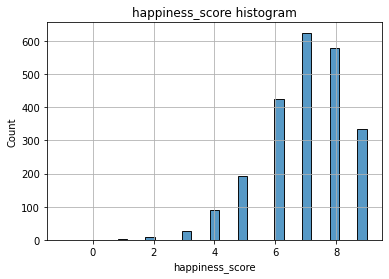

In [ ]:
# part of Q10:
sns.histplot(data=data, x='happiness_score')
plt.title("happiness_score histogram")
plt.grid()
plt.show()


Here we decided to plot a boxplot of every feature we found importent against the target features.

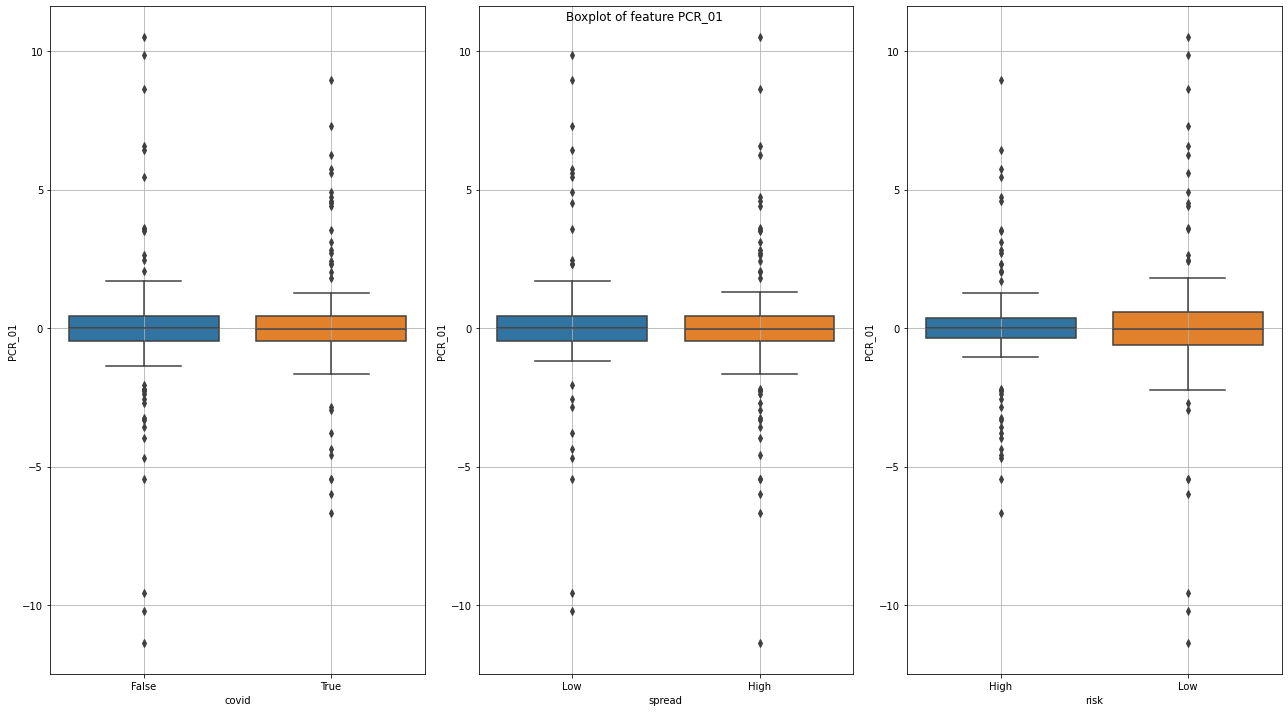

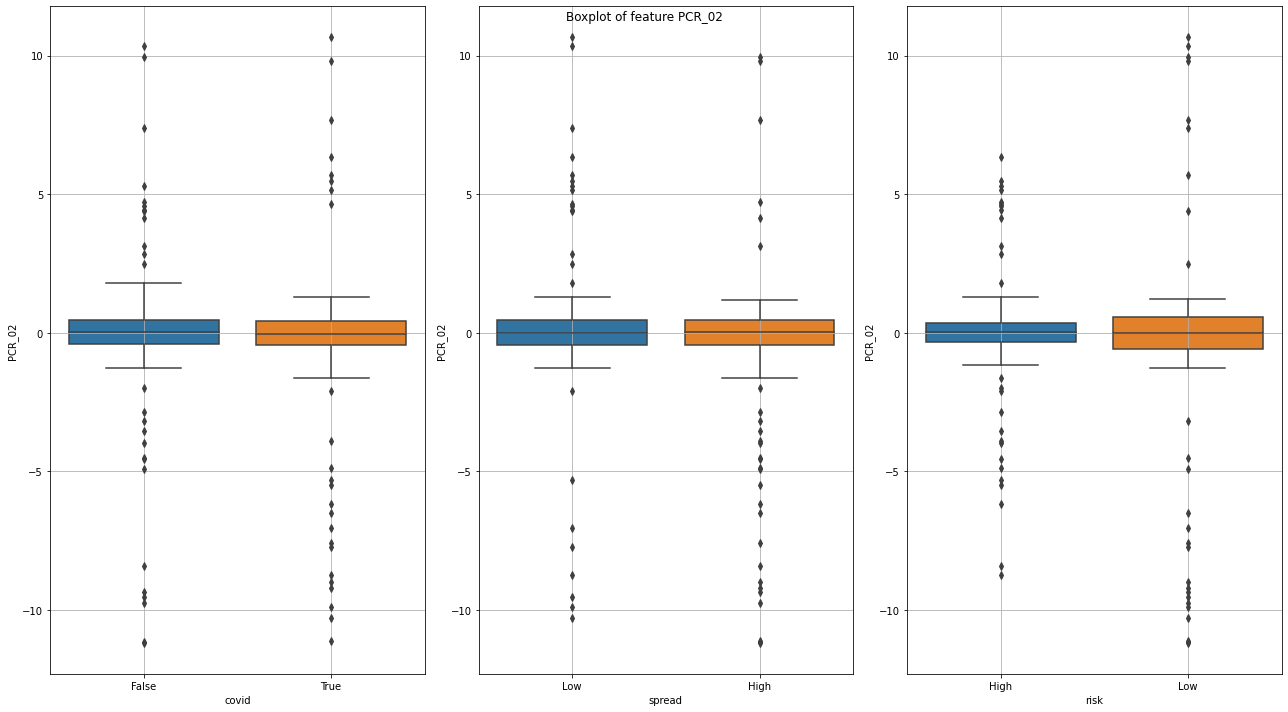

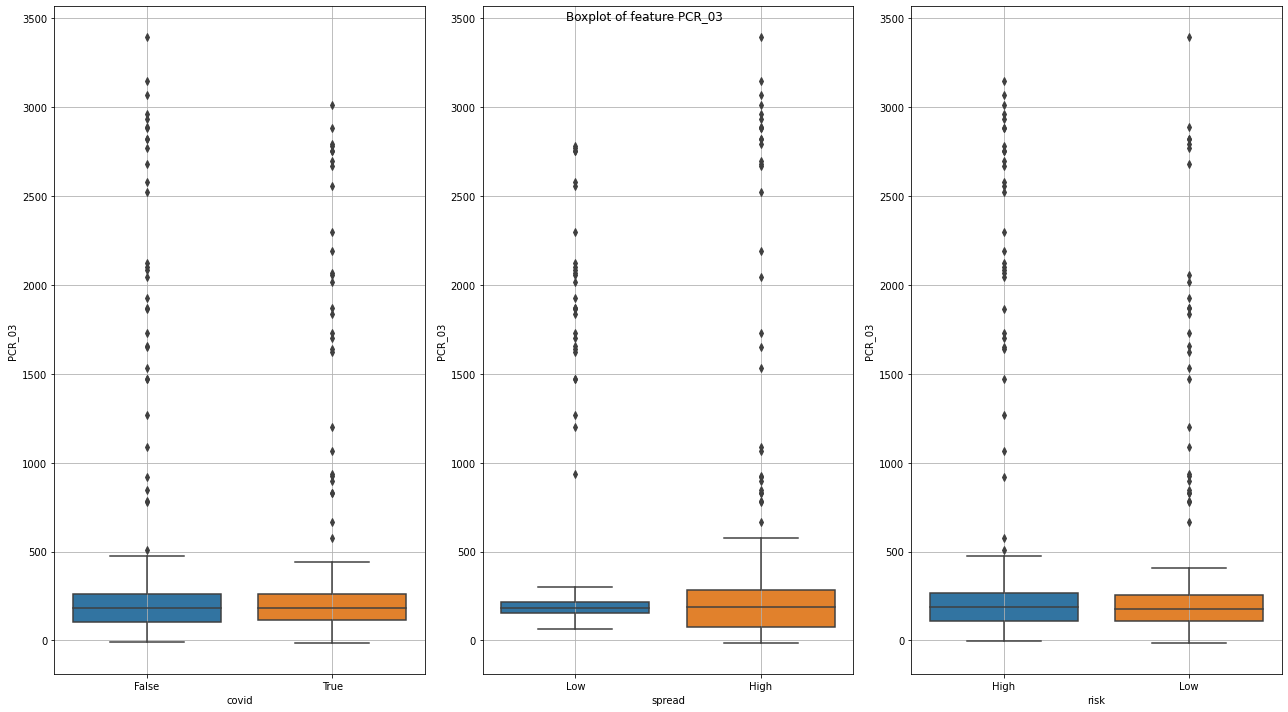

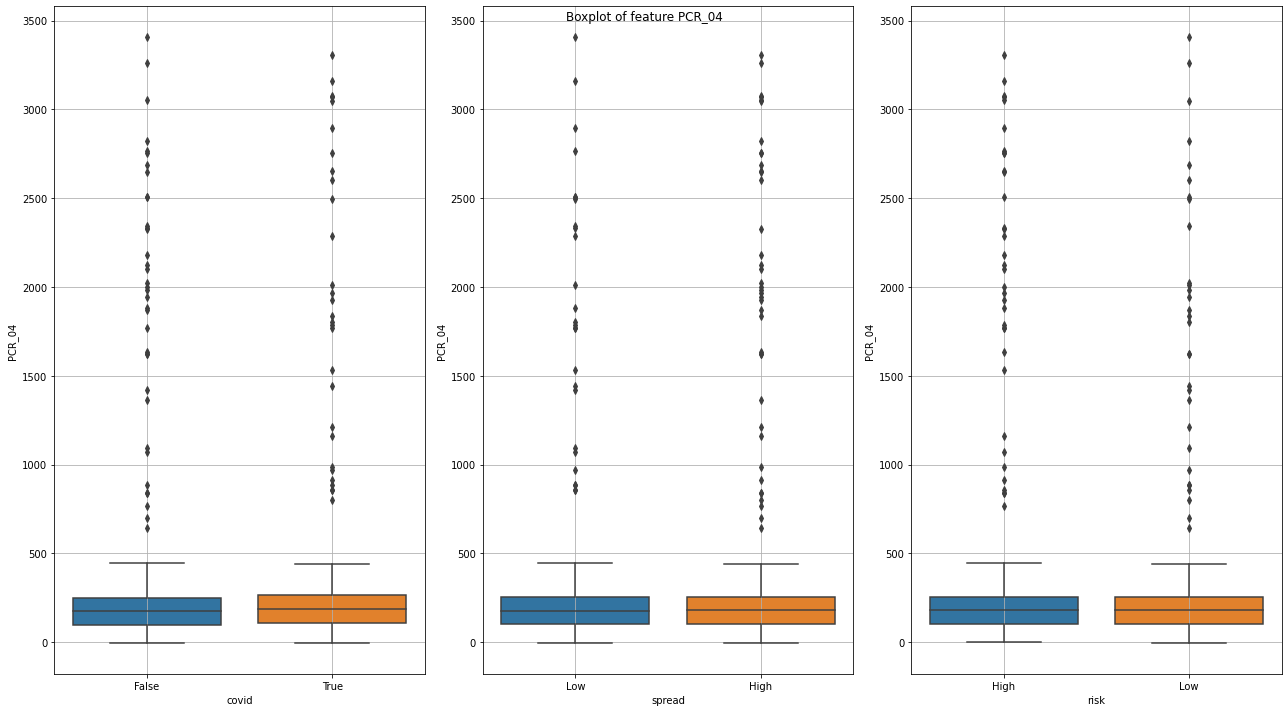

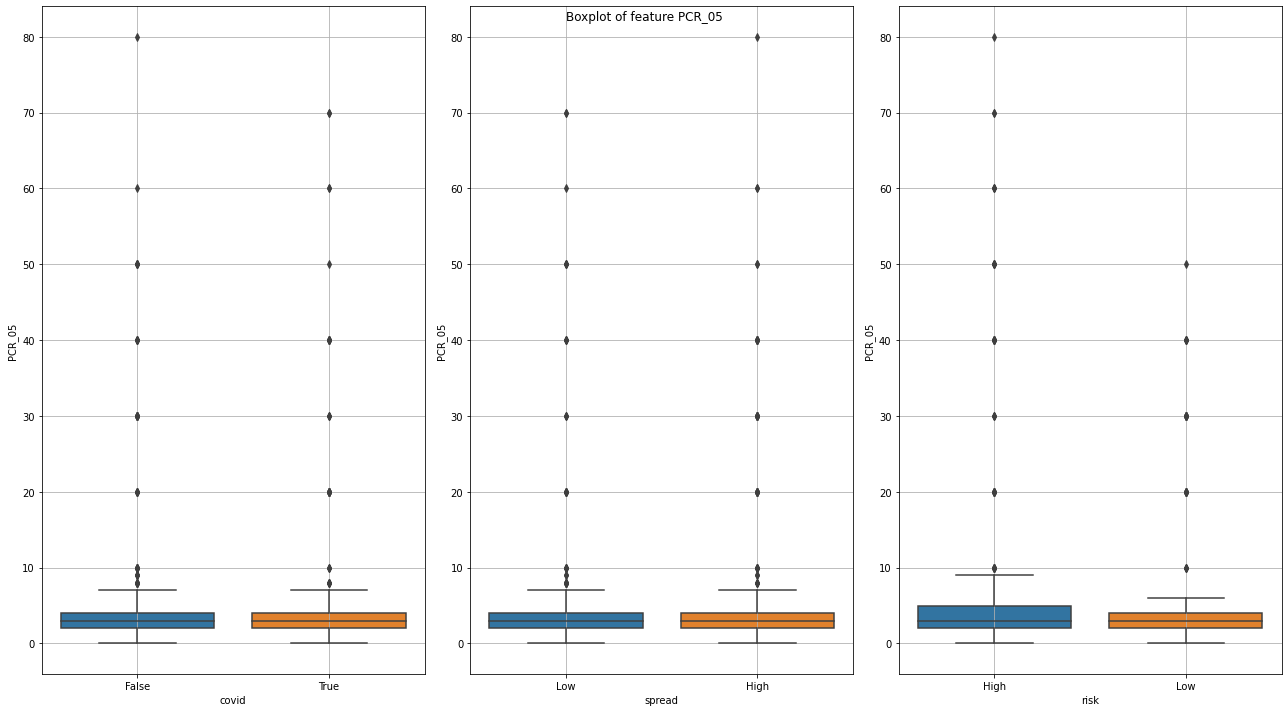

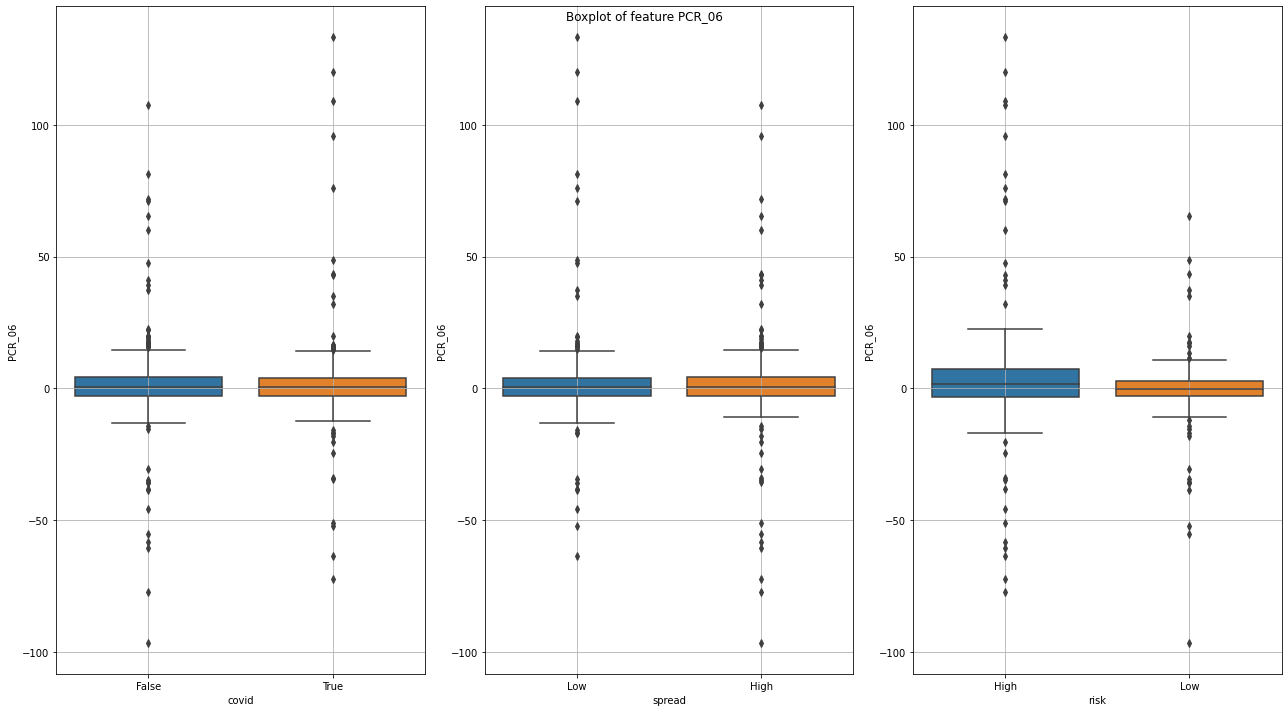

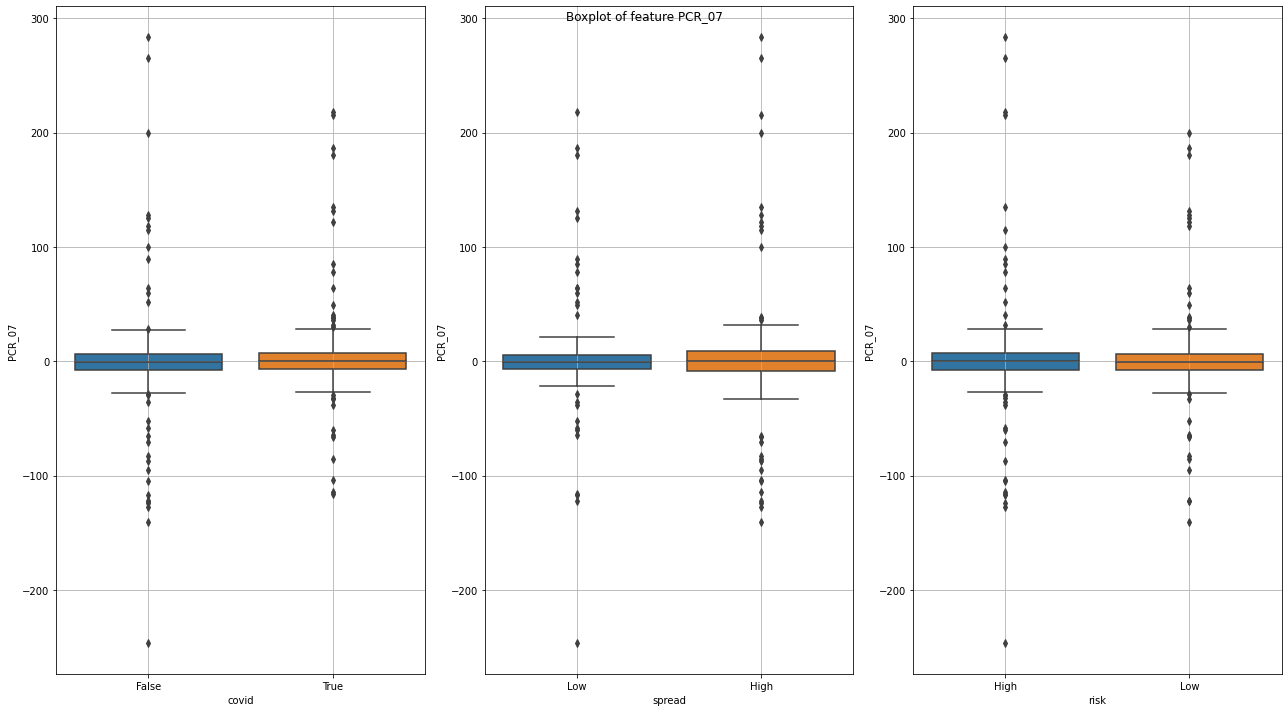

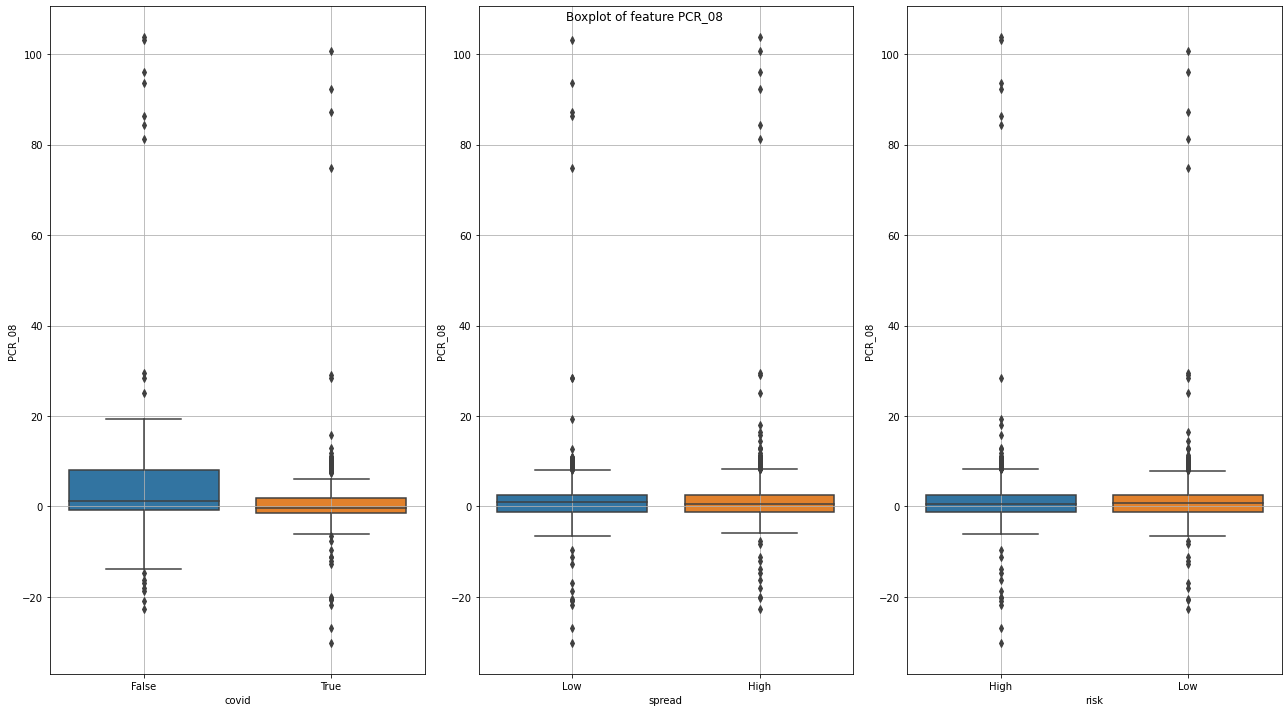

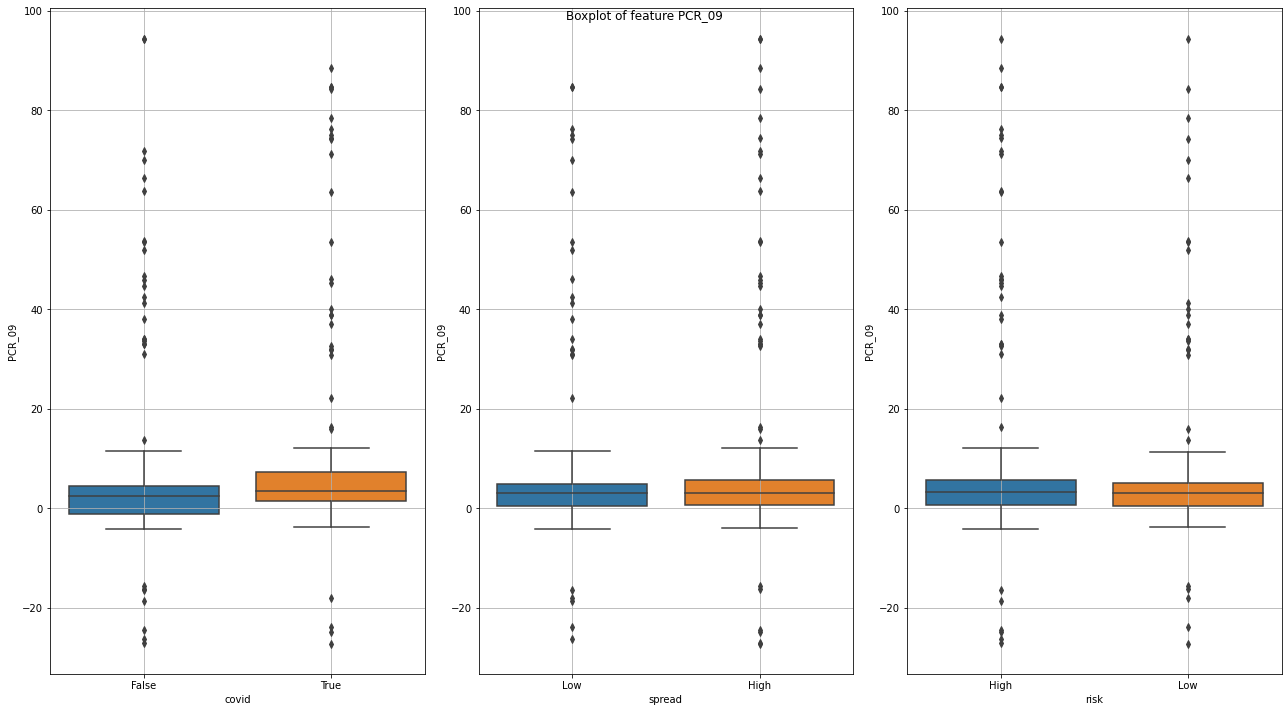

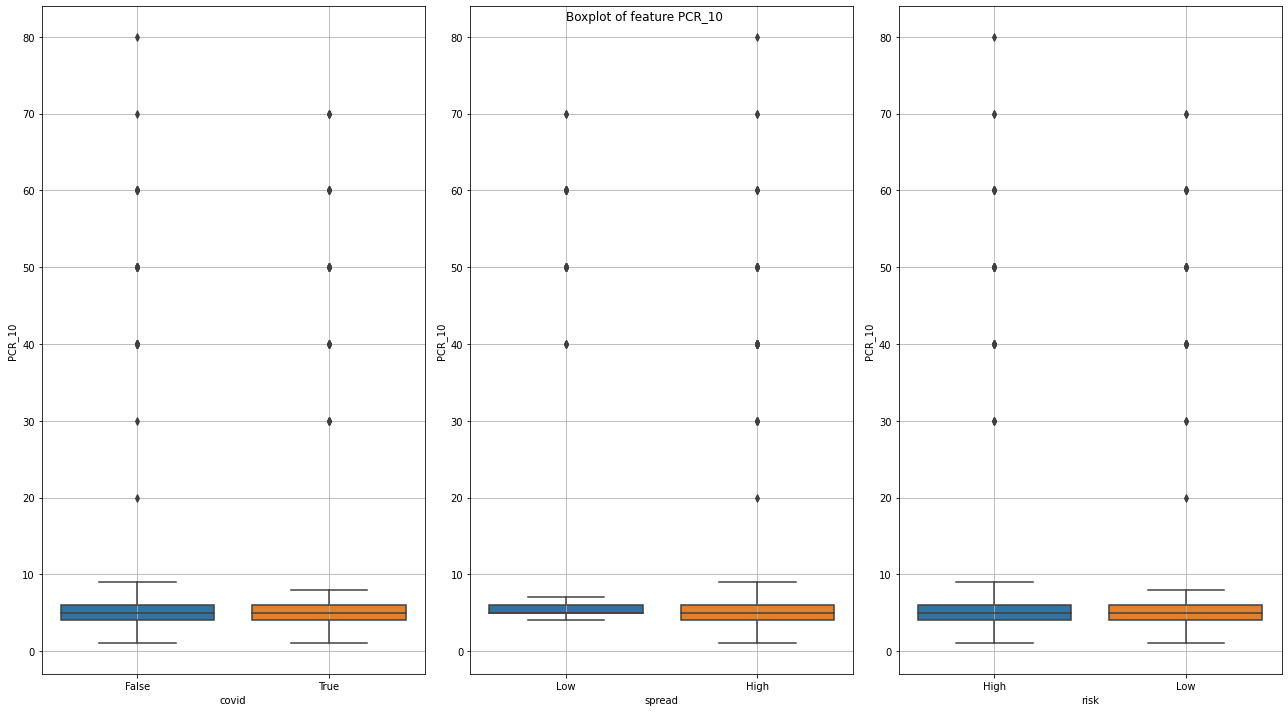

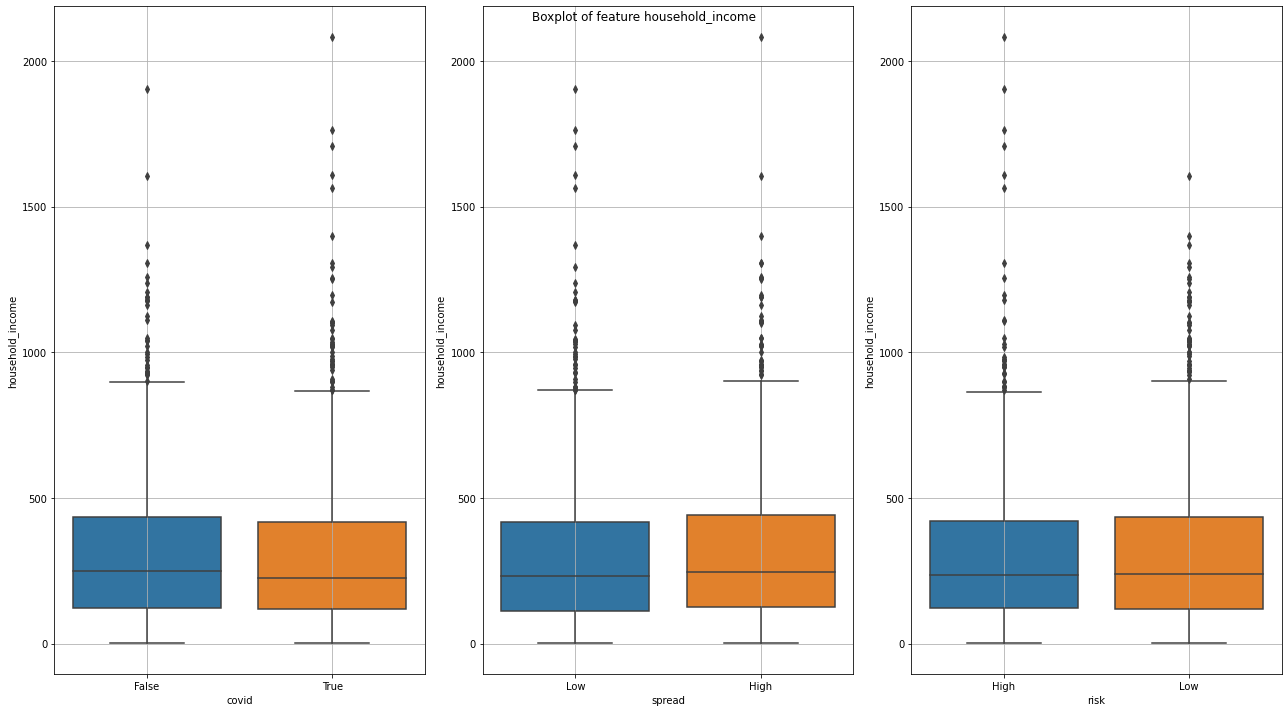

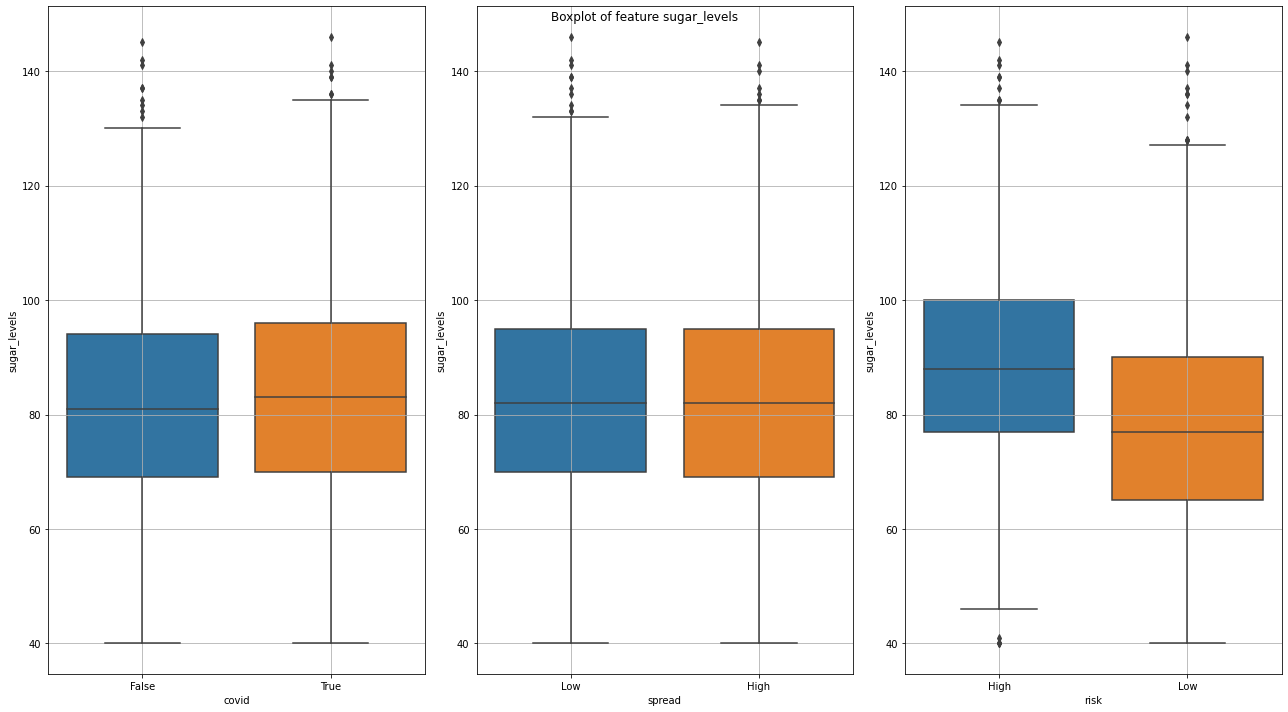

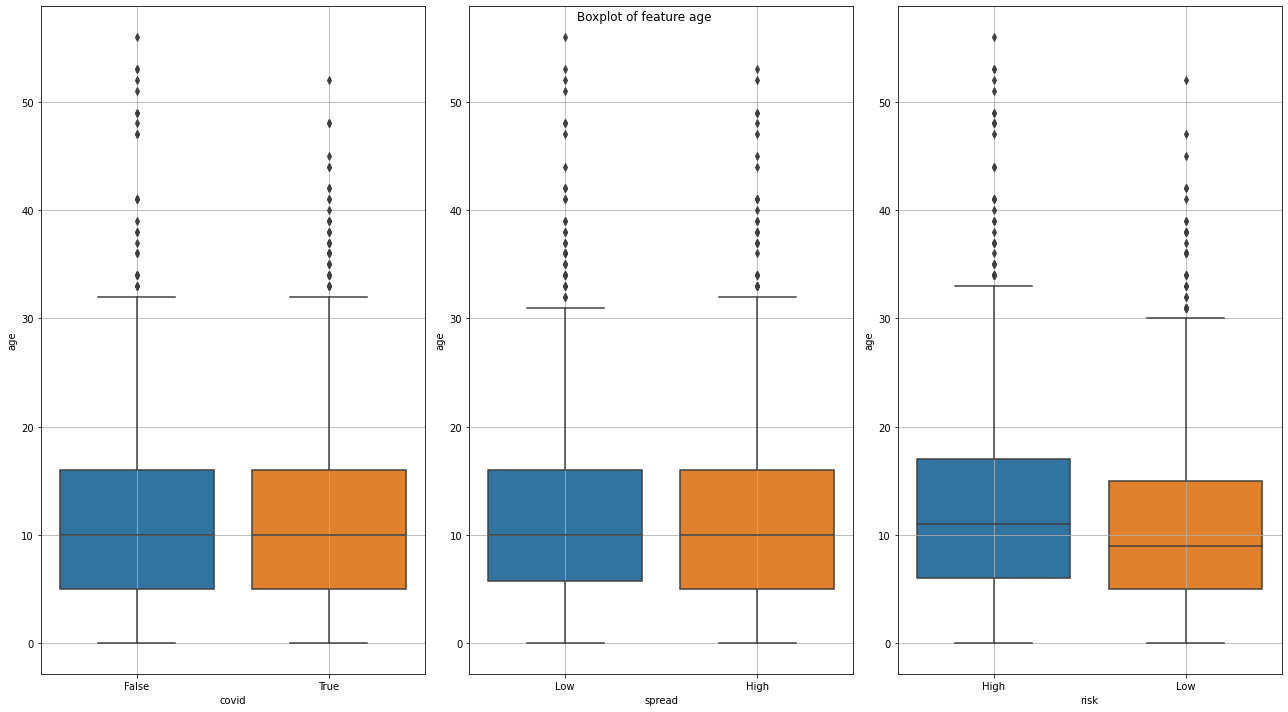

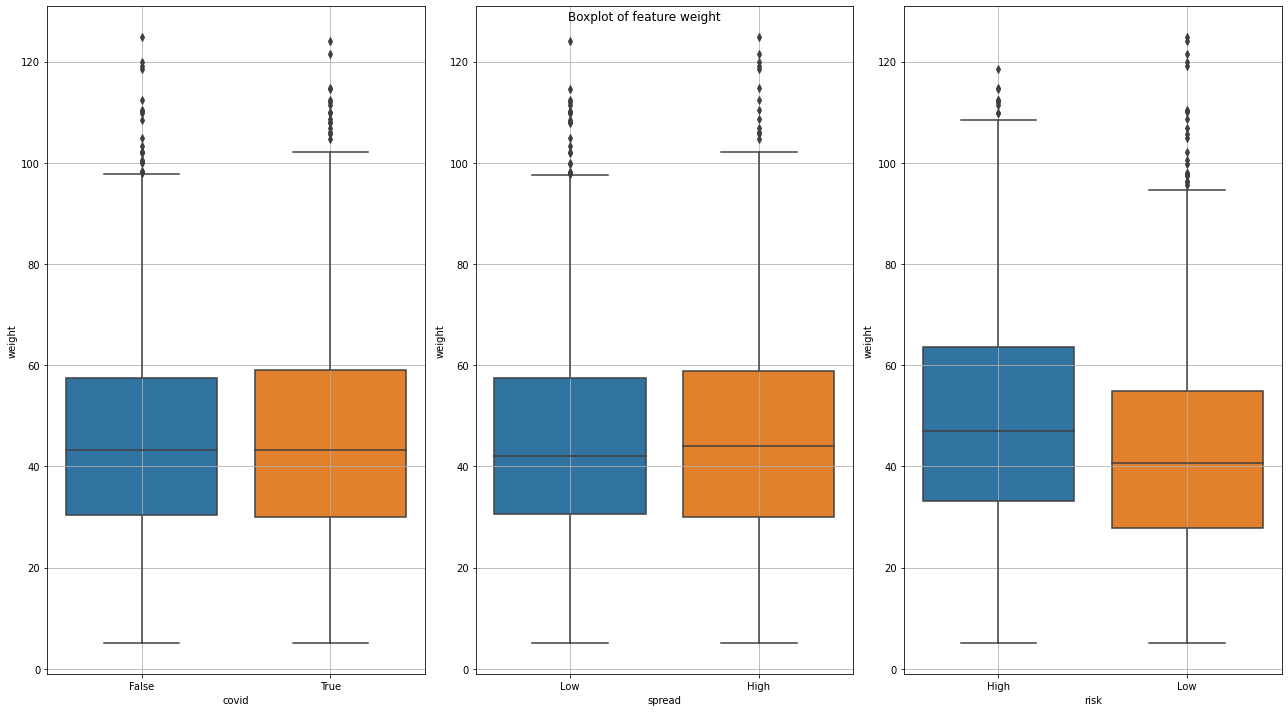

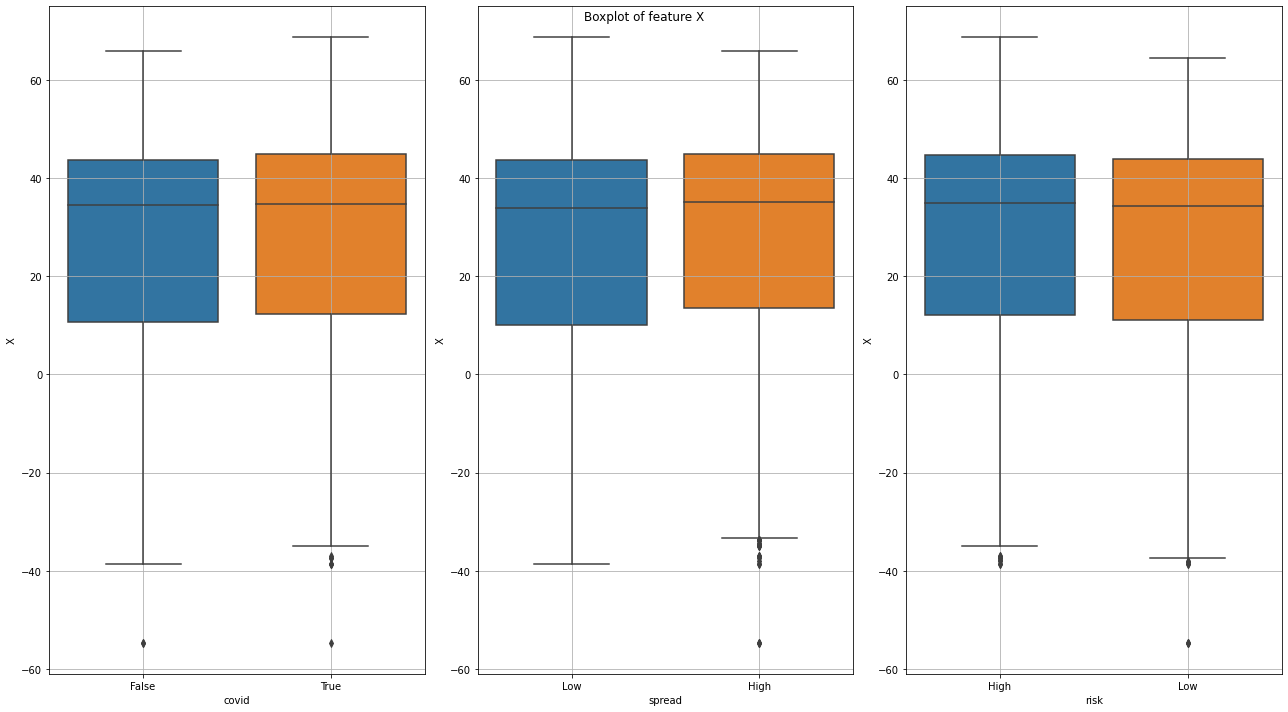

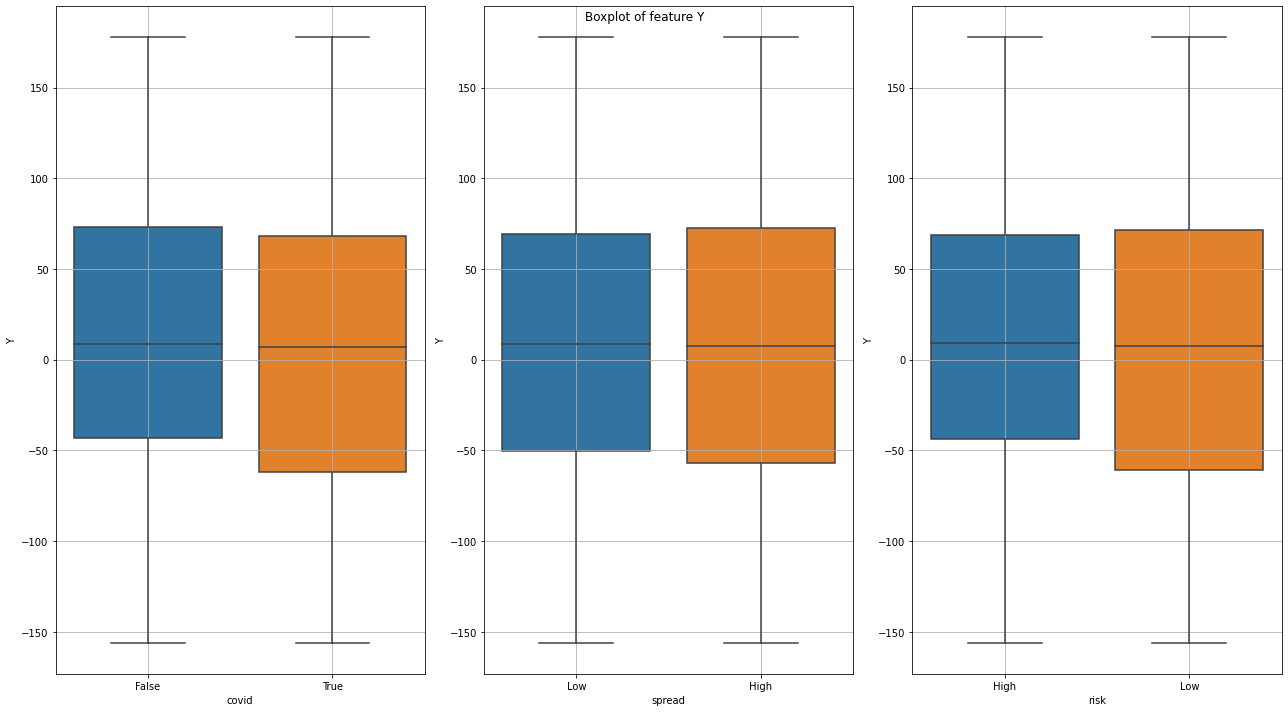

In [ ]:
# part of Q11: draw boxplot of feature with target feature in order to spot outliars
for i, column in enumerate(continuous, 1):
    if column in dont_plot:
        continue
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))
    fig.suptitle('Boxplot of feature ' + column)
    sns.boxplot(ax=axes[0],data=data, y=column, x=TARGET_NAME[0])
    sns.boxplot(ax=axes[1],data=data, y=column, x=TARGET_NAME[1])
    sns.boxplot(ax=axes[2], data=data, y=column, x=TARGET_NAME[2])
    axes[0].grid()
    axes[1].grid()
    axes[2].grid()
    plt.tight_layout()
    plt.show()

Dealing with outlires.

We started for looking for outlires that are mistakes for sure such as negative age and weight. We found out that the easiest way to spot this mistkes is using describe function.

In [ ]:
for c in continuous:
  print(data[c].describe())

count    2292.000000
mean        0.003304
std         0.996036
min       -11.382247
25%        -0.463003
50%        -0.012534
75%         0.442436
max        10.519070
Name: PCR_01, dtype: float64
count    2274.000000
mean       -0.031600
std         1.186263
min       -11.209529
25%        -0.436233
50%         0.009049
75%         0.457240
max        10.679678
Name: PCR_02, dtype: float64
count    2297.000000
mean      227.887716
std       326.522812
min       -16.743388
25%       110.014600
50%       183.060444
75%       261.546606
max      3396.420290
Name: PCR_03, dtype: float64
count    2287.000000
mean      225.985403
std       332.090129
min        -6.937953
25%       101.341620
50%       180.487572
75%       256.316409
max      3409.170615
Name: PCR_04, dtype: float64
count    2273.000000
mean        3.735152
std         5.725782
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        80.000000
Name: PCR_05, dtype: float64
count    2265.0

Now we dealt with outlires that are too big or small compare to the data. We decided to keep the values between 3 to 97 precent of the data, we saw that this step provided us with much better box plots.

In [ ]:
# remove outilers, we keep only samples with values between 3 to 97 percent
for i, column in enumerate(PCR, 1):
  upper_limit = data[column].quantile(0.97)
  lower_limit = data[column].quantile(0.03)
  data.loc[(data[column] > upper_limit),column] = upper_limit
  data.loc[(data[column] < lower_limit),column] = lower_limit

Here you can see how clean the data is, after replacing worng values with median and remove the outlires smaller than 3 precent and bigger than 97 precent.

We also tried working with IQR but we found that the data probably don't distribute as the noraml distribution since we got very big column at the edges. Moreover, IQR suppurted us with negative values somthing that we tried to avoid.

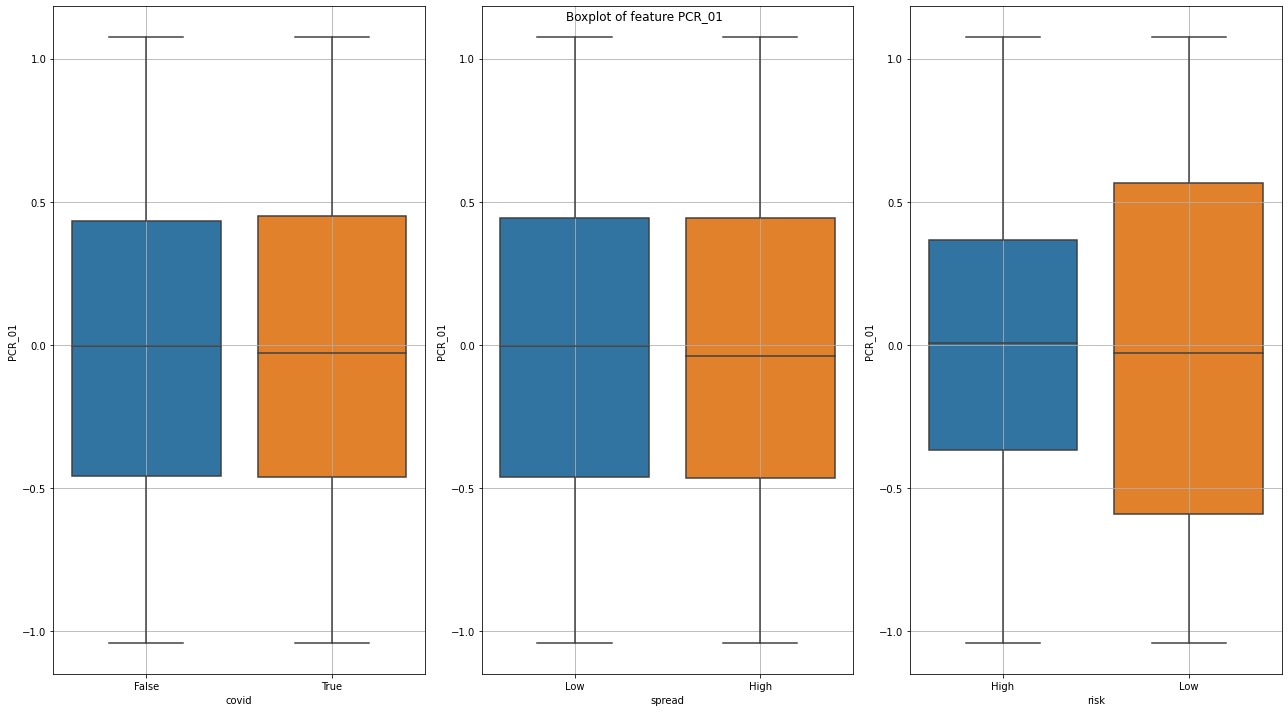

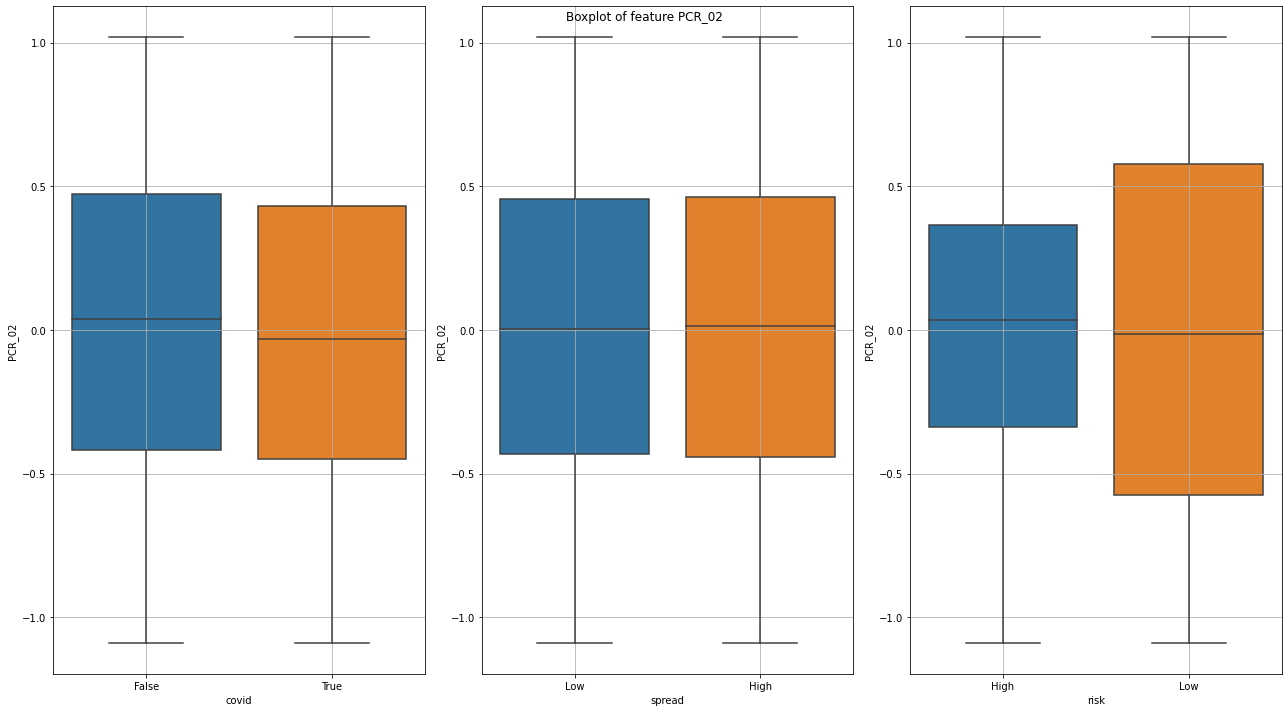

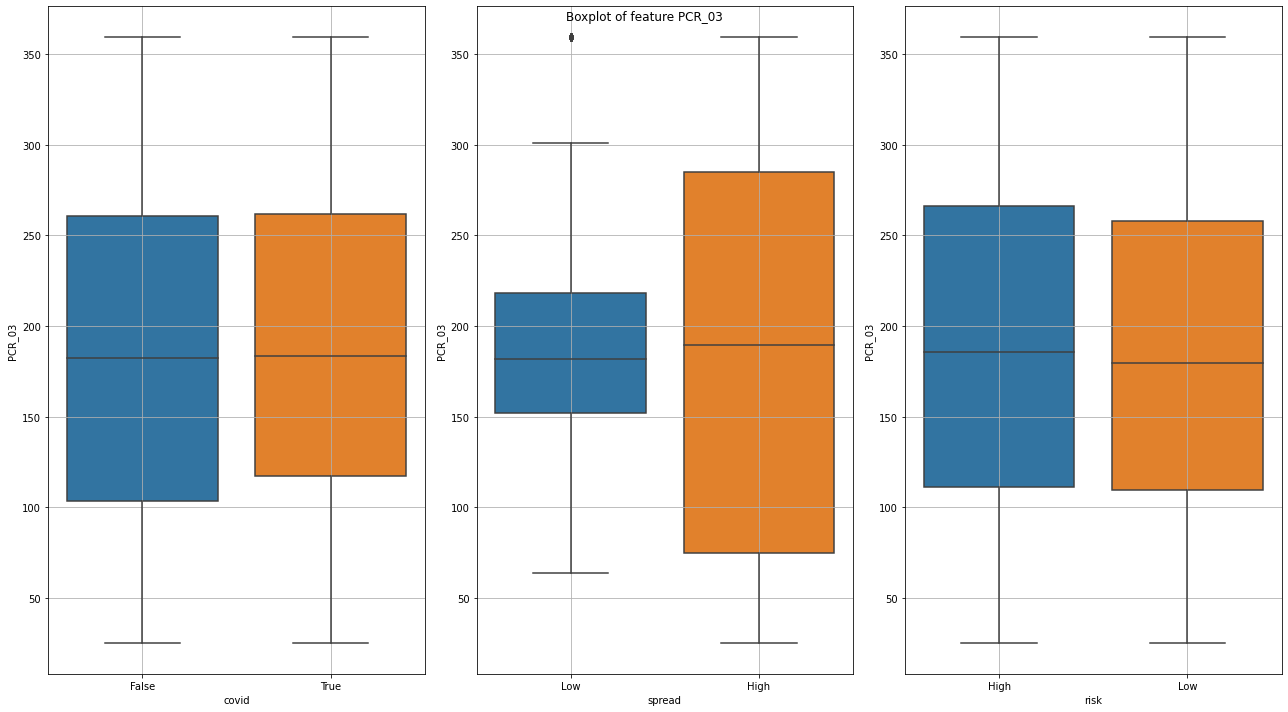

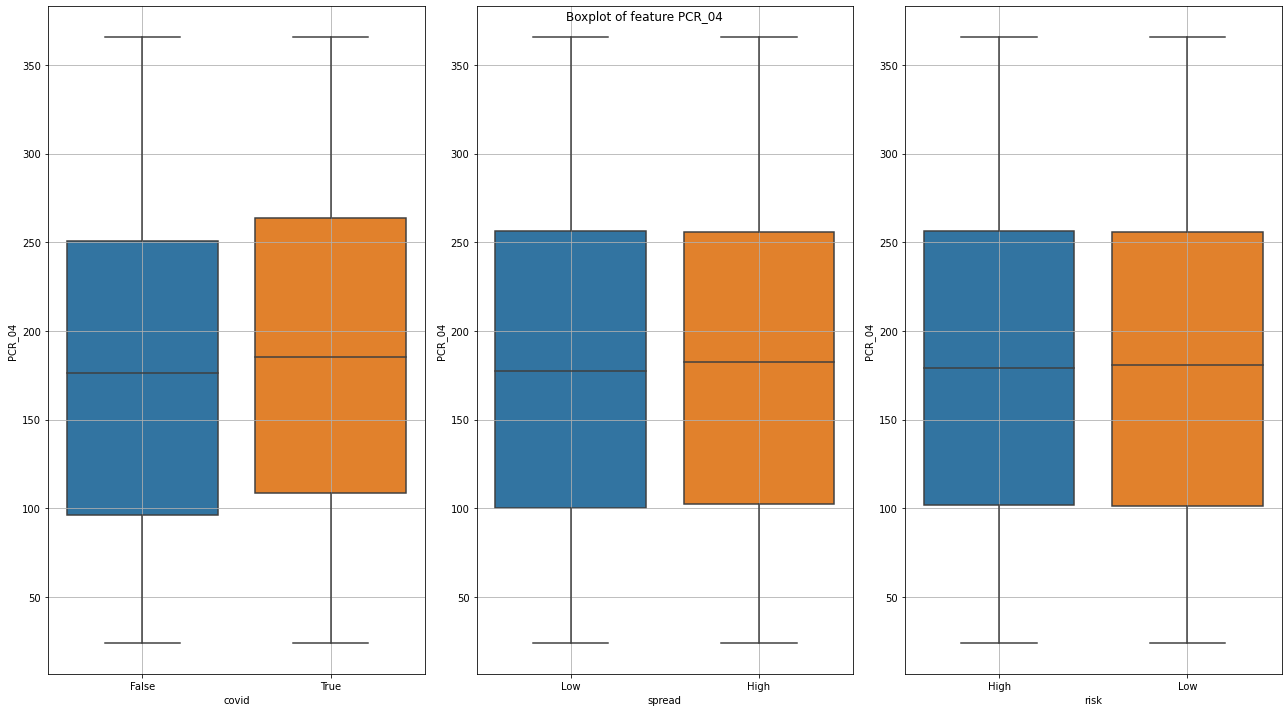

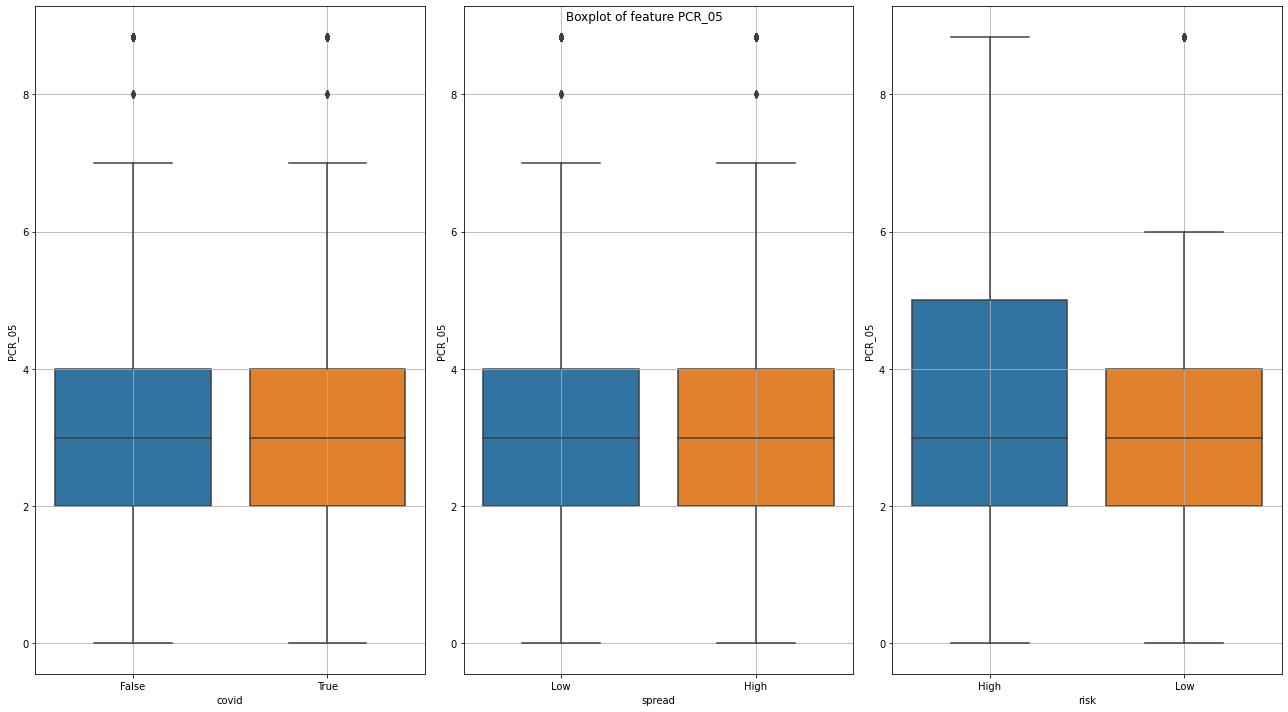

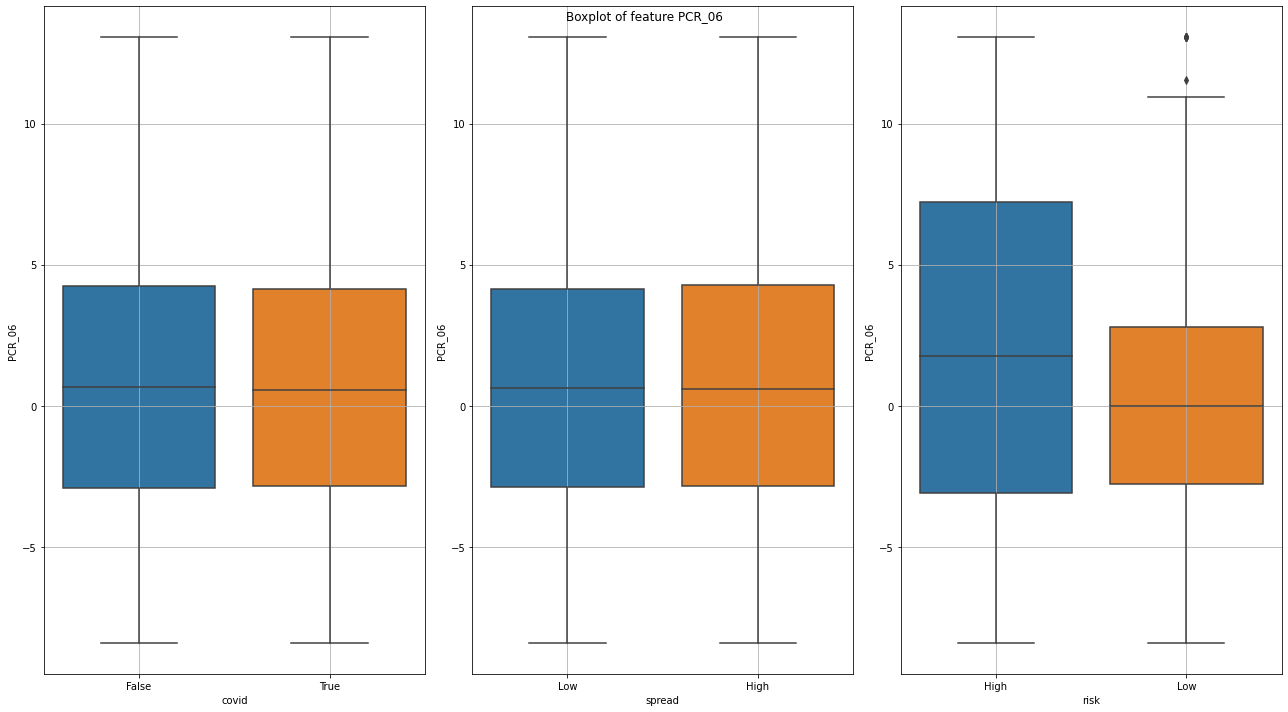

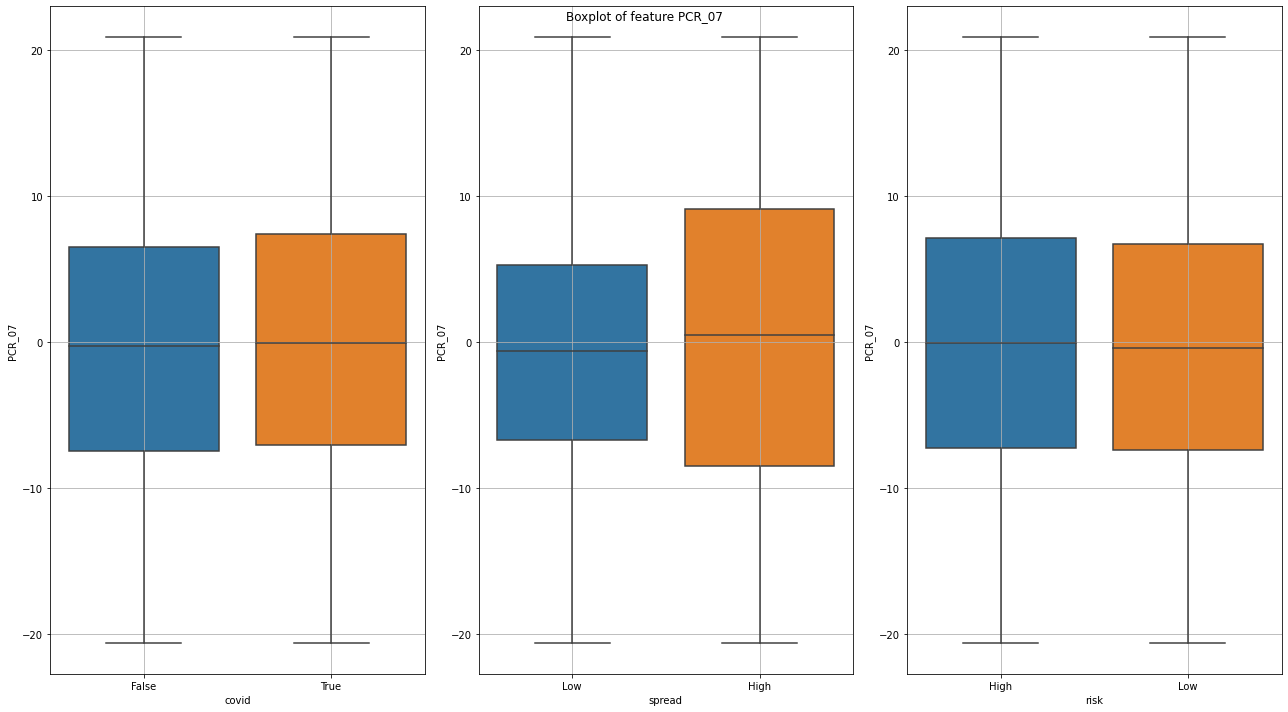

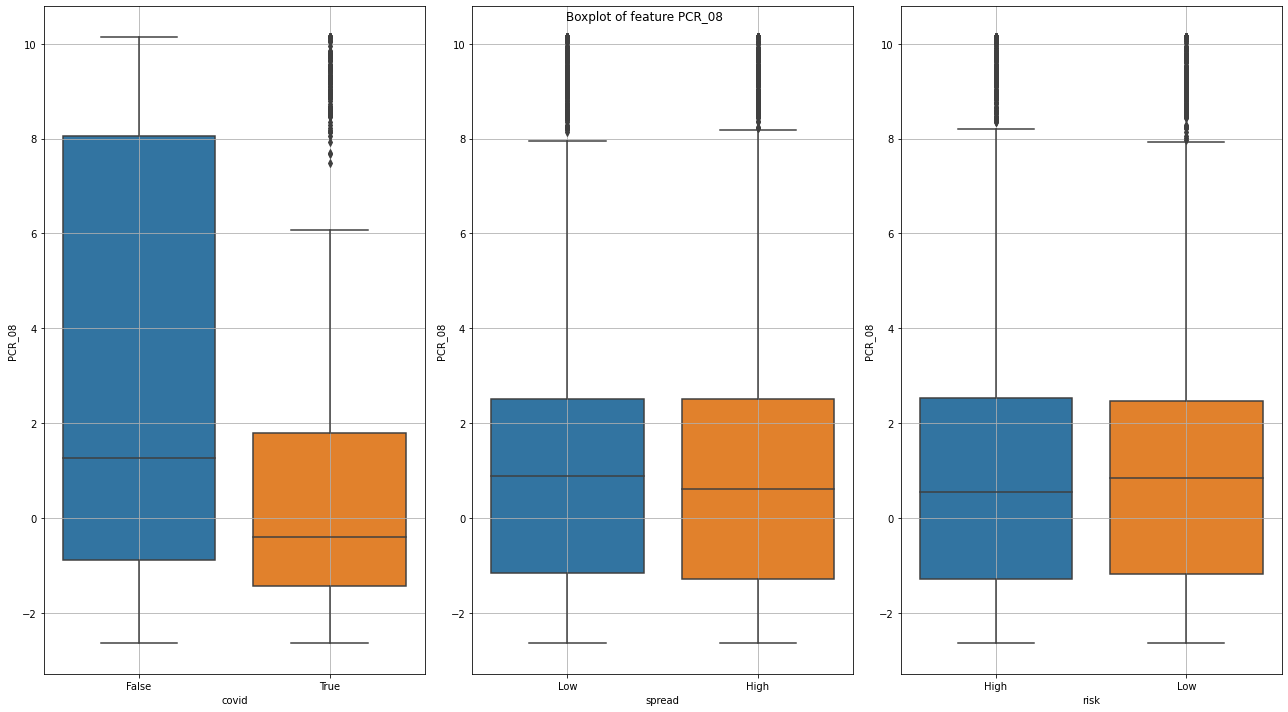

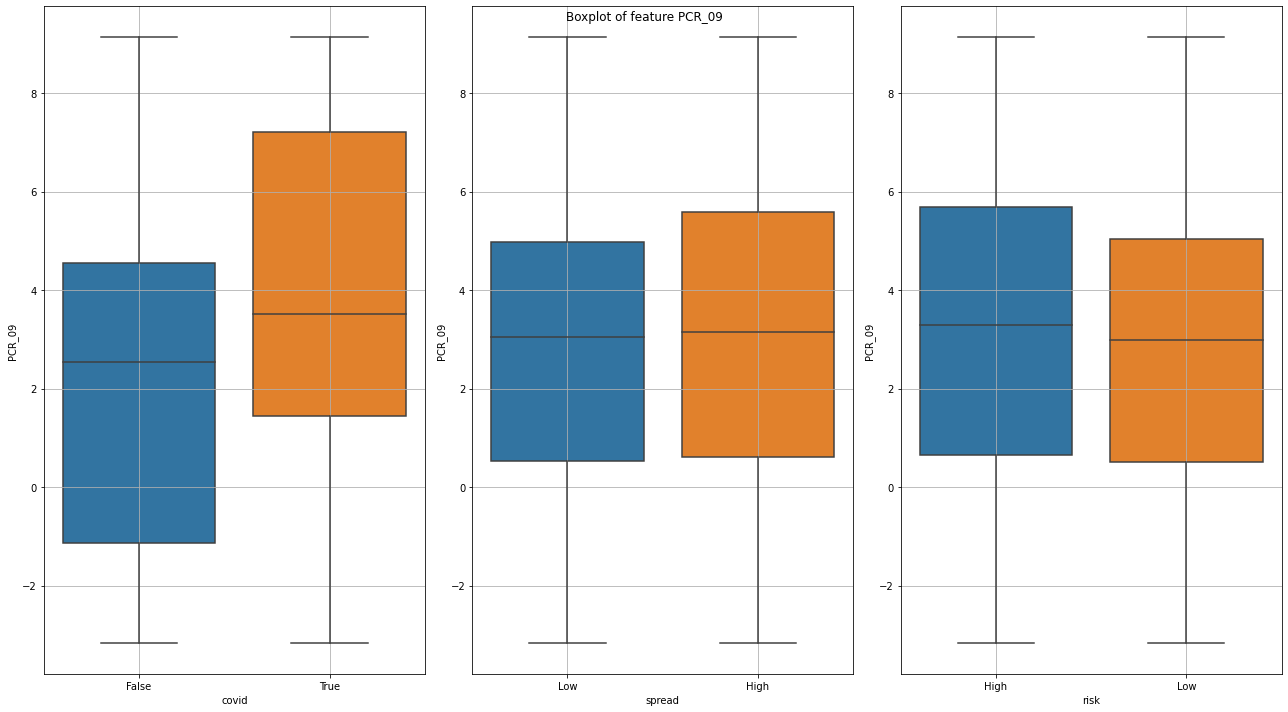

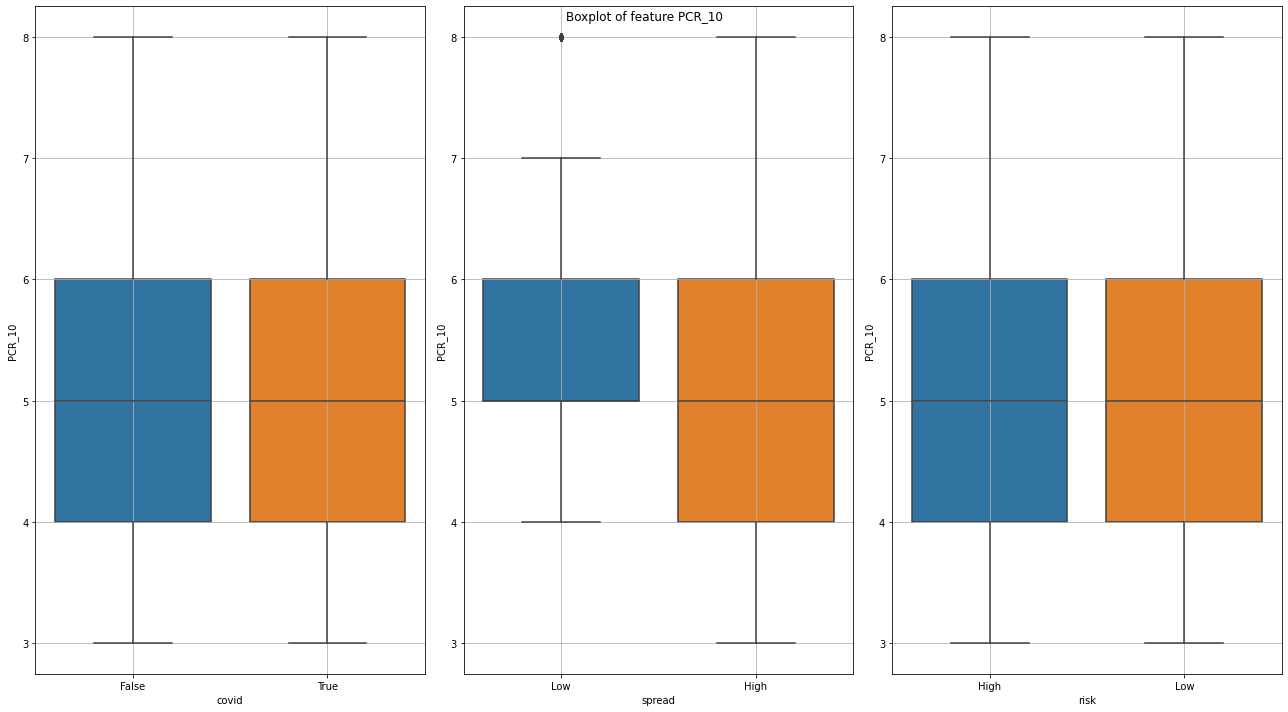

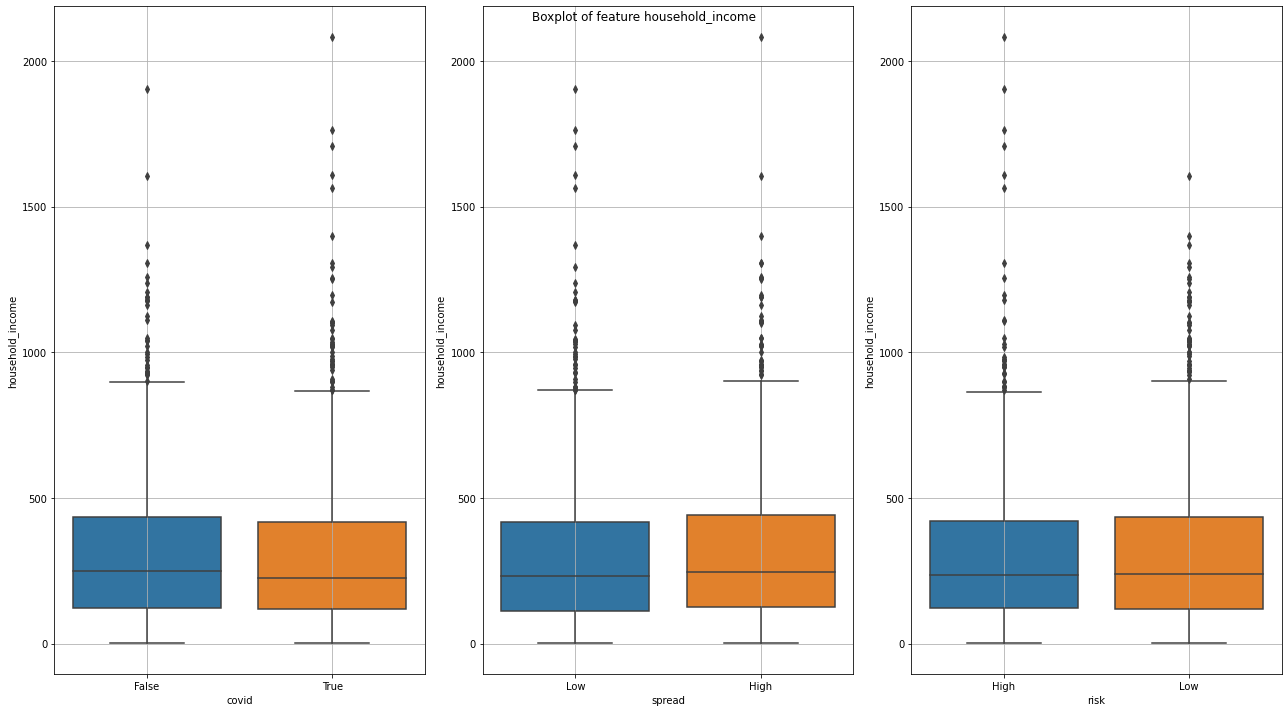

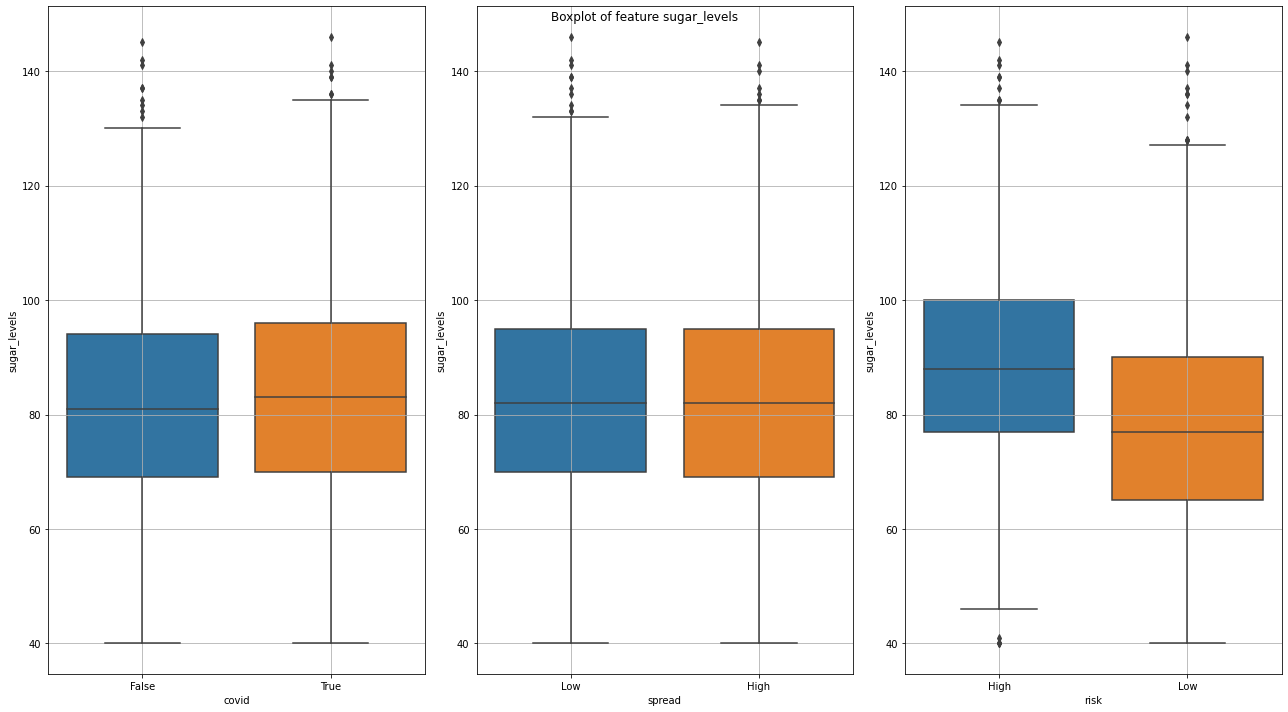

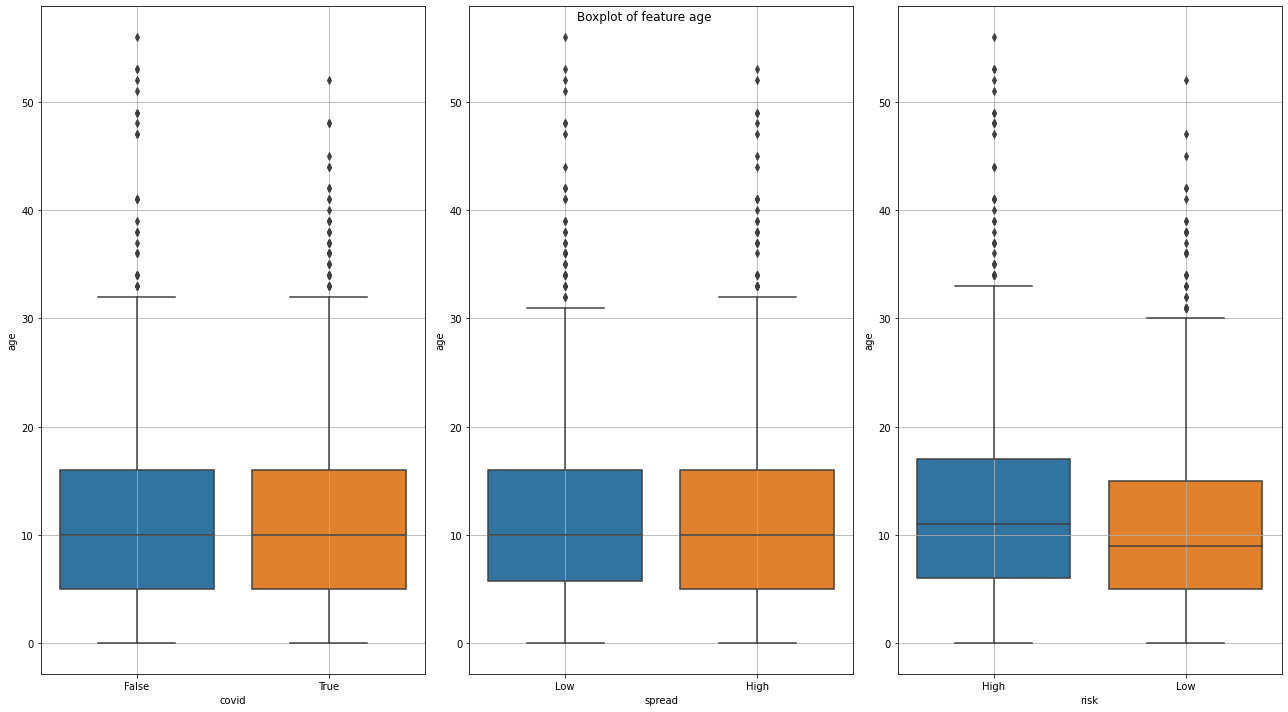

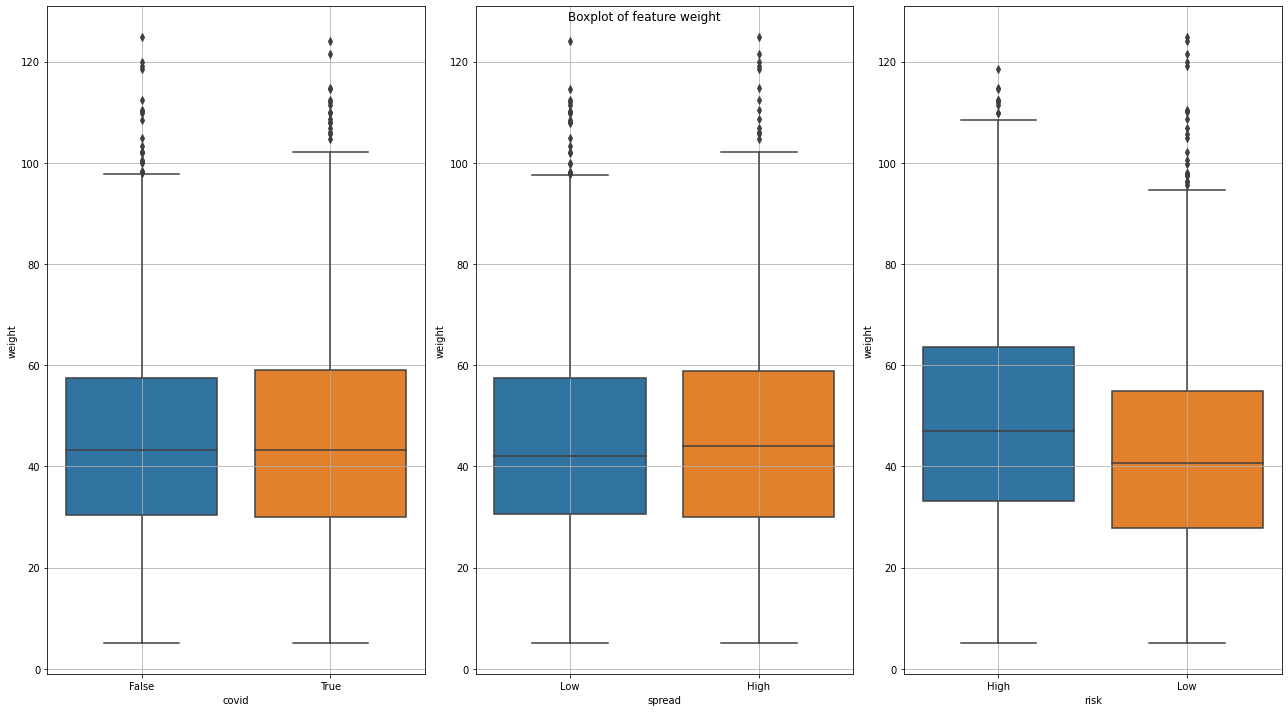

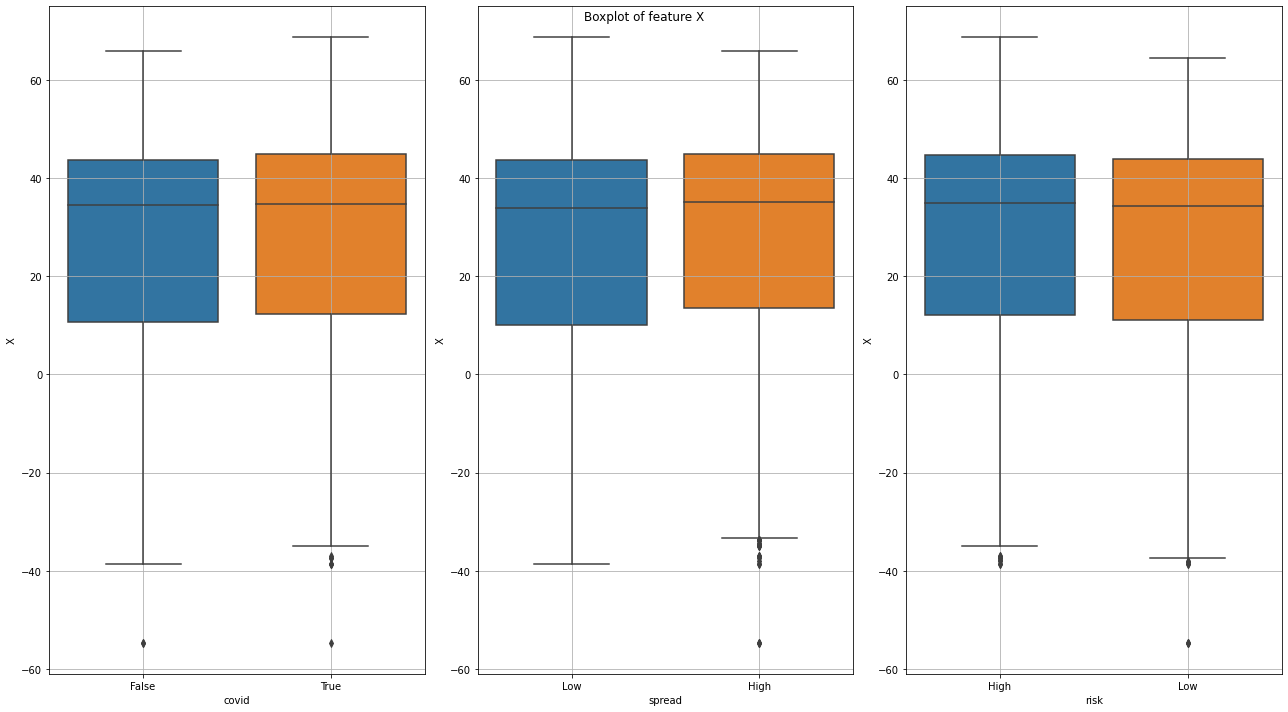

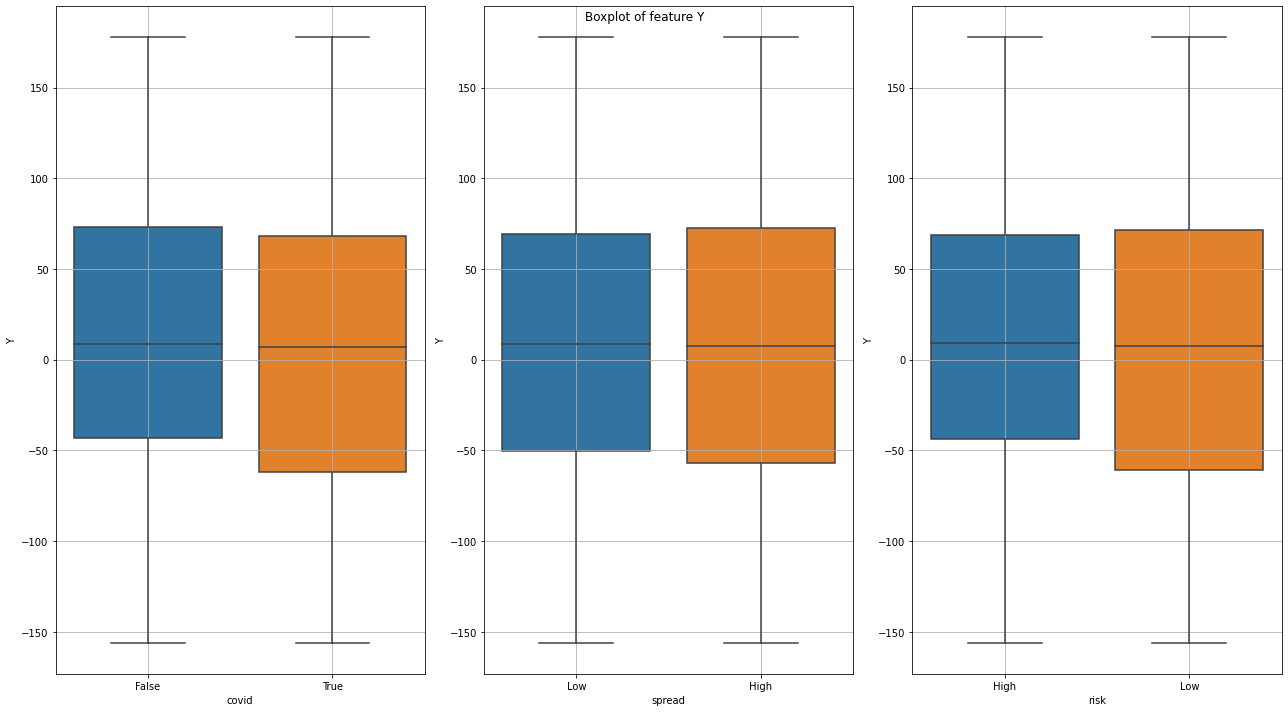

In [ ]:
for i, column in enumerate(continuous, 1):
    if column in dont_plot:
        continue
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))
    fig.suptitle('Boxplot of feature ' + column)
    sns.boxplot(ax=axes[0],data=data, y=column, x=TARGET_NAME[0])
    axes[0].grid()
    sns.boxplot(ax=axes[1],data=data, y=column, x=TARGET_NAME[1])
    axes[1].grid()
    sns.boxplot(ax=axes[2], data=data, y=column, x=TARGET_NAME[2])
    axes[2].grid()
    plt.tight_layout()
    plt.show()

Just making sure we did not loose any of the samples...


In [ ]:
print(data.shape[0])

2977


Dealing with missing data- we impute values with the mean.

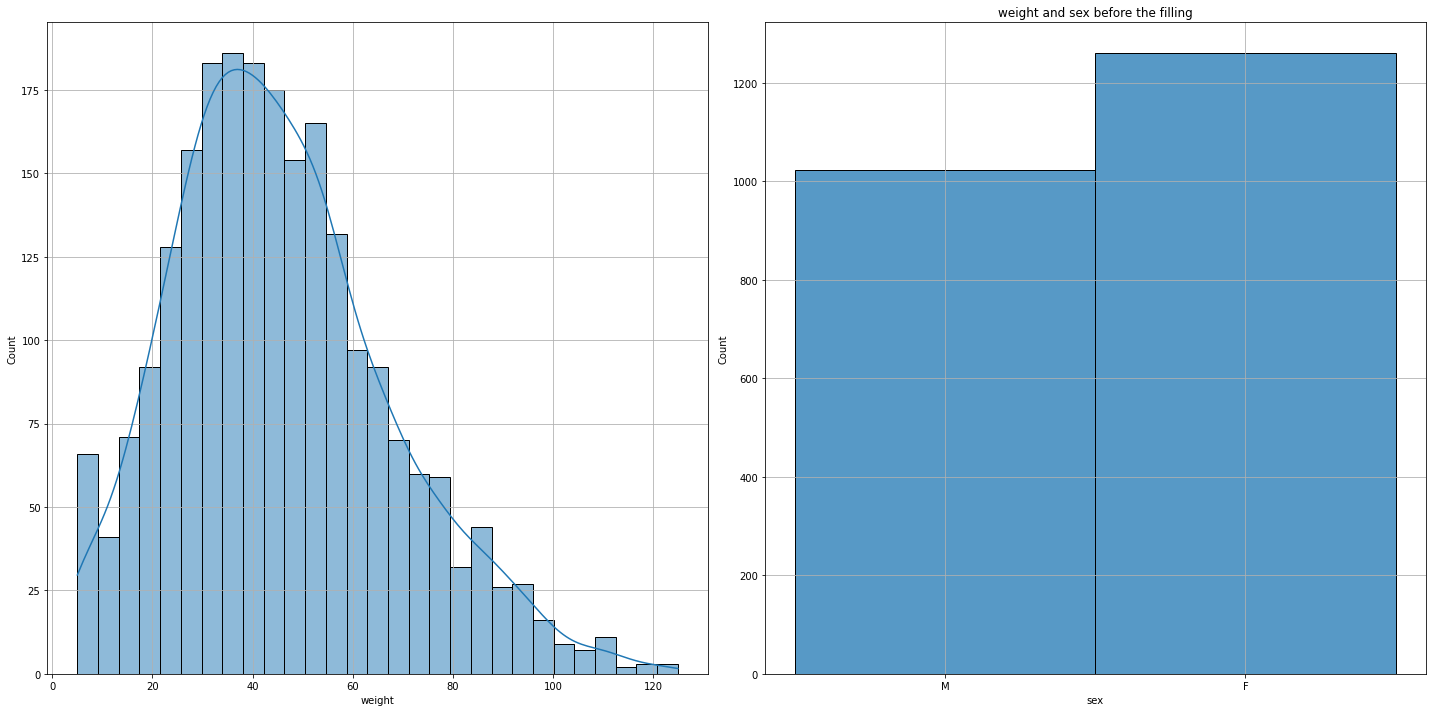

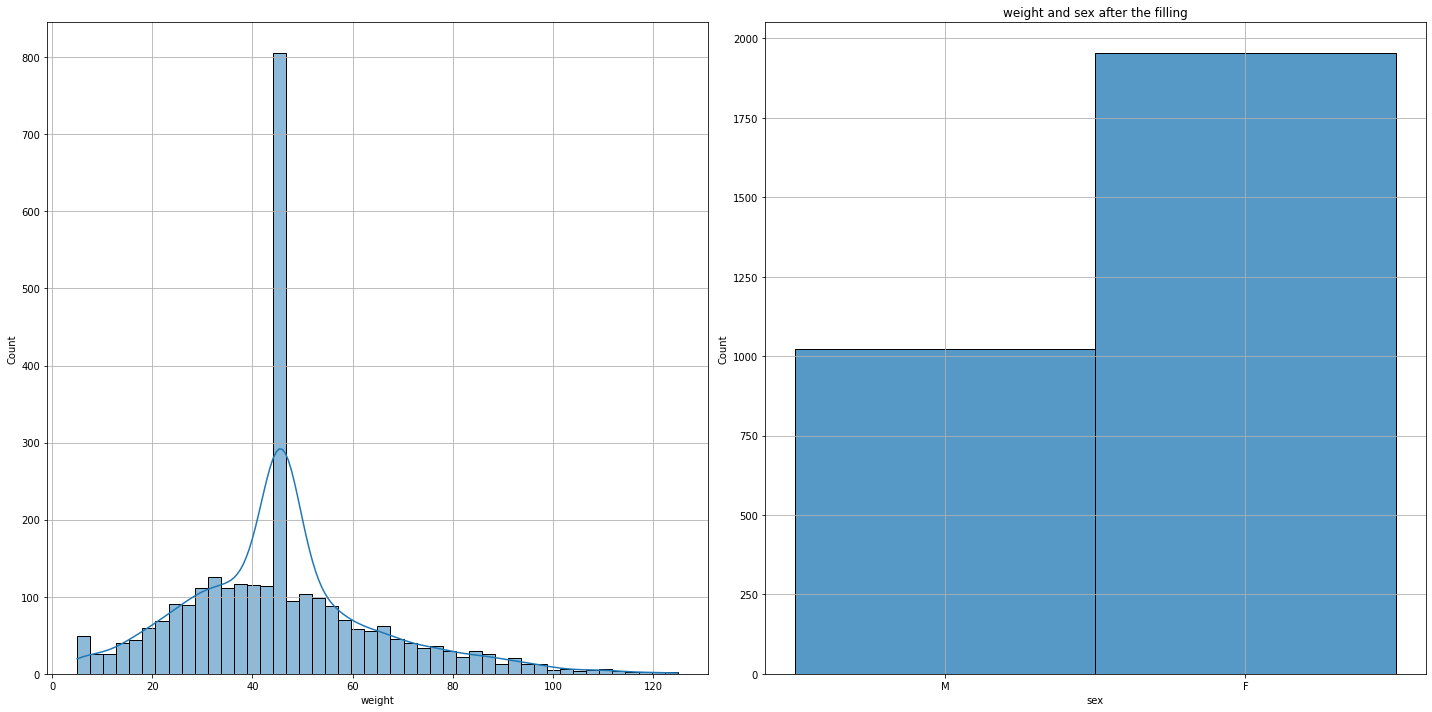

In [ ]:

# part of Q17: missing values
# create the imputer, with most frequent as strategy to fill missing value.

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(ax=axes[0], data=data, x='weight', kde=True)
sns.histplot(ax=axes[1], data=data, x='sex')
axes[0].grid()
axes[1].grid()
plt.title("weight and sex before the filling")
plt.tight_layout()
plt.show()

for c in continuous:
    data[c].fillna((data[c].mean()), inplace=True)
for c in categorial:
    data = data.fillna(data.mode().iloc[0])

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(ax=axes[0], data=data, x='weight', kde=True)
sns.histplot(ax=axes[1], data=data, x='sex')
axes[0].grid()
axes[1].grid()
plt.title("weight and sex after the filling")
plt.tight_layout()
plt.show()

In [ ]:
print("corr: ", data['city_NH'].corr(data['covid']), "feature: ", "city to other")

corr:  0.0027760847431126828 feature:  city to other


Creating a coorelation matrix between all the intresting features. 

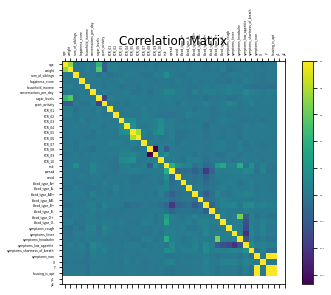

In [ ]:
# part of Q19: corrlation matrix
data_no_states = data.drop(columns=states_list_with_prefix)
# we drop this coulmns if we already created new feature from them like symptoms, address, sex, blood_type
# or we thought they won't contruibute to the learning like job or patient id
drop_final = ['symptoms','address', 'job', 'current_location','blood_type','sex','pcr_date','patient_id'] 
data_no_states = data_no_states.drop(columns=drop_final)
data_final = data_no_states
data_final['y1'] = data_final['Y']
data_final['y2'] = data_final['Y']
f = plt.figure()
plt.matshow(data_final.corr(), fignum=f.number)
plt.xticks(range(len(data_final.columns)), data_final.columns, fontsize=3, rotation=90)
plt.yticks(range(len(data_final.columns)), data_final.columns, fontsize=3)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=2)
plt.title('Correlation Matrix')
plt.savefig('filename.png', dpi=400)
plt.show()
data_final = data_final.drop(columns=['y1','y2'])

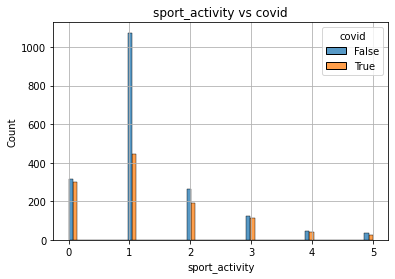

In [ ]:
# part of Q20:
sns.histplot(data=data, x='sport_activity', hue=data['covid'], multiple="dodge")
plt.title("sport_activity vs covid")
plt.grid()
plt.show()

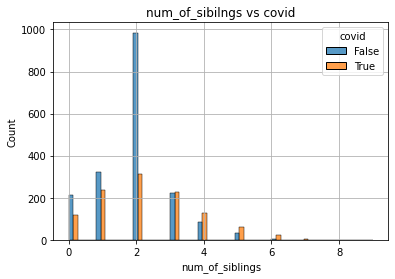

In [ ]:
# part of Q20:
sns.histplot(data=data, x='num_of_siblings', hue=data['covid'], multiple="dodge")
plt.title("num_of_sibilngs vs covid")
plt.grid()
plt.show()

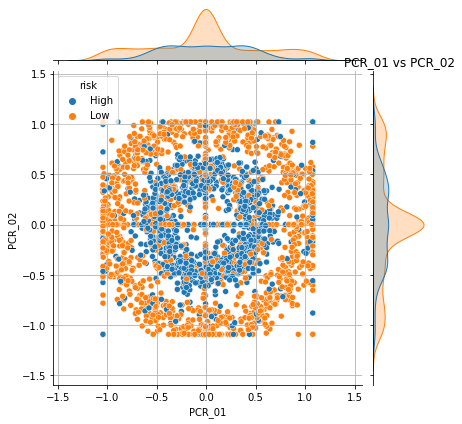

In [ ]:
# part of Q21:
g = sns.jointplot(x=data_final['PCR_01'], y=data_final['PCR_02'], hue=data_final['risk'])
plt.title("PCR_01 vs PCR_02")
_ = g.ax_joint.grid()
plt.show()

Lets look at the pair plot of all the features compared to the covid labels and try to find significant features:

In [ ]:
# part of Q22:
# data2 = data_final.drop(columns=['spread', 'risk'])
# g = sns.pairplot(data2, hue='covid')
# plt.title("all featuers pairplot with covid labels")
# plt.grid()
# plt.show()

Lets look at the pair plot of all the features compared to the risk labels and try to find significant features:

In [ ]:
# data2 = data_final.drop(columns=['spread', 'covid'])
# g = sns.pairplot(data2, hue='risk')
# plt.title("all featuers pairplot with risk labels")
# plt.grid()
# plt.show()

Lets look at the pair plot of all the features compared to the spread labels and try to find significant features:

In [ ]:
# data2 = data_final.drop(columns=['risk', 'covid'])
# g = sns.pairplot(data2, hue='spread')
# plt.title("all featuers pairplot with spread labels")
# plt.grid()
# plt.show()

Lets look at the pair plot of all the PCR features compared to the spread labels and try to find only the significant once:

In [ ]:
# PCR2 = ['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10','spread']
# data2 = data_final[PCR2]
# g = sns.pairplot(data2, hue='spread')
# plt.title("PCR pairplot")
# plt.show()

We found a nice realtion between PCR_01 and PCR_06 looking at risk labels:

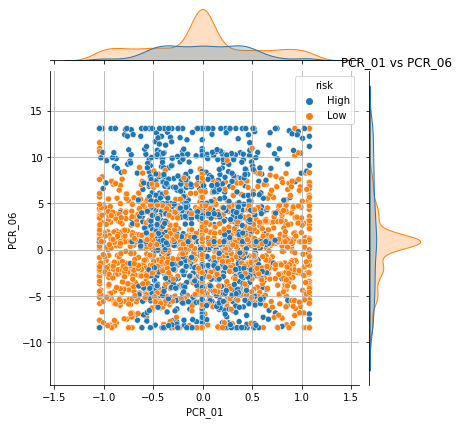

In [ ]:
g = sns.jointplot(x=data_final['PCR_01'], y=data_final['PCR_06'], hue=data_final['risk'])
plt.title("PCR_01 vs PCR_06")
_ = g.ax_joint.grid()
plt.show()

We found a nice realtion between suger_levels and weight looking at risk labels:

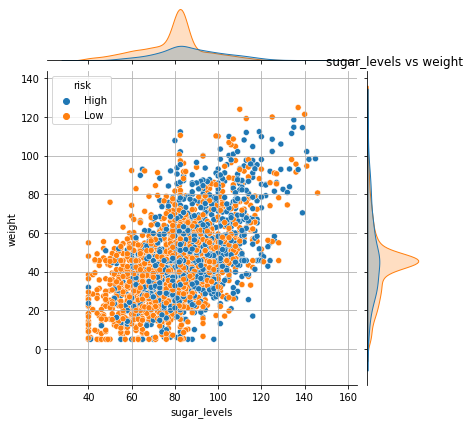

In [ ]:
g = sns.jointplot(x=data_final['sugar_levels'], y=data_final['weight'], hue=data_final['risk'])
plt.title("sugar_levels vs weight")
_ = g.ax_joint.grid()
plt.show()

We found a nice realtion between suger_levels and PCR_02 looking at risk labels:

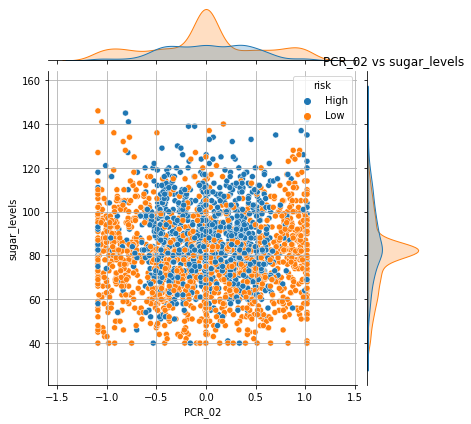

In [ ]:
g = sns.jointplot(x=data_final['PCR_02'], y=data_final['sugar_levels'], hue=data_final['risk'])
plt.title("PCR_02 vs sugar_levels")
_ = g.ax_joint.grid()
plt.show()

Here we can see that we might be able to use PCR_08 to estimate false covid patients:

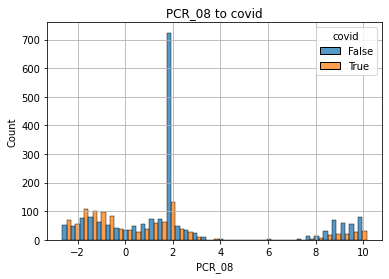

In [ ]:
g = sns.histplot(x=data_final['PCR_08'], hue=data_final['covid'],multiple="dodge")
plt.title("PCR_08 to covid")
plt.grid()
plt.show()

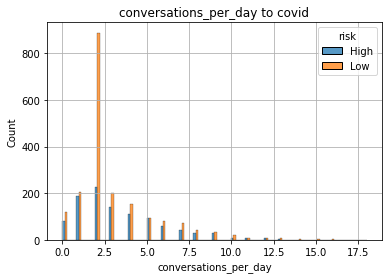

In [ ]:
g = sns.histplot(x=data_final['conversations_per_day'], hue=data_final['risk'],multiple="dodge")
plt.title("conversations_per_day to covid")
plt.grid()
plt.show()

We found a nice realtion between PCR_04 and PCR_03 looking at risk labels:

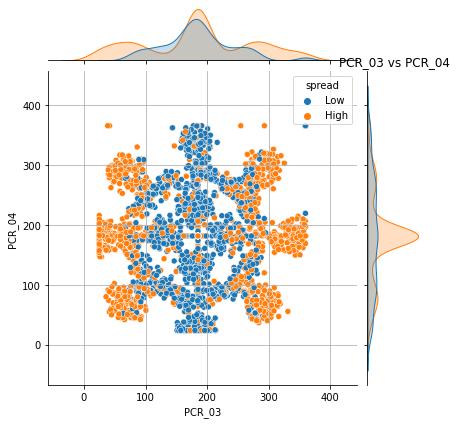

In [ ]:
g = sns.jointplot(x=data_final['PCR_03'], y=data_final['PCR_04'], hue=data_final['spread'])
plt.title("PCR_03 vs PCR_04")
_ = g.ax_joint.grid()
plt.show()

Lets take a look at the symptoms one hot vector against the target feature, and try to find whom is significant.

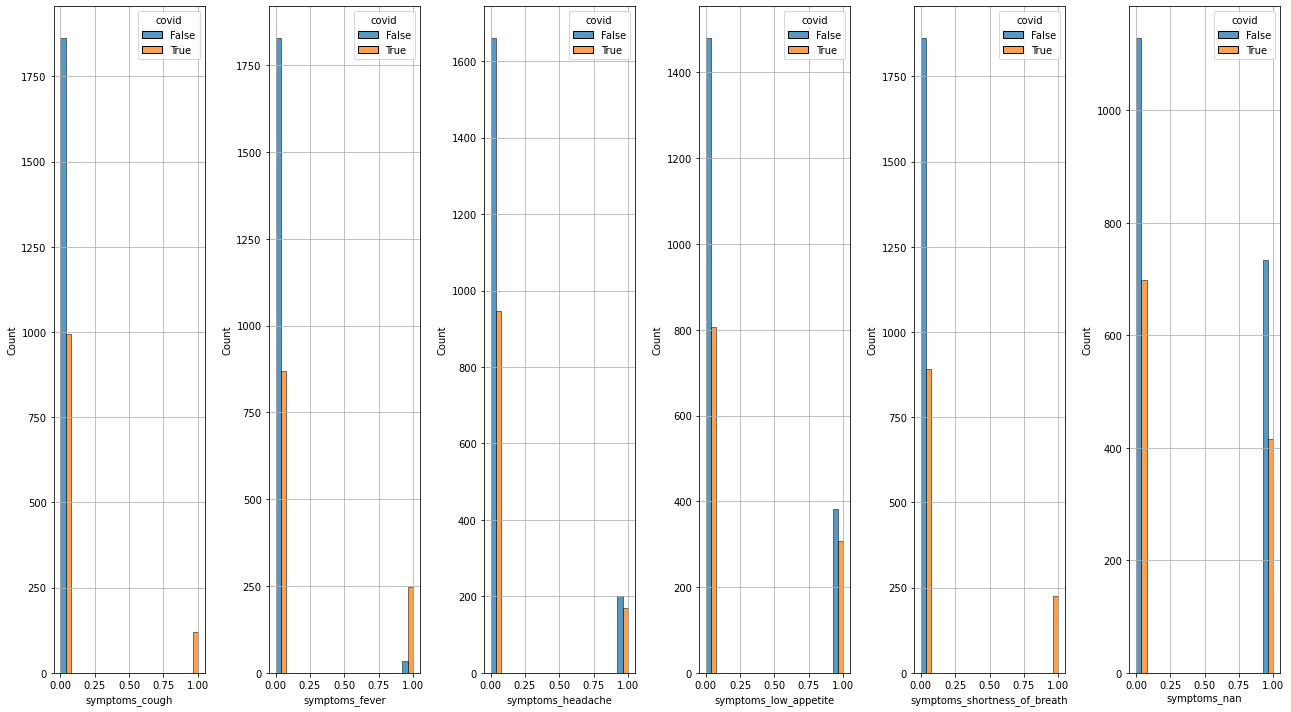

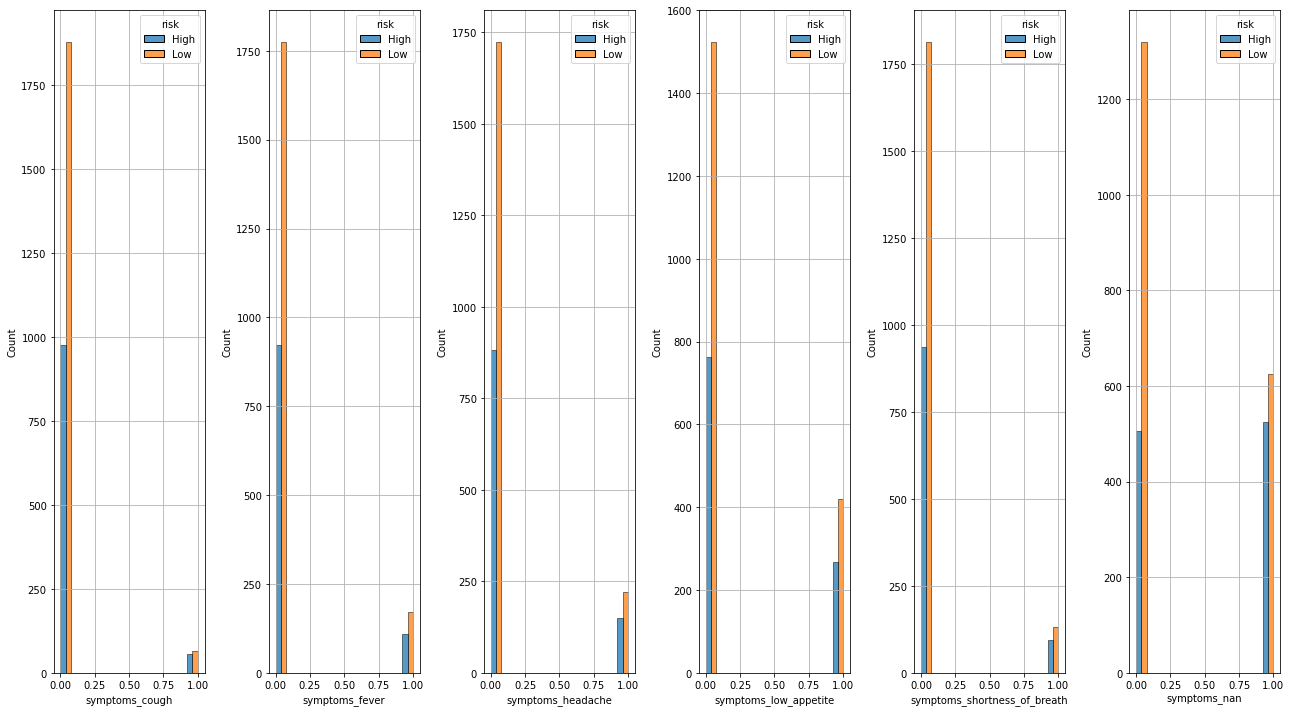

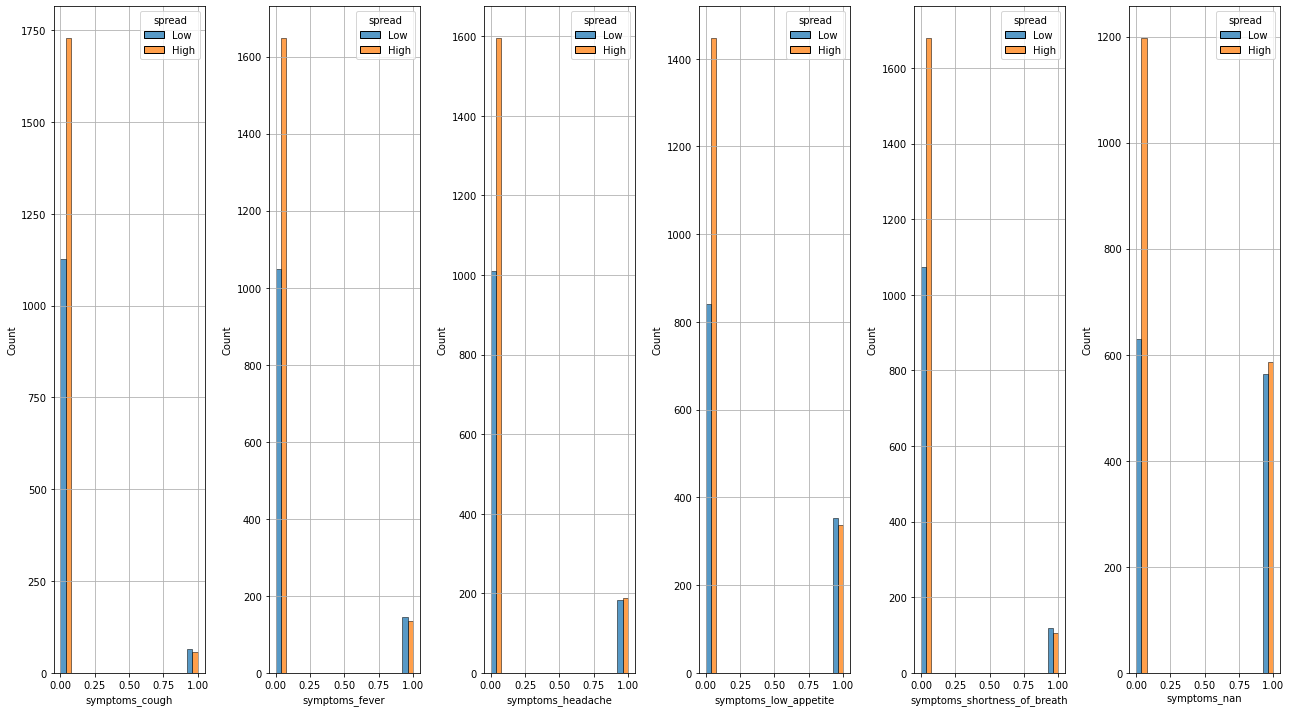

In [ ]:

fig, axes = plt.subplots(1, 6, figsize=(18, 10))
sym =["symptoms_cough","symptoms_fever","symptoms_headache","symptoms_low_appetite","symptoms_shortness_of_breath","symptoms_nan"]
for i,column in enumerate(sym):
     sns.histplot(ax=axes[i], data=data, x=column, hue=data['covid'], multiple="dodge")
     axes[i].grid()
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 6, figsize=(18, 10))
sym =["symptoms_cough","symptoms_fever","symptoms_headache","symptoms_low_appetite","symptoms_shortness_of_breath","symptoms_nan"]
for i,column in enumerate(sym):
     sns.histplot(ax=axes[i], data=data, x=column, hue=data['risk'], multiple="dodge")
     axes[i].grid()
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 6, figsize=(18, 10))
sym =["symptoms_cough","symptoms_fever","symptoms_headache","symptoms_low_appetite","symptoms_shortness_of_breath","symptoms_nan"]
for i,column in enumerate(sym):
     sns.histplot(ax=axes[i], data=data, x=column, hue=data['spread'], multiple="dodge")
     axes[i].grid()
plt.tight_layout()
plt.show()

Lets take a look at the blood types one hot vector against the target feature, and try to find whom is significant

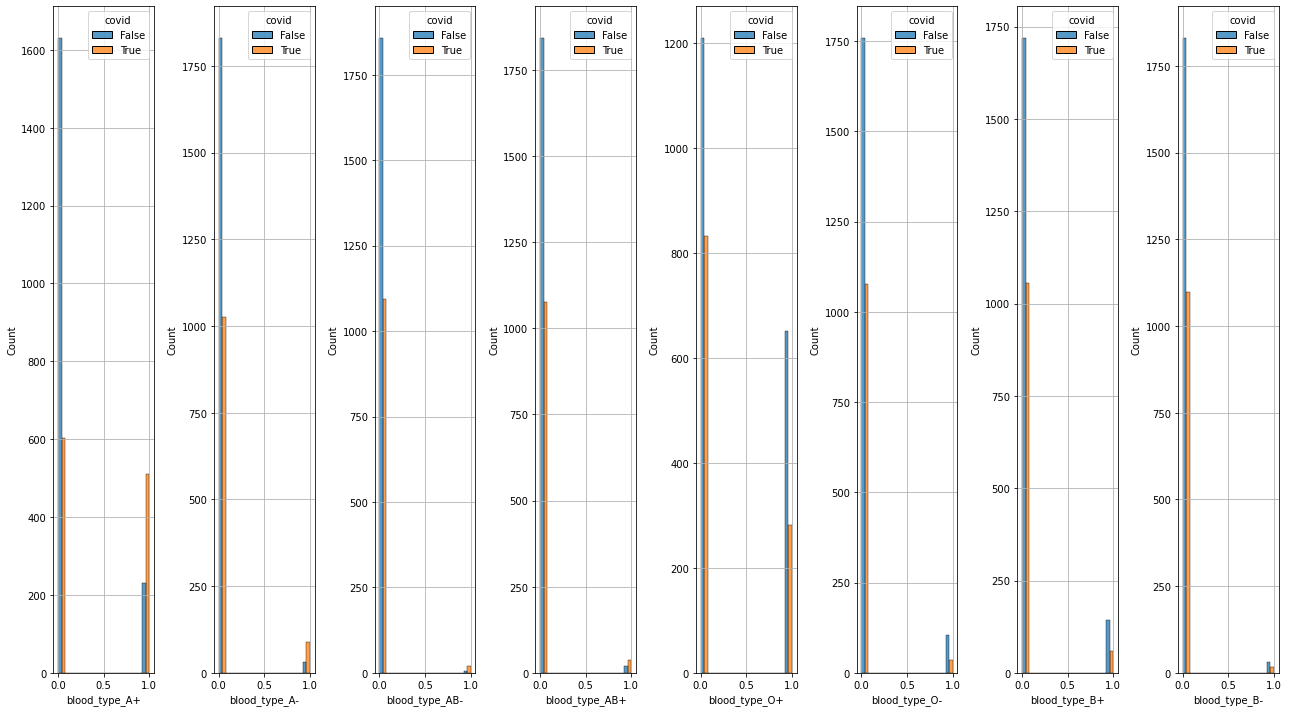

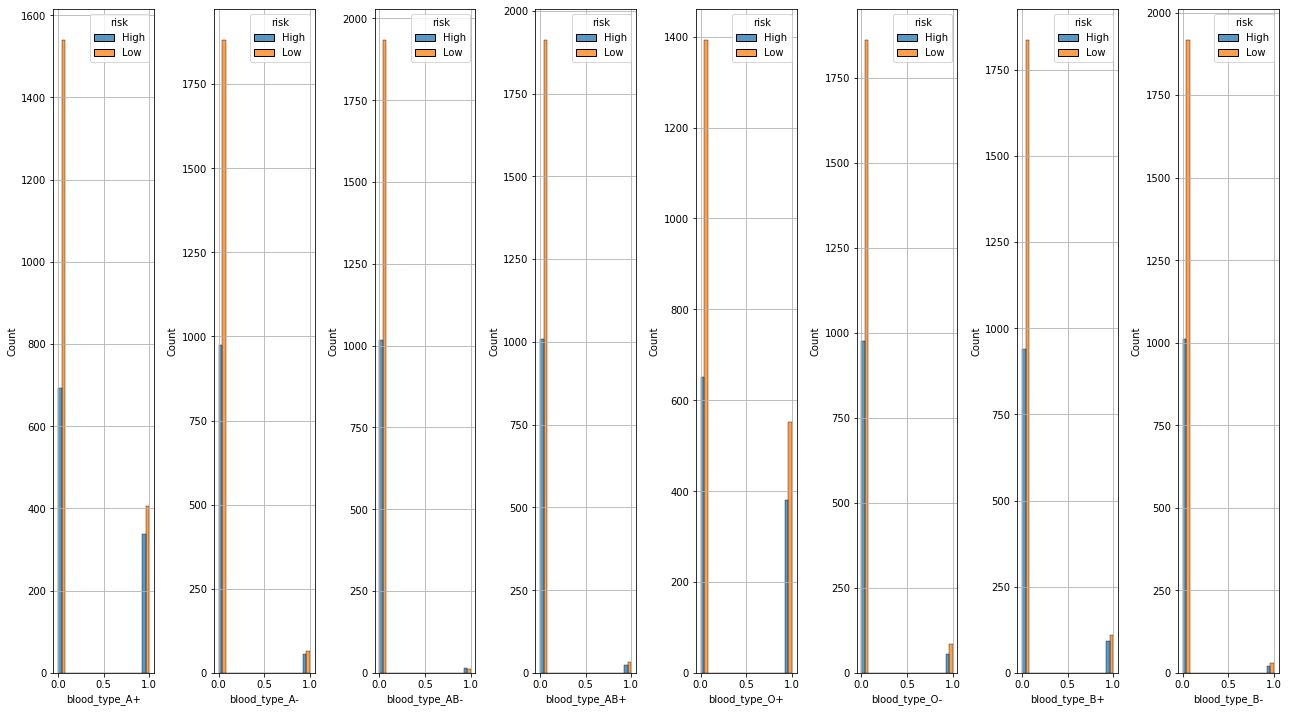

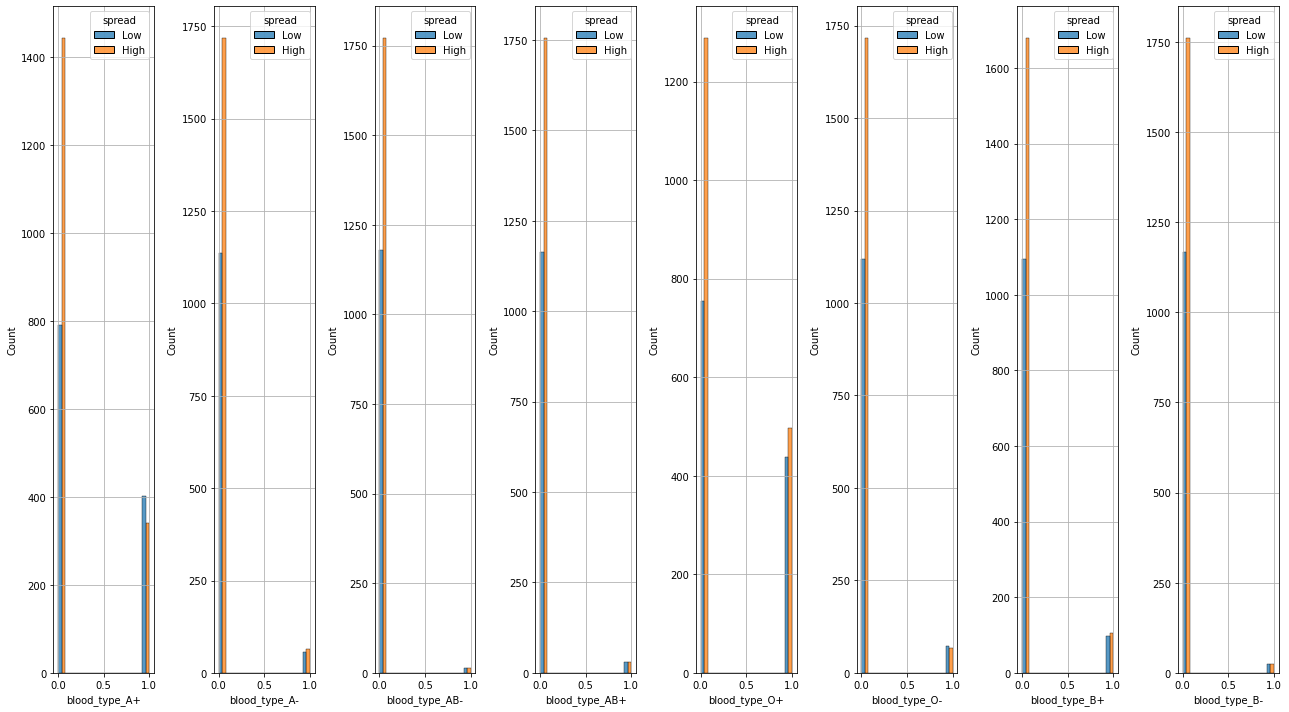

In [ ]:
fig, axes = plt.subplots(1, 8, figsize=(18, 10))
sym =["blood_type_A+","blood_type_A-","blood_type_AB-","blood_type_AB+","blood_type_O+","blood_type_O-","blood_type_B+","blood_type_B-"]
for i,column in enumerate(sym):
     sns.histplot(ax=axes[i], data=data, x=column, hue=data['covid'], multiple="dodge")
     axes[i].grid()
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 8, figsize=(18, 10))
for i,column in enumerate(sym):
     sns.histplot(ax=axes[i], data=data, x=column, hue=data['risk'], multiple="dodge")
     axes[i].grid()
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 8, figsize=(18, 10))
for i,column in enumerate(sym):
     sns.histplot(ax=axes[i], data=data, x=column, hue=data['spread'], multiple="dodge")
     axes[i].grid()
plt.tight_layout()
plt.show()

Lets take a look at the states one hot vector against the target feature, and try to find whom is significant

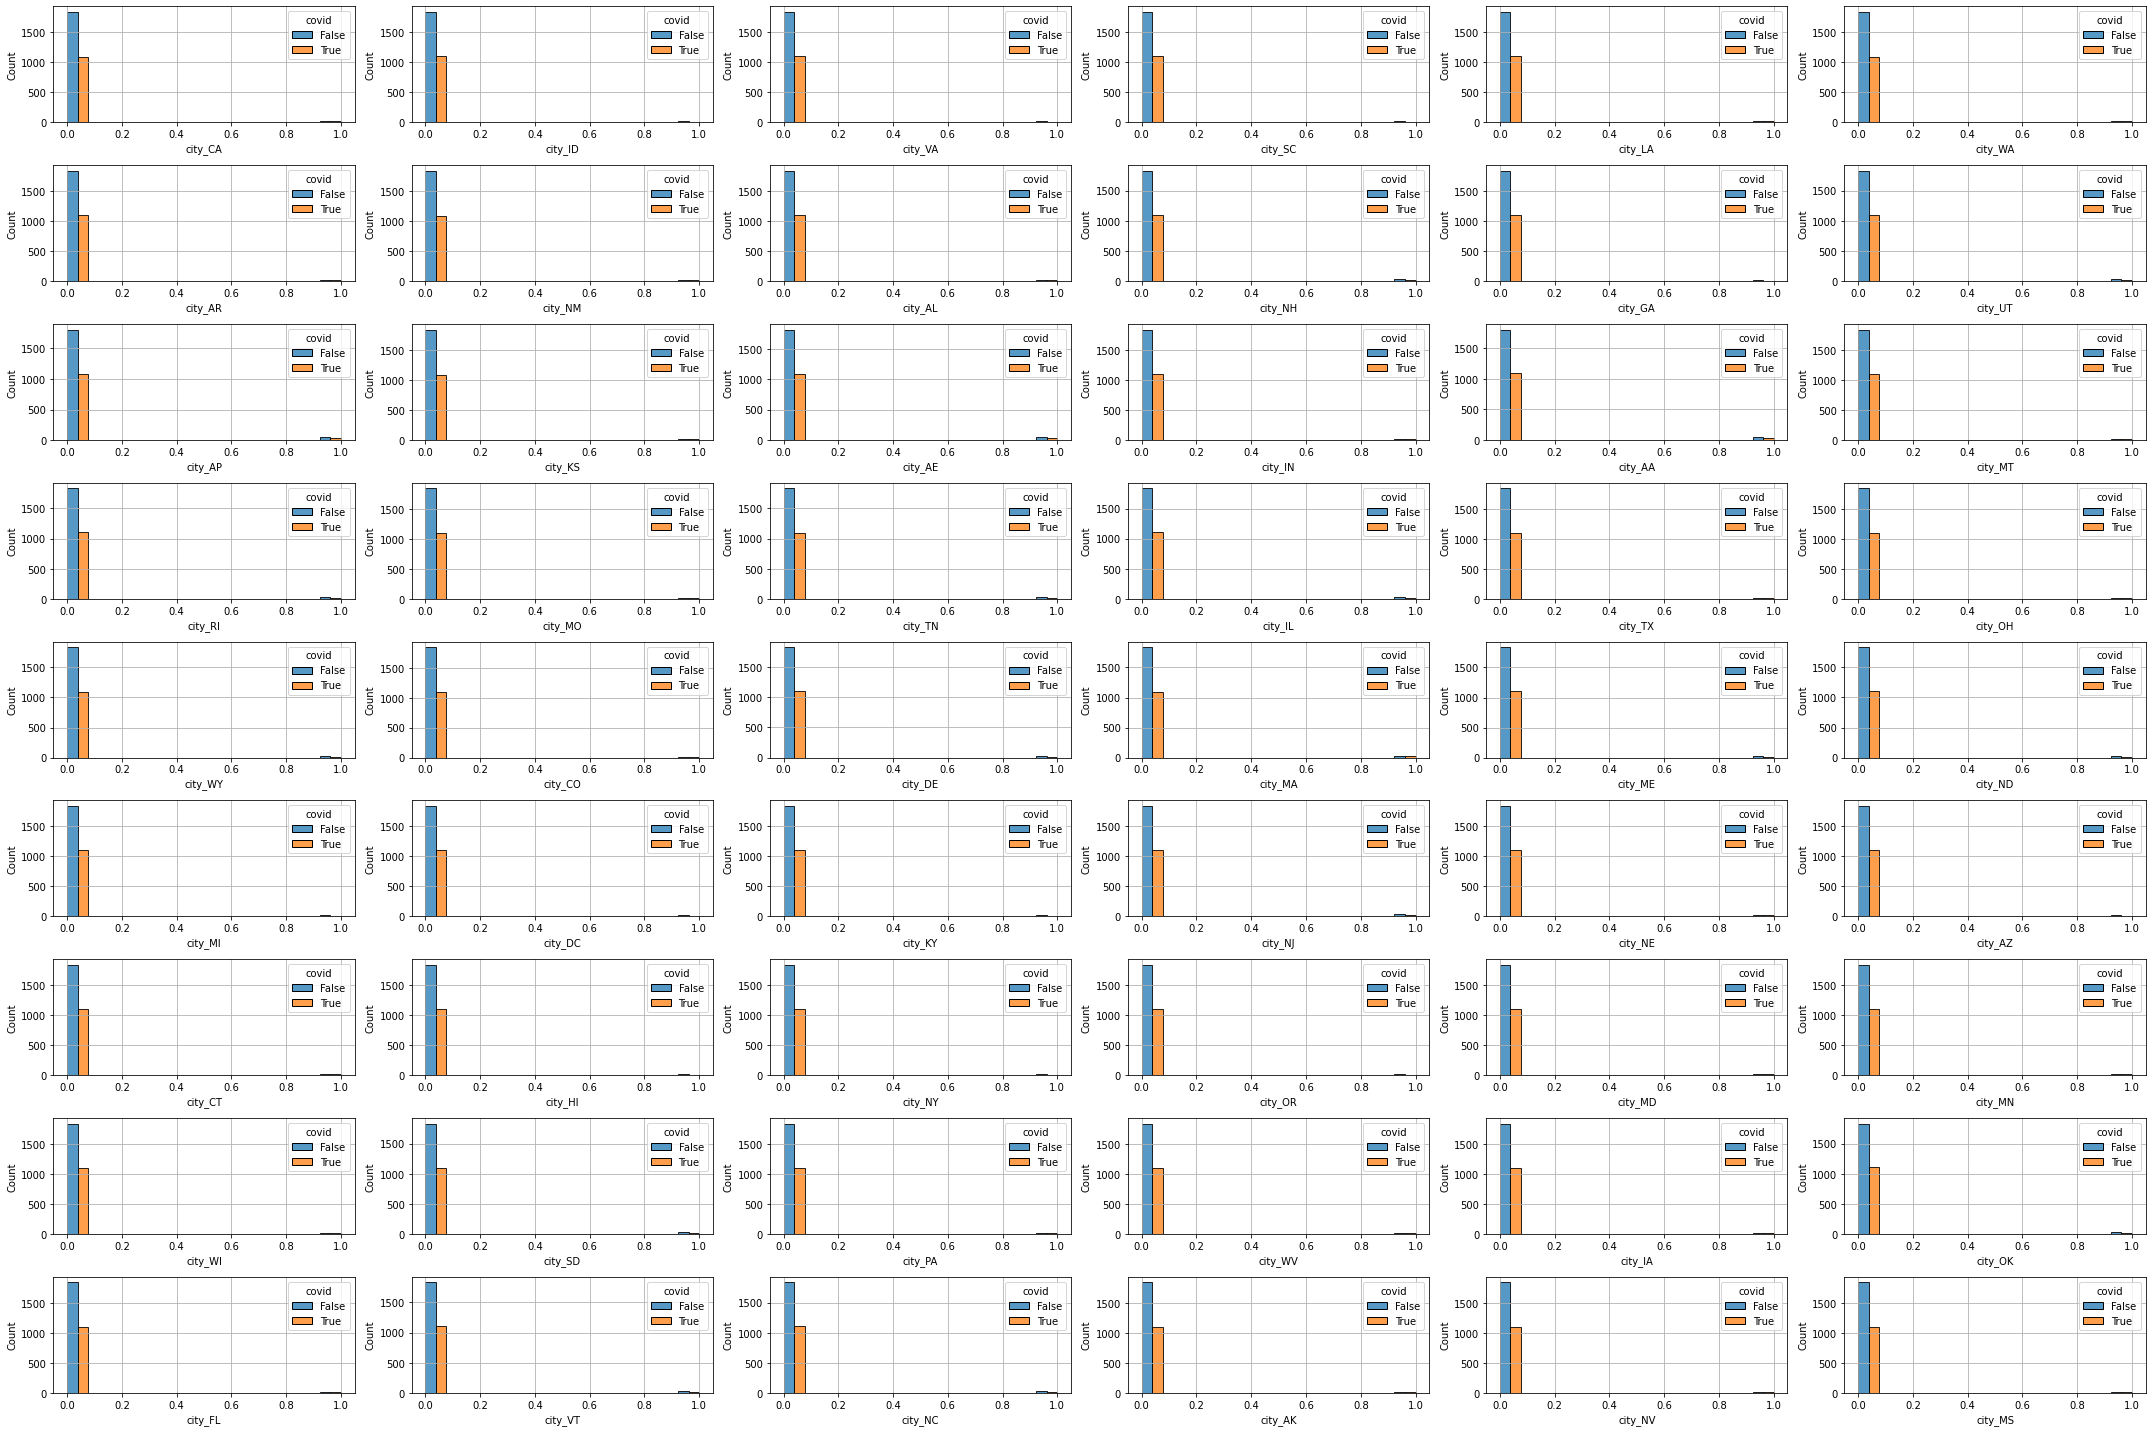

In [ ]:

df2 = data[['city_CA', 'city_VA', 'city_SC','city_ID', 'city_LA', 'city_WA', 
                       'city_AR', 'city_NM', 'city_AL','city_NH', 'city_GA', 'city_UT', 
                       'city_AP', 'city_KS', 'city_AE', 'city_IN', 'city_AA', 'city_MT', 
                       'city_RI', 'city_MO', 'city_TN', 'city_IL', 'city_TX', 'city_OH', 
                       'city_WY', 'city_CO', 'city_DE', 'city_MA', 'city_ME', 'city_ND', 
                       'city_MI', 'city_DC', 'city_KY', 'city_NJ', 'city_NE', 'city_AZ', 
                      'city_CT', 'city_HI', 'city_NY', 'city_OR', 'city_MD', 'city_MN',
                      'city_WI', 'city_SD', 'city_PA', 'city_WV', 'city_IA', 'city_OK',
                       'city_FL', 'city_VT', 'city_NC', 'city_AK', 'city_NV', 'city_MS']]
fig, axes = plt.subplots(9, 6, figsize=(30, 20))
j=0
i=0
for i,column in enumerate(states_list_with_prefix):
    if(i!= 0 and i%6 == 0):
      j+=1
    i = i % 6
    sns.histplot(ax=axes[j][i], data=data, x=column, hue=data['covid'], multiple="dodge")
    axes[j][i].grid()
     
plt.tight_layout()
plt.show()